# EXPLORED EDA

## IMPORTS

In [1]:
# ---------------------------------------------------------
# GENERAL IMPORTS
# ---------------------------------------------------------
# CORE PYTHON & DATA MANIPULATION LIBRARIES
import numpy as np                # Numerical computations, arrays, math operations
import pandas as pd               # Data handling, DataFrames, time-series structures
import warnings                   # Warning control and suppression
import math                       # Math utilities (sqrt, log, floor, ceil, etc.)
import random                     # Generate random values
import os                         # OS-level utilities (path handling, directory checks, file management)
# VISUALIZATION LIBRARIES
import matplotlib.pyplot as plt   # Main plotting library
import seaborn as sns             # Statistical and enhanced visualization tools

from wordcloud import WordCloud   # Wordcloud plotting
# STEP 10) SPLIT
from sklearn.model_selection import train_test_split   # Split dataset into train / test subsets
# STEP 14) FEATURE SELECTION
from sklearn.feature_selection import VarianceThreshold        # Variance feature selection for NLP or TABULAR UNSUPERVISED learnings
from sklearn.feature_selection import f_regression, chi2        # f_regression → F-test for numerical target, chi2 → Chi-square test for categorical targets for NLP - SUPERVISED learnings
from sklearn.feature_selection import SelectKBest, f_classif   # Univariate feature selection for classification for TABULAR - SUPERVISED learnings
# MODEL SELECTION
from sklearn.model_selection import GridSearchCV       # Hyperparameter optimization via grid search
from sklearn.tree import plot_tree                     # Visualization of decision tree structures
from pickle import dump                                # Save trained models to disk (serialization)

# ---------------------------------------------------------
# UNSUPERVISED ALGORITHMS
# ---------------------------------------------------------
# Clustering models
from sklearn.cluster import KMeans # Centroid-based clustering algorithm that partitions data into K clusters by minimizing within-cluster sum of squared distances (WCSS)
from sklearn.cluster import DBSCAN # Density-based clustering algorithm that groups samples based on local density and identifies noise points that do not belong to any cluster
from sklearn.cluster import AgglomerativeClustering # Hierarchical clustering algorithm that builds clusters bottom-up by iteratively merging the closest clusters according to a linkage criterion
# Dimensionality reduction
from sklearn.decomposition import TruncatedSVD # Method similar to PCA but suitable for sparse / high-dimensional data (common for NLP vectors like TF-IDF), computes a low-rank approximation via SVD without centering the data

# ---------------------------------------------------------
# CLASSIFICATION ALGORITHMS
# ---------------------------------------------------------
# METRICS
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score   # Core classification metrics
# PREDICTION MODELS
from sklearn.linear_model import LogisticRegression     # Logistic regression classifier
from sklearn.tree import DecisionTreeClassifier         # Decision tree classifier
from sklearn.naive_bayes import GaussianNB              # Gaussian Naive Bayes for continuous inputs
from sklearn.naive_bayes import MultinomialNB           # Multinomial Naive Bayes (common for NLP)
from sklearn.naive_bayes import BernoulliNB             # Bernoulli Naive Bayes (binary features)
from sklearn.neighbors import KNeighborsClassifier      # K-Nearest Neighbors model (classification)
# BAGGING ENSEMBLE
from sklearn.ensemble import RandomForestClassifier     # Ensemble of decision trees (bagging)
# BOOSTING ENSEMBLE
from sklearn.ensemble import AdaBoostClassifier         # AdaBoost boosting algorithm
from sklearn.ensemble import GradientBoostingClassifier # Gradient boosting classifier
from xgboost import XGBClassifier                       # Extreme Gradient Boosting (high-performance)
from lightgbm import LGBMClassifier                     # LightGBM (optimized gradient boosting)

# ---------------------------------------------------------
# REGRESSION ALGORITHMS
# ---------------------------------------------------------
# METRICS
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score   # Regression performance metrics
# PREDICTION MODELS
from sklearn.linear_model import LinearRegression       # Linear regression model
from sklearn.linear_model import Lasso                  # L1 regularized regression
from sklearn.linear_model import Ridge                  # L2 regularized regression
from sklearn.tree import DecisionTreeRegressor          # Regression decision tree
from sklearn.neighbors import KNeighborsRegressor       # K-Nearest Neighbors model (regression)
# BAGGING ENSEMBLE
from sklearn.ensemble import RandomForestRegressor      # Ensemble of regression trees (bagging)
# BOOSTING ENSEMBLE
from sklearn.ensemble import AdaBoostRegressor          # Boosting algorithm for regression
from sklearn.ensemble import GradientBoostingRegressor  # Gradient boosting regressor
from xgboost import XGBRegressor                        # XGBoost regressor
from lightgbm import LGBMRegressor                      # LightGBM regressor

# ---------------------------------------------------------
# NLP DATASETS - EDA
# ---------------------------------------------------------
# STEP 6) TEXT PROCESSING
import regex as re                          # Advanced regular expressions for robust text cleaning
# STEP 7) TEXT LEMMATIZATION
import nltk                                 # NLP toolkit required for lemmatization and POS tagging
from nltk.stem import WordNetLemmatizer     # Lemmatizer based on WordNet lexical database
from nltk.corpus import stopwords           # Stopword lists for multiple languages
from nltk.corpus import wordnet             # WordNet POS tags for accurate lemmatization
from PIL import Image                       # Load and manipulate image files (used for mask shapes in WordCloud)
try:
    nltk.data.find("corpora/wordnet")
except LookupError:
    nltk.download("wordnet", quiet=True)
try:
    nltk.data.find("corpora/stopwords")
except LookupError:
    nltk.download("stopwords", quiet=True)
try:
    nltk.data.find("taggers/averaged_perceptron_tagger")
except LookupError:
    nltk.download("averaged_perceptron_tagger", quiet=True)
try:
    nltk.data.find("taggers/averaged_perceptron_tagger_eng")
except LookupError:
    nltk.download("averaged_perceptron_tagger_eng", quiet=True)
# STEP 13) VECTORIZATION
from sklearn.feature_extraction.text import CountVectorizer     # Convert text into token frequency counts
from sklearn.feature_extraction.text import TfidfVectorizer     # Convert text into TF-IDF weighted features
from sklearn.decomposition import PCA                           # Dimensionality reduction (e.g., for visualization)
from sklearn.metrics import silhouette_score                    # Clustering quality metric (optional for NLP clustering)
# STEP 16) PREDICTION MODELS
from sklearn.svm import SVC                                     # Support Vector Machine classifier (kernel-based classification)

# ---------------------------------------------------------
# TIME-SERIES DATASETS - EDA
# ---------------------------------------------------------
# STEP 3) DECOMPOSING
from statsmodels.tsa.seasonal import seasonal_decompose         # Decompose time-series into trend, seasonal, and residual components
# STEP 4) STATIONARITY ANALYSIS
from statsmodels.tsa.stattools import adfuller                  # Dickey-Fuller test for stationarity evaluation
# STEP 5) VARIABILITY ANALYSIS
from statsmodels.stats.diagnostic import acorr_ljungbox         # Ljung-Box test for checking autocorrelation in residuals
# STEP 6) AUTOCORRELATION ANALYSIS
from statsmodels.tsa.stattools import acf                       # Compute autocorrelation values  
from statsmodels.tsa.stattools import pacf                      # Compute partial autocorrelation values
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf   # Plot ACF & PACF with confidence bands
# STEP 16) PREDICTION MODELS
from statsmodels.tsa.arima.model import ARIMA                   # ARIMA(p,d,q) model for forecasting
from pmdarima import auto_arima                                 # Automatic ARIMA/SARIMA parameter selection
from statsmodels.tools.sm_exceptions import ConvergenceWarning  # Warning raised when ARIMA optimizer fails
warnings.filterwarnings("ignore", category=ConvergenceWarning)  # Suppress convergence warnings globally (keeps logs clean)

# ---------------------------------------------------------
# TABULAR DATASETS - EDA
# ---------------------------------------------------------
# STEP 10) REMOVE NOISY ATTRIBUTES
from scipy.stats import chi2_contingency                # Chi-square test for categorical dependencies
# STEP 12) SCALLING
from sklearn.preprocessing import StandardScaler        # Standardization (mean=0, std=1)
from sklearn.preprocessing import MinMaxScaler          # Min-max scaling to [0,1]
# STEP 13) ENCODING
from sklearn.preprocessing import LabelEncoder          # Encode categories into integer labels
from sklearn.preprocessing import OneHotEncoder         # Encode categories into binary vectors

## COMMON FUNCTIONS

In [2]:
# ===============================
# Log printer
# ===============================
def log(message: str, level: int = 1, type: str = "INFO", custom_icon: str = None, bold: bool = False):
    # Default icons according to message type
    icons = {
        "INFO": "ℹ️",
        "FOUND": "🔍",
        "SUCCESS": "✅",
        "ERROR": "❌",
        "WARNING": "⚠️",
    }
    # Use custom icon if provided
    if custom_icon:
        icon = custom_icon
    else:
        icon = icons.get(type.upper(), "ℹ️")
    # Bold wrapper (ANSI)
    if bold:
        message = f"\033[1m{message}\033[0m"
    # First level → bullet
    if level == 1:
        prefix = "•"
    # Second level → indent + hyphen
    elif level == 2:
        prefix = "   -"
    # Level 3 → deeper indent + middle dot
    elif level == 3:
        prefix = "      ·"
    # Fallback
    else:
        prefix = "-"
    # Final print
    print(f"{prefix} {icon} {message}")

# ===============================
# Get revision number - Returns the next free integer revision based on existing files
# ===============================
def get_revision_number(base_path, base_name):
    rev = 0
    while True:
        full_path = os.path.join(base_path, base_name + "_" + str(rev) + ".csv")
        if not os.path.exists(full_path):
            return rev
        rev += 1

In [4]:
# ===============================
#  Computes correlation between CATEGORIC attributes by using Cramér's V
# ===============================
def cramers_v(x, y): 
    # Step 1: confusion matrix
    confusion_matrix = pd.crosstab(x, y)
    # Step 2: chi-square statistic
    chi2 = chi2_contingency(confusion_matrix)[0]
    # Step 3: phi-squared
    total_samples = confusion_matrix.sum().sum()
    phi2 = chi2 / total_samples
    # Shape of confusion matrix
    r, k = confusion_matrix.shape
    num_rows = confusion_matrix.shape[0]
    num_cols = confusion_matrix.shape[1]
    # Step 4: bias correction (recommended formula)
    correction = ((num_cols - 1) * (num_rows - 1)) / (total_samples - 1)
    phi2_corrected = max(0, phi2 - correction)
    # Corrected dimensions
    rows_corrected = num_rows - ((num_rows - 1) ** 2) / (total_samples - 1)
    cols_corrected = num_cols - ((num_cols - 1) ** 2) / (total_samples - 1)
    # Step 5: compute Cramér's V
    denominator = min(rows_corrected - 1, cols_corrected - 1)
    if denominator <= 0:
        return 0  # avoid division by zero for degenerate tables
    cramers_v_value = np.sqrt(phi2_corrected / denominator)
    return cramers_v_value

## SUPERVISED MODELS FUNCTIONS

In [5]:
# ===============================
# Determines de number of different parameters to include in the grid
# ===============================
def n_grid_param(n_samples, n_features,
                 n_features_BIG_dataset ,n_features_MEDIUM_dataset, n_features_SMALL_dataset,
                 n_samples_BIG_dataset, n_samples_MEDIUM_dataset, n_samples_SMALL_dataset, n_samples_MICRO_dataset):
    # 1) ULTRA FAST → Big datasets (2 values per parameters)
    if (n_samples >= n_samples_MEDIUM_dataset and n_features >= n_features_SMALL_dataset) or \
       (n_samples >= n_samples_BIG_dataset) or \
       (n_features >= n_features_BIG_dataset):
        log("Dataset size: BIG -> Grid's parameters will be filled with 2 values", type="WARNING")
        return 2
    # 2) FAST → Medium datasets (3 values per parameters)
    if (n_samples_SMALL_dataset <= n_samples < n_samples_MEDIUM_dataset) or \
       (n_features_MEDIUM_dataset <= n_features < n_features_BIG_dataset):
        log("Dataset size: MEDIUM -> Grid's parameters will be filled with 3 values", type="WARNING")
        return 3
    # 3) NORMAL → Small datasets (4 values per parameters)
    if (n_samples_MICRO_dataset <= n_samples < n_samples_SMALL_dataset) or \
       (n_features_SMALL_dataset <= n_features < n_features_MEDIUM_dataset):
        log("Dataset size: SMALL -> Grid's parameters will be filled with 4 values", type="WARNING")
        return 4
    # 4) SLOW → Micro datasets (5 values per parameters)
    log("Dataset size: MICRO -> Grid's parameters will be filled with 5 values", type="WARNING")
    return 5

# Generates k exponentially (log-spaced) values between min_val and max_val.
def smart_logspace_choose(min_val, max_val, datatype, num_grid_param):
    # Convert to log10 space
    log_min = np.log10(min_val)
    log_max = np.log10(max_val)
    # Generate k values evenly spaced in LOG space (exponential sequence)
    raw_values  = np.logspace(log_min, log_max, num_grid_param)
    # Round them for readability and return
    rounded_values = []
    for v in raw_values:
        if datatype == "integer":
            rounded_values.append(round(v))
        elif datatype == "float":
            rounded_values.append(round(v, 6))
    return rounded_values

# ===============================
# Maps the external GridSearchCV scoring name to a coherent XGBoost eval_metric
# ===============================
def map_eval_metric(scoring):
    mapping = {
        # Classification
        "accuracy": "merror",
        "precision": "logloss",
        "recall": "logloss",
        "f1": "logloss",
        # Regression
        "r2": "rmse",
        "neg_root_mean_squared_error": "rmse"
    }
    return mapping.get(scoring, "logloss")

# ===============================
def map_xgb_eval_metric(model_name, scoring):
    # Classification model
    if model_name == "XGBClassifier":
        return {
            "accuracy": "merror",
            "precision": "logloss",
            "recall": "logloss",
            "f1": "logloss"
        }.get(scoring, "logloss")
    # Regression model
    if model_name == "XGBRegressor":
        return {
            "r2": "rmse",
            "neg_root_mean_squared_error": "rmse",
            "neg_mean_squared_error": "rmse",
            "neg_mean_absolute_error": "mae"
        }.get(scoring, "rmse")

# ===============================
def compute_classification_metrics(y_true, y_pred, avg, pos_label):
    metrics = {}
    metrics["Accuracy"]  = accuracy_score(y_true, y_pred)
    metrics["Precision"] = precision_score(y_true, y_pred, average=avg, pos_label=pos_label)
    metrics["Recall"]    = recall_score(y_true, y_pred, average=avg, pos_label=pos_label)
    metrics["F1_score"]  = f1_score(y_true, y_pred, average=avg, pos_label=pos_label)
    return metrics

# ===============================
def compute_regression_metrics(y_true, y_pred):
    metrics = {}
    metrics["MAE"]  = mean_absolute_error(y_true, y_pred)
    metrics["MSE"]  = mean_squared_error(y_true, y_pred)
    metrics["RMSE"] = np.sqrt(metrics["MSE"])
    metrics["R2"]   = r2_score(y_true, y_pred)
    return metrics

# ===============================
def set_average_proposal(y, scoring_target):
    unique_count = y.nunique()
    if unique_count == 2:
        freq = y.value_counts()
        pos_label = freq.index[-1]
        return "binary", pos_label, scoring_target
    freq_norm = y.value_counts(normalize=True)
    imbalance_ratio = freq_norm.max() / freq_norm.min()
    if imbalance_ratio <= 1.2:
        return "micro", None, scoring_target + "_micro" if scoring_target != "accuracy" else scoring_target
    if imbalance_ratio <= 1.5:
        return "macro", None, scoring_target + "_macro" if scoring_target != "accuracy" else scoring_target
    return "weighted", None, scoring_target + "_weighted" if scoring_target != "accuracy" else scoring_target

# ===============================
def set_time_per_fit_factor(n_samples, n_features, n_features_BIG_dataset, n_features_MEDIUM_dataset, n_features_SMALL_dataset, n_samples_BIG_dataset, n_samples_MEDIUM_dataset, n_samples_SMALL_dataset):
    # BIG dataset
    if (n_samples >= n_samples_BIG_dataset) or (n_features >= n_features_BIG_dataset):
        return 2.5
    # MEDIUM dataset
    elif (n_samples_MEDIUM_dataset <= n_samples < n_samples_BIG_dataset) or (n_features_MEDIUM_dataset <= n_features < n_features_BIG_dataset):
        return 1.5
    # SMALL dataset
    elif (n_samples_SMALL_dataset <= n_samples < n_samples_MEDIUM_dataset) or (n_features_SMALL_dataset <= n_features < n_features_MEDIUM_dataset):
        return 1.0
    # MICRO dataset
    elif n_samples < n_samples_SMALL_dataset:
        return 0.8
    else:
        return 1.0
    
# ===============================
# Computes the total number of model trainings required by GridSearchCV
# ===============================
def count_grid_combinations(grid_params, cv):
    total = 1
    for key, values in grid_params.items():
        total *= len(values)
    return total * cv

# ===============================
# Lasso / Ridge hyperparameter plotter
# ===============================
def plotter_Lasso_Ridge_hparame(model_name, grid_params, grid_scores, ax, label_fontsize, title_fontsize, reg_scoring_target):
    ax.plot(grid_params, grid_scores, marker="o")
    ax.set_xlabel("Alpha", fontsize=label_fontsize)
    ax.set_ylabel(reg_scoring_target, fontsize=label_fontsize)
    ax.set_title(f"{model_name} - Alpha vs Scoring ({reg_scoring_target})", fontsize=title_fontsize)
    ax.grid(True, linestyle="--", alpha=0.4)

# ===============================
# Decision Tree plotter
# ===============================
def plotter_DecisionTree_model(model, X, ax):
    plot_tree(model, feature_names=X.columns, filled=True, ax=ax)

# ===============================
# Generic RandomForest hyperparameter plotter (Classifier + Regressor)
# ===============================
def plotter_RandomForest_hparam(model_name, est_list, depth_list, depth_score_dict, ax, label_fontsize, title_fontsize, reg_scoring_target, cla_scoring_target):
    # Choose scoring label depending on model type
    if model_name == "RandomForestClassifier":
        scoring_label = cla_scoring_target
    else:
        scoring_label = reg_scoring_target
    # Create a color palette (one color per n_estimators)
    palette_colors = sns.color_palette("bright", len(est_list))
    # One curve per n_estimators
    for i, est in enumerate(est_list):
        # Retrieve scores for this n_estimators across all depths
        est_scores = []
        for d in depth_list:
            est_scores.append(depth_score_dict[d][i])
        # Plot curve: X = depth_list, Y = scores
        ax.plot(depth_list, est_scores, marker="o", color=palette_colors[i], label=f"No. estimators = {int(est)}")
    # Labels and formatting
    ax.set_xlabel("Max depth", fontsize=label_fontsize)
    ax.set_ylabel(scoring_label, fontsize=label_fontsize)
    ax.set_title(f"{model_name} - Hyperparameter Analysis", fontsize=title_fontsize)
    ax.grid(True, linestyle="--", alpha=0.4)
    ax.legend()

# ===============================
# KNN hyperparameter plotter: k (n_neighbors) vs score
# ===============================
def plotter_KNN_hparam_k(model_name, k_list, train_scores,test_scores, ax, label_fontsize, title_fontsize, reg_scoring_target, cla_scoring_target):
    # Choose scoring label depending on model type
    if "Classifier" in model_name:
        scoring_label = cla_scoring_target
    else:
        scoring_label = reg_scoring_target
    # Defensive checks
    if k_list is None or len(k_list) == 0:
        return
    if train_scores is None or test_scores is None:
        return
    # Plot
    ax.plot(k_list, train_scores, marker="o", label="Train score")
    ax.plot(k_list, test_scores, marker="o", label="Test score")

    ax.set_xlabel("Number of neighbors (k)", fontsize=label_fontsize)
    ax.set_ylabel(scoring_label, fontsize=label_fontsize)
    ax.set_title(f"{model_name} — Train vs Test scores", fontsize=title_fontsize)
    ax.grid(True, linestyle="--", alpha=0.4)
    ax.legend()

# ===============================
# Generic Boosting hyperparameter plotter
# ===============================
def plotter_Boosting_hparam(model_name, est_list, depth_list, depth_score_dict, ax, label_fontsize, title_fontsize, reg_scoring_target, cla_scoring_target):
    # Choose scoring label depending on model type
    if "Classifier" in model_name:
        scoring_label = cla_scoring_target
    else:
        scoring_label = reg_scoring_target
    # Create a color palette (one color per n_estimators)
    palette_colors = sns.color_palette("bright", len(est_list))
    # One curve per n_estimators
    for i, est in enumerate(est_list):
        # Retrieve scores for this n_estimators across all depths
        est_scores = []
        for d in depth_list:
            est_scores.append(depth_score_dict[d][i])
        ax.plot(depth_list, est_scores, marker="o", color=palette_colors[i], label=f"No. estimators = {int(est)}")
    # Labels and formatting
    ax.set_xlabel("Max depth", fontsize=label_fontsize)
    ax.set_ylabel(scoring_label, fontsize=label_fontsize)
    ax.set_title(f"{model_name} - Hyperparameter Analysis", fontsize=title_fontsize)
    ax.grid(True, linestyle="--", alpha=0.4)
    ax.legend()

# ===============================
# Linear Model Coefficient Plotter (LogReg, LinReg, LinearSVC)
# ===============================
def plotter_linear_coefficients(model, X, ax, model_name, label_fontsize, title_fontsize, top_n=20):
    # Extract coefficients
    try:
        coef = model.coef_.flatten()
    except:
        coef = model.coef_
    # Defensive check: mismatch between model and dataset
    if len(coef) != X.shape[1]:
        ax.text(
            0.5, 0.5,
            "⚠️ Cannot plot coefficients:\nModel coef_ size does NOT match X columns",
            ha="center", va="center",
            fontsize=label_fontsize,
            bbox=dict(boxstyle="round", fc="lightcoral", alpha=0.4)
        )
        ax.set_title(f"{model_name} — Coefficients NOT plottable", fontsize=title_fontsize)
        ax.axis("off")
        return
    # Defensive cap
    n_features = len(coef)
    top_n_safe = min(top_n, n_features)
    # Compute ranking
    abs_coef = np.abs(coef)
    top_indices = np.argsort(abs_coef)[-top_n_safe:]
    # Selected coefficients
    top_features = X.columns[top_indices]
    top_values   = coef[top_indices]
    # Sort for plotting clarity
    sort_idx     = np.argsort(top_values)
    top_features = top_features[sort_idx]
    top_values   = top_values[sort_idx]
    # Plot
    ax.barh(top_features, top_values)
    ax.set_xlabel("Coefficient value", fontsize=label_fontsize)
    ax.set_title(f"{model_name} — Top {top_n_safe} coefficients", fontsize=title_fontsize)
    ax.grid(True, linestyle="--", alpha=0.4)

## UNSUPERVISED MODELS FUNCTIONS

In [6]:
# -------------------------------
# Resolve metric for model
# -------------------------------
def resolve_distance_metric(dataset_type, model_name=None, linkage=None):
    if dataset_type == "NLP":
        base_metric = "cosine"
    else:
        base_metric = "euclidean"
    if model_name == "AgglomerativeClustering":
        if linkage == "ward":
            return "euclidean"
        return base_metric
    return base_metric

# ===============================
# Builds an elbow-friendly x_list (~n_points) based on grid values,
# reusing smart_logspace_choose for consistency with optimization grids
# ===============================
def build_elbow_x_list(grid_values, datatype, n_points=10):
    # Clean grid values (remove None, duplicates, sort)
    clean_values = []
    for v in grid_values:
        if v is not None:
            clean_values.append(v)
    clean_values = sorted(list(dict.fromkeys(clean_values)))
    # If grid already dense enough, reuse it
    if len(clean_values) >= n_points:
        return clean_values
    # If grid too small, densify within its bounds
    min_val = float(clean_values[0])
    max_val = float(clean_values[-1])
    # Guard against degenerate ranges
    if min_val == max_val:
        if datatype == "integer":
            min_val = max(2, int(min_val) - 2)
            max_val = int(max_val) + 2
        else:
            min_val = max(1e-6, min_val * 0.5)
            max_val = max_val * 1.5
    # Generate elbow points using same philosophy as grids
    x_list = smart_logspace_choose(min_val=min_val, max_val=max_val, datatype=datatype, num_grid_param=n_points)
    # Final clean (remove duplicates, sort)
    x_list = sorted(list(dict.fromkeys(x_list)))
    return x_list

# ===============================
# Inertia-like metric (WCSS): sum of squared distances to cluster centroids
# Noise points (label = -1) are ignored
# ===============================
def compute_inertia_from_labels(X, labels):
    unique_labels = []
    for lab in np.unique(labels):
        if lab != -1:
            unique_labels.append(lab)
    if len(unique_labels) == 0:
        return np.nan
    inertia_value = 0.0
    for lab in unique_labels:
        mask = (labels == lab)
        X_cluster = X[mask]
        if X_cluster.shape[0] == 0:
            continue
        centroid = np.mean(X_cluster, axis=0)
        diffs = X_cluster - centroid
        # Ensure scalar inertia (handles DataFrame / ndarray)
        sq_dist = np.sum(diffs.values ** 2) if hasattr(diffs, "values") else np.sum(diffs ** 2)
        inertia_value = inertia_value + float(sq_dist)
    return inertia_value

# ===============================
# Computes clustering diagnostics from labels (model-agnostic).
# ===============================
def compute_clustering_diagnostics(X, labels):
    # Inertia-like (WCSS proxy) computed from labels
    inertia_like = compute_inertia_from_labels(X, labels)
    # Number of clusters found (exclude noise = -1)
    unique_clusters = []
    for c in np.unique(labels):
        if c != -1:
            unique_clusters.append(c)
    n_clusters_found = len(unique_clusters)
    noise_ratio = 0.0
    # Noise ratio (only meaningful if model can output -1)
    if (-1 in np.unique(labels)):
        noise_ratio = float(np.sum(labels == -1) / len(labels))
    # Silhouette (valid only if >= 2 clusters excluding noise)
    sil = None
    try:
        if n_clusters_found >= 2:
            sil = float(silhouette_score(X, labels))
    except Exception:
        sil = None
    return {
        "inertia_like": inertia_like,
        "silhouette": sil,
        "n_clusters_found": n_clusters_found,
        "noise_ratio": noise_ratio
    }

# ===============================
# Returns index of elbow (max distance to line) (0-based), and elbow x value
# ===============================
def find_elbow_point(x_list, y_list):
    x = np.array(x_list, dtype=float)
    y = np.array(y_list, dtype=float)
    valid_mask = ~np.isnan(y)
    x = x[valid_mask]
    y = y[valid_mask]
    if len(x) < 3:
        return None, None
    x1, y1 = x[0], y[0]
    x2, y2 = x[-1], y[-1]
    # Line vector
    line_vec = np.array([x2 - x1, y2 - y1], dtype=float)
    line_len = np.sqrt(line_vec[0]**2 + line_vec[1]**2)
    if line_len == 0:
        return None, None
    # Compute distance from each point to the line
    distances = []
    for i in range(len(x)):
        px, py = x[i], y[i]
        point_vec = np.array([px - x1, py - y1], dtype=float)
        # Area of parallelogram / base = distance
        cross = abs(line_vec[0]*point_vec[1] - line_vec[1]*point_vec[0])
        dist = cross / line_len
        distances.append(dist)
    elbow_idx = int(np.argmax(distances))
    return elbow_idx, float(x[elbow_idx])

# ===============================
# Computes elbow diagnostic curves for KMeans, DBSCAN and AgglomerativeClustering.
# - KMeans: one curve per n_init
# - DBSCAN: one curve per min_samples
# - Agglomerative: one curve per linkage
# ===============================
def compute_elbow_diagnostics_curves(model_name, X_train_unsup, clustering_grids, dataset_type, random_seed, n_points_elbow=10):
    results = {
        "model_name": model_name,
        "x_label": None,
        "x_list": None,
        "curves": {}
    }
    # KMEANS → x = n_clusters, curve = n_init
    if model_name == "KMeans":
        results["x_label"] = "n_clusters"
        x_grid = clustering_grids[model_name]["n_clusters"]
        x_list = build_elbow_x_list(grid_values=x_grid, datatype="integer", n_points=n_points_elbow)
        results["x_list"] = x_list
        n_init_list = clustering_grids[model_name]["n_init"]
        for n_init in n_init_list:
            inertia_list = []
            sil_list = []
            ncl_list = []
            noise_list = []
            for k in x_list:
                tmp_model = KMeans(n_clusters=int(k), n_init=int(n_init), random_state=random_seed)
                tmp_model.fit(X_train_unsup)
                labels = tmp_model.labels_
                diag = compute_clustering_diagnostics(X_train_unsup, labels)
                inertia_list.append(diag["inertia_like"])
                sil_list.append(diag["silhouette"])
                ncl_list.append(diag["n_clusters_found"])
                noise_list.append(diag["noise_ratio"])
            elbow_idx, elbow_x = find_elbow_point(x_list, inertia_list)
            results["curves"][int(n_init)] = {
                "label": f"n_init={int(n_init)}",
                "inertia_like": inertia_list,
                "silhouette": sil_list,
                "n_clusters_found": ncl_list,
                "noise_ratio": noise_list,
                "elbow_x": elbow_x
            }
        return results
    # DBSCAN → x = eps, curve = min_samples
    if model_name == "DBSCAN":
        results["x_label"] = "eps"
        x_grid = clustering_grids[model_name]["eps"]
        x_list = build_elbow_x_list(grid_values=x_grid, datatype="float", n_points=n_points_elbow)
        results["x_list"] = x_list
        min_samples_list = clustering_grids[model_name]["min_samples"]
        for ms in min_samples_list:
            inertia_list = []
            sil_list = []
            ncl_list = []
            noise_list = []
            for eps in x_list:
                tmp_model = DBSCAN(eps=float(eps), min_samples=int(ms))
                labels = tmp_model.fit_predict(X_train_unsup)
                diag = compute_clustering_diagnostics(X_train_unsup, labels)
                inertia_list.append(diag["inertia_like"])
                sil_list.append(diag["silhouette"])
                ncl_list.append(diag["n_clusters_found"])
                noise_list.append(diag["noise_ratio"])
            elbow_idx, elbow_x = find_elbow_point(x_list, inertia_list)
            results["curves"][int(ms)] = {
                "label": f"min_samples={int(ms)}",
                "inertia_like": inertia_list,
                "silhouette": sil_list,
                "n_clusters_found": ncl_list,
                "noise_ratio": noise_list,
                "elbow_x": elbow_x
            }
        return results
    # AGGLOMERATIVE → x = n_clusters, curve = linkage
    if model_name == "AgglomerativeClustering":
        results["x_label"] = "n_clusters"
        x_grid = clustering_grids[model_name]["n_clusters"]
        x_list = build_elbow_x_list(grid_values=x_grid, datatype="integer", n_points=n_points_elbow)
        results["x_list"] = x_list
        linkage_list = clustering_grids[model_name]["linkage"]
        for link in linkage_list:
            inertia_list = []
            sil_list = []
            ncl_list = []
            noise_list = []
            # Metric rules: ward requires euclidean
            metric_to_use = resolve_distance_metric(dataset_type=dataset_type, model_name="AgglomerativeClustering", linkage=link)
            for k in x_list:
                tmp_model = AgglomerativeClustering(n_clusters=int(k), linkage=link, metric=metric_to_use)
                labels = tmp_model.fit_predict(X_train_unsup)
                diag = compute_clustering_diagnostics(X_train_unsup, labels)
                inertia_list.append(diag["inertia_like"])
                sil_list.append(diag["silhouette"])
                ncl_list.append(diag["n_clusters_found"])
                noise_list.append(diag["noise_ratio"])
            elbow_idx, elbow_x = find_elbow_point(x_list, inertia_list)
            results["curves"][str(link)] = {
                "label": f"linkage={link}",
                "inertia_like": inertia_list,
                "silhouette": sil_list,
                "n_clusters_found": ncl_list,
                "noise_ratio": noise_list,
                "elbow_x": elbow_x,
                "metric": metric_to_use
            }
        return results
    raise ValueError(f"Unsupported model_name for elbow diagnostics: {model_name}")

# ===============================
# Selects the elbow_x corresponding to the curve with the best silhouette.
# Strategy: maximize mean silhouette across the curve.
# ===============================
def select_best_elbow_by_silhouette(elbow_results):
    best_score = None
    best_elbow = None
    for curve_key, curve in elbow_results["curves"].items():
        sil_values = curve.get("silhouette", [])
        # Keep only valid silhouette values
        valid_sil = []
        for s in sil_values:
            if s is not None:
                valid_sil.append(s)
        if len(valid_sil) == 0:
            continue
        mean_sil = float(np.mean(valid_sil))
        if (best_score is None) or (mean_sil > best_score):
            best_score = mean_sil
            best_elbow = curve.get("elbow_x", None)
    return best_elbow

# ===============================
# Refines clustering grids around an elbow suggestion (model-specific)
# ===============================
def refine_clustering_grid_around_elbow(model_name, clustering_grids, elbow_x, dataset_type, num_grid_param):
    # Flag to indicate if refinement happened
    refined = False
    # Security check if no elbow detected
    if elbow_x is None:
        log(f"[GRID REFINE] {model_name}: elbow_x is None → grid NOT refined", type="WARNING")
        return clustering_grids, refined
    # -------------------------------
    # KMEANS / AGGLOMERATIVE → refine n_clusters
    # -------------------------------
    if model_name in ["KMeans", "AgglomerativeClustering"]:
        try:
            elbow_k = int(round(float(elbow_x)))
        except Exception:
            log(f"[GRID REFINE] {model_name}: elbow_x not numeric → grid NOT refined", type="WARNING")
            return clustering_grids, refined
        # Global safety bounds
        k_min_global = 2
        k_max_global = 25
        # Local window around elbow
        k_low = max(k_min_global, elbow_k - 3)
        k_high = min(k_max_global, elbow_k + 3)
        # Build refined grid
        new_k_list = smart_logspace_choose(min_val=k_low, max_val=max(k_low + 1, k_high), datatype="integer", num_grid_param=max(5, num_grid_param))
        # Clean + ensure elbow included
        new_k_list = sorted(set(int(k) for k in new_k_list))
        if elbow_k not in new_k_list:
            new_k_list.append(elbow_k)
            new_k_list = sorted(new_k_list)
        old_k_list = clustering_grids[model_name].get("n_clusters", [])
        clustering_grids[model_name]["n_clusters"] = new_k_list
        refined = True
        log(f"[GRID REFINE] {model_name}: n_clusters refined around elbow={elbow_k} → {new_k_list}", type="SUCCESS", bold=True)
        log(f"[GRID REFINE] {model_name}: previous n_clusters grid → {old_k_list}", level=2, type="INFO")
        if model_name == "AgglomerativeClustering":
            linkages = clustering_grids[model_name].get("linkage", [])
            if any(link != "ward" for link in linkages):
                metric = resolve_distance_metric(dataset_type=dataset_type, model_name="AgglomerativeClustering")
                clustering_grids[model_name]["metric"] = [metric]
                log(f"[GRID REFINE] AgglomerativeClustering: metric enforced → {metric}", level=2, type="INFO")
            else:
                clustering_grids[model_name].pop("metric", None)
                log("[GRID REFINE] AgglomerativeClustering: linkage=ward only → metric ignored", level=2, type="INFO")
    # -------------------------------
    # DBSCAN → refine eps
    # -------------------------------
    if model_name == "DBSCAN":
        try:
            elbow_eps = float(elbow_x)
        except Exception:
            log("[GRID REFINE] DBSCAN: elbow_x not numeric → grid NOT refined", type="WARNING")
            return clustering_grids, refined
        # Global safety bounds
        eps_min_global = 1e-4
        eps_max_global = 5.0
        # Multiplicative local window (robust for eps)
        eps_low = max(eps_min_global, elbow_eps * 0.6)
        eps_high = min(eps_max_global, elbow_eps * 1.6)
        new_eps_list = smart_logspace_choose(min_val=eps_low, max_val=max(eps_low * 1.05, eps_high), datatype="float", num_grid_param=max(7, num_grid_param))
        # Clean + ensure elbow included
        new_eps_list = sorted(set(float(e) for e in new_eps_list))
        if elbow_eps not in new_eps_list:
            new_eps_list.append(elbow_eps)
            new_eps_list = sorted(new_eps_list)
        old_eps_list = clustering_grids[model_name].get("eps", [])
        clustering_grids[model_name]["eps"] = new_eps_list
        clustering_grids[model_name]["metric"] = [resolve_distance_metric(dataset_type)]
        refined = True
        log(f"[GRID REFINE] DBSCAN: eps refined around elbow={round(elbow_eps, 6)} → {new_eps_list}", type="SUCCESS", bold=True)
        log(f"[GRID REFINE] DBSCAN: previous eps grid → {old_eps_list}", level=2, type="INFO")
    # -------------------------------
    # Final status
    # -------------------------------
    if not refined:
        log(f"[GRID REFINE] {model_name}: no refinement applied", level=2, type="INFO")
    return clustering_grids, refined

# ===============================
# Plots elbow diagnostics with two panels:
# Left: inertia-like (WCSS proxy)
# Right: silhouette score
# One curve per secondary hyperparameter.
# ===============================
def plotter_elbow_diagnostics_dual(elbow_results, axes, label_fontsize, title_fontsize, text_fontsize, show_elbows=True):
    ax_inertia = axes[0]
    ax_sil     = axes[1]
    model_name = elbow_results["model_name"]
    x_label    = elbow_results["x_label"]
    x_list     = elbow_results["x_list"]
    # -------------------------------
    # Inertia plot
    # -------------------------------
    ax_inertia.set_title(f"{model_name} - Inertia", fontsize=title_fontsize)
    ax_inertia.set_xlabel(x_label, fontsize=label_fontsize)
    ax_inertia.set_ylabel("Inertia-like (WCSS)", fontsize=label_fontsize)
    ax_inertia.grid(True, linestyle="--", alpha=0.4)
    # -------------------------------
    # Silhouette plot
    # -------------------------------
    ax_sil.set_title(f"{model_name} - Silhouette", fontsize=title_fontsize)
    ax_sil.set_xlabel(x_label, fontsize=label_fontsize)
    ax_sil.set_ylabel("Silhouette score", fontsize=label_fontsize)
    ax_sil.grid(True, linestyle="--", alpha=0.4)
    for key, curve in elbow_results["curves"].items():
        label = curve["label"]
        inertia_vals = curve["inertia_like"]
        sil_vals     = curve["silhouette"]
        # Inertia curve
        line, = ax_inertia.plot(x_list, inertia_vals, marker="o", label=label)
        line_color = line.get_color()
        # Silhouette curve (skip None safely)
        sil_clean = []
        x_clean   = []
        for x, s in zip(x_list, sil_vals):
            if s is not None:
                x_clean.append(x)
                sil_clean.append(s)
        if len(sil_clean) > 0:
            ax_sil.plot(x_clean, sil_clean, marker="o", label=label)
        # Elbow marker
        if show_elbows:
            elbow_x = curve.get("elbow_x", None)
            if elbow_x is not None:
                ax_inertia.axvline(x=elbow_x, linestyle="--", linewidth=2,color=line_color)
                ax_inertia.text(elbow_x, max(inertia_vals),
                                f"  Elbow at {round(elbow_x, 3)}",
                                fontsize=text_fontsize,
                                fontstyle="italic",
                                rotation=90,
                                va="top",
                                ha="left", 
                                color=line_color,
                                clip_on=True)
    ax_inertia.legend(fontsize=text_fontsize)
    ax_sil.legend(fontsize=text_fontsize)

# ===============================
# Assigns cluster labels to new samples for clustering models without predict().
# Supports:
#   - DBSCAN  → proximity to core samples (noise = -1)
#   - AgglomerativeClustering → proximity to cluster centroids
# ===============================
def clustering_predict(model, X_train, X_new, dataset_type):
    # Ensure numeric arrays
    X_train = np.asarray(X_train, dtype=float)
    X_new   = np.asarray(X_new, dtype=float)
    # Initialize labels
    y_new = np.ones(shape=len(X_new), dtype=int) * (-1)
    # Resolve distance metric
    metric = resolve_distance_metric(dataset_type)
    if metric == "euclidean":
        def distance(a, b):
            return np.linalg.norm(a - b)
    elif metric == "cosine":
        def distance(a, b):
            num = np.dot(a, b)
            den = np.linalg.norm(a) * np.linalg.norm(b)
            if den == 0:
                return 1.0
            return 1.0 - (num / den)
    else:
        raise ValueError(f"Unsupported distance metric: {metric}")
    # --------------------------------
    # DBSCAN CASE
    # --------------------------------
    if isinstance(model, DBSCAN):
        # DBSCAN: use core samples as cluster representatives
        core_samples = model.components_
        core_labels  = model.labels_[model.core_sample_indices_]
        for j, x_new in enumerate(X_new):
            for i, x_core in enumerate(core_samples):
                # Assign label if within eps radius
                if distance(x_new, x_core) < model.eps:
                    y_new[j] = core_labels[i]
                    break
        return y_new
    # --------------------------------
    # AGGLOMERATIVE CLUSTERING CASE
    # --------------------------------
    if isinstance(model, AgglomerativeClustering):
        # Compute centroids from training data and labels
        unique_labels = np.unique(model.labels_)
        centroids = {}
        for lab in unique_labels:
            mask = (model.labels_ == lab)
            centroids[lab] = np.mean(X_train[mask], axis=0)
        # Assign each new sample to closest centroid
        for j, x_new in enumerate(X_new):
            best_label = None
            best_dist  = None
            for lab, centroid in centroids.items():
                d = distance(x_new, centroid)
                if best_dist is None or d < best_dist:
                    best_dist  = d
                    best_label = lab
            y_new[j] = best_label
        return y_new
    # --------------------------------
    # Unsupported model
    # --------------------------------
    raise TypeError(f"Clustering_predict does not support model of type {type(model)}")

# ===============================
# Clustering scatter plotter
# ===============================
def plotter_clusters_scatter(X_2d, labels, ax, title, label_fontsize, title_fontsize):
    # X_2d expected shape: (n_samples, 2)
    df_plot = pd.DataFrame({
        "x": X_2d[:, 0],
        "y": X_2d[:, 1],
        "cluster": labels.astype(int)
    })
    # Noise cluster (-1) will appear as its own color
    sns.scatterplot(data=df_plot, x="x", y="y", hue="cluster", palette="bright", ax=ax, s=60)
    ax.set_title(title, fontsize=title_fontsize)
    ax.set_xlabel("Component 1", fontsize=label_fontsize)
    ax.set_ylabel("Component 2", fontsize=label_fontsize)
    ax.grid(True, linestyle="--", alpha=0.4)
    ax.legend(title="Cluster")

# ===============================
# Clustering triangular pairwise scatter plotter (original features)
# ===============================
def plotter_clusters_pairwise_triangular(X_original, labels, figWidth_unit, figHeight_unit, label_fontsize):
    # -------------------------------
    # Prepare data
    # -------------------------------
    if not isinstance(X_original, pd.DataFrame):
        X_original = pd.DataFrame(X_original)
    X_plot = X_original.copy().reset_index(drop=True)
    X_plot["cluster"] = pd.Series(labels).astype(int).reset_index(drop=True)
    # Keep only numeric features
    feature_cols = []
    for c in X_plot.columns:
        if c != "cluster" and pd.api.types.is_numeric_dtype(X_plot[c]):
            feature_cols.append(c)
    n_feat = len(feature_cols)
    if n_feat < 2:
        log("Not enough numeric features to build pairwise plots", type="WARNING")
        return
    # -------------------------------
    # Build triangular subplot grid
    # -------------------------------
    n_rows = n_feat - 1
    n_cols = n_feat - 1
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(figWidth_unit * n_cols, figHeight_unit * n_rows))
    # Normalize axes to 2D array
    if n_rows == 1 and n_cols == 1:
        axes = np.array([[axes]])
    elif n_rows == 1:
        axes = np.array([axes])
    elif n_cols == 1:
        axes = np.array([[ax] for ax in axes])
    # -------------------------------
    # Plot upper-triangle pairs
    # Row i uses feature i as X
    # and features (i+1 ... end) as Y
    # -------------------------------
    first_used_ax = None
    for i in range(n_rows):
        x_feat = feature_cols[i]
        y_list = feature_cols[i + 1 :]
        for j in range(n_cols):
            ax = axes[i, j]
            # In row i we only use the first len(y_list) columns
            if j >= len(y_list):
                ax.axis("off")
                continue
            y_feat = y_list[j]
            sns.scatterplot(data=X_plot, x=x_feat, y=y_feat, hue="cluster", palette="deep", ax=ax, legend=True)
            ax.set_xlabel(x_feat, fontsize=label_fontsize)
            ax.set_ylabel(y_feat, fontsize=label_fontsize)
            ax.grid(True, linestyle="--", alpha=0.4)
            if first_used_ax is None:
                first_used_ax = ax
    # -------------------------------
    # Global legend (single)
    # -------------------------------
    if first_used_ax is not None:
        handles, legend_labels = first_used_ax.get_legend_handles_labels()
        if len(handles) > 0:
            fig.legend(handles, legend_labels, title="Cluster", loc="upper right")
    plt.tight_layout()
    plt.show()

# ===============================
# Selects best clustering model for pseudo-tagging based on:
#    1) Optimized models
#    2) Maximize (silhouette - alpha * noise_ratio)
# ===============================
def select_best_pseudo_clustering(optimized_results, default_results, alpha_noise=0.5):
    candidates = []
    # Optimized first
    for name, res in optimized_results.items():
        sil = res.get("silhouette")
        noise = res.get("noise_ratio", 0.0)
        if sil is not None:
            score = sil - alpha_noise * noise
            candidates.append((score, name, "optimized"))
    # Fallback to default if no optimized valid
    if len(candidates) == 0:
        for name, res in default_results.items():
            sil = res.get("silhouette")
            noise = res.get("noise_ratio", 0.0)
            if sil is not None:
                score = sil - alpha_noise * noise
                candidates.append((score, name, "default"))
    if len(candidates) == 0:
        return None, None
    # Best score wins
    candidates.sort(key=lambda x: x[0], reverse=True)
    return candidates[0][1], candidates[0][2]

## <span style="color:red">General Inputs</span>

In [15]:
# ===============================
# PIPELINE DEFINITION
# ===============================
supervised_learning = True
pseudo_tagging      = False

# ===============================
# DATASET SETTINGS
# ===============================
raw_data_separator = ";"
raw_data_input_path = "../data/raw/raw_price_dowloaded_1h_START_10-01-2015_END_18-01-2026.csv"
processed_data_output_path = "../data/processed/"
models_output_path = "../models/"

# ===============================
# PLOTTING
# ===============================
num_values_to_plot = 40     # Max number of different values to plot (for CATEGORY_var)
num_bins = 100              # Num of bins (for NUMERIC_var plots)
figHeight_unit = 8
figWidth_unit = 12
plot_palette = "pastel"
plot_tick_font_size = 15
plot_label_font_size = 15
plot_text_font_size = 20
plot_title_font_size = 30

# ===============================
# RANDOMNESS AND TEST SIZE
# ===============================
random_seed = 42
test_size = 0.2

## STEP 0 - LOAD RAW DATAFRAME

In [16]:
learning_type = "SUPERVISED" if supervised_learning else "UNSUPERVISED"
print("===============================")
print("STEP 0) LOAD RAW DATAFRAME - ",learning_type)
print("===============================\n")
df_raw = pd.read_csv(raw_data_input_path, sep=raw_data_separator)
log("DataFrame loaded successfully!", type="SUCCESS")

STEP 0) LOAD RAW DATAFRAME -  SUPERVISED

• ✅ DataFrame loaded successfully!


## STEP 1 - EXPLORE DATAFRAME

In [17]:
# ===============================
# PREVIOUS STEP DATA
# ===============================
df_S1 = df_raw.copy()

print("===============================")
print("STEP 1) EXPLORE DATAFRAME - ",learning_type)
print("===============================\n")

log("Dataset detected as TABULAR", custom_icon="🧮")
# Print info
log(f"Shape of the DataFrame: {df_S1.shape}", type="INFO")
log("Content of the DataFrame:", type="INFO")
display(df_S1.head(5))
log("Info of the DataFrame (dataType and non-null values):", type="INFO")
df_S1.info(verbose=True, show_counts=True)
# Ordered info (fewest non-null first)
ordered_info = pd.DataFrame({
    "Column": df_S1.columns,
    "Non-Null Count": df_S1.notnull().sum(),
    "Null Count": df_S1.isnull().sum(),
    "Dtype": df_S1.dtypes.astype(str)
}).sort_values(by="Non-Null Count", ascending=True)
log("Ordered info by number of non-null values:", type="INFO")
display(ordered_info)
# Count unique attributes (unsorted)
df_S1_summary = pd.DataFrame({
    "Column": df_S1.columns,
    "Unique_Count": df_S1.nunique().values
})
log("DataFrame unique attributes (unsorted):", type="INFO")
display(df_S1_summary)
# Ordered summary (fewest unique first)
df_S1_summary_ordered = df_S1_summary.sort_values(by="Unique_Count", ascending=True)
log("Ordered unique attributes (fewest unique first):", type="INFO")
display(df_S1_summary_ordered)
# Automatic Warning for high-uniqueness columns
unique_counts = df_S1.nunique()
high_unique_cols = unique_counts[unique_counts == len(df_S1)].index.tolist()
if len(high_unique_cols) > 0:
    log("Consider dropping the following columns for having UNIQUE values for EVERY row:", type="WARNING")
    for col in high_unique_cols:
        log(f"{col}", level=2, custom_icon="🗑️")

STEP 1) EXPLORE DATAFRAME -  SUPERVISED

• 🧮 Dataset detected as TABULAR
• ℹ️ Shape of the DataFrame: (96625, 5)
• ℹ️ Content of the DataFrame:


time    open     max     min   close
0  10/01/2015 0:00  293.89  295.00  289.10  289.22
1  10/01/2015 1:00  289.20  291.49  286.00  289.18
2  10/01/2015 2:00  289.18  289.18  286.01  287.00
3  10/01/2015 3:00  286.66  288.38  286.65  288.38
4  10/01/2015 4:00  288.38  292.88  288.04  290.24

• ℹ️ Info of the DataFrame (dataType and non-null values):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96625 entries, 0 to 96624
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    96625 non-null  object 
 1   open    96625 non-null  float64
 2   max     96625 non-null  float64
 3   min     96625 non-null  float64
 4   close   96625 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.7+ MB
• ℹ️ Ordered info by number of non-null values:


Column  Non-Null Count  Null Count    Dtype
time    time           96625           0   object
open    open           96625           0  float64
max      max           96625           0  float64
min      min           96625           0  float64
close  close           96625           0  float64

• ℹ️ DataFrame unique attributes (unsorted):


Column  Unique_Count
0   time         96625
1   open         83620
2    max         77872
3    min         79159
4  close         83470

• ℹ️ Ordered unique attributes (fewest unique first):


Column  Unique_Count
2    max         77872
3    min         79159
4  close         83470
1   open         83620
0   time         96625

• ⚠️ Consider dropping the following columns for having UNIQUE values for EVERY row:
   - 🗑️ time


## STEP 2

In [18]:
cols_to_drop = ['open', 'max', 'min']  # List of column names to drop

In [20]:
# ===============================
# PREVIOUS STEP DATA
# ===============================
df_S2 = df_S1.copy()

# ===============================
# STEP TITLE
# ===============================
print("===============================")
print("STEP 2) SELECT RELEVANT ATTRIBUTES")
print("===============================\n")

# Drop non-relevant attributes
if cols_to_drop:
    df_S2=df_S2.drop(labels=cols_to_drop, axis =1)
# Print results
log("Non-Relevant attributes have been dropped", type="SUCCESS")
log(f"Previous df's columns: {len(df_S1.columns)}", level=2, type="INFO")
log(f"Current df's columns: {len(df_S2.columns)}", level=2, type="INFO")
log(f"Final DataFrame shape: {df_S2.shape}", level=2, type="INFO")
display(df_S2.head())
# Count attributes
df_S2_summary = pd.DataFrame({
    "Column": df_S2.columns,
    "Unique_Count": df_S2.nunique().values
})
log("Final DataFrame unique attributes:", level=2, type="INFO")
display(df_S2_summary)

STEP 2) SELECT RELEVANT ATTRIBUTES

• ✅ Non-Relevant attributes have been dropped
   - ℹ️ Previous df's columns: 5
   - ℹ️ Current df's columns: 2
   - ℹ️ Final DataFrame shape: (96625, 2)


time   close
0  10/01/2015 0:00  289.22
1  10/01/2015 1:00  289.18
2  10/01/2015 2:00  287.00
3  10/01/2015 3:00  288.38
4  10/01/2015 4:00  290.24

   - ℹ️ Final DataFrame unique attributes:


Column  Unique_Count
0   time         96625
1  close         83470

## STEP 3

#### <span style="color:orange">Inputs for TIME-SERIES (SUPERVISED or UNSUPERVISED)</span>

In [80]:
# Threshold to determine seasonal component type (multiplicative or additive)
seasonal_component_type_threshold = 0.3 # if amplitude/abs(mean_val) > threshold -> "multiplicative"
# Thresholds to detect strong seasonal (both need to be higher than thresholds)
strong_seasonal_threshold_for_acf = 0.6 # ACF at the seasonal period
strong_seasonal_threshold_for_var_ratio = 0.5 # Variance ratio: Var(seasonal) / Var(original)

In [21]:
# ===============================
# PREVIOUS STEP DATA
# ===============================
df_S3 = df_S2.copy()

# ===============================
# STEP TITLE
# ===============================
print("===============================")
print("STEP 3) REMOVE DUPLICATES")
print("===============================\n")

num_duplicates=df_S3.duplicated().sum()
if num_duplicates == 0:
    df_S3=df_S3
    log("Previous DataFrame does not contain duplicates:", type="SUCCESS")
    log(f"Previous DataFrame shape: {df_S2.shape}", level=2, type="INFO")
    log(f"Current DataFrame shape: {df_S3.shape}", level=2, type="INFO")
else:
    df_S3_duplicates=df_S3[df_S3.duplicated()]
    df_S3=df_S3.drop_duplicates()
    log(f"Previous DataFrame contained " + str(num_duplicates) + " duplicates that have been dropped:", type="WARNING")
    log(f"Previous DataFrame shape: {df_S2.shape}", level=2, type="INFO")
    log(f"Current DataFrame shape: {df_S3.shape}", level=2, type="INFO")
    log("These are the dropped duplicates:", level=2, type="INFO")
    display(df_S3_duplicates)

STEP 3) REMOVE DUPLICATES

• ✅ Previous DataFrame does not contain duplicates:
   - ℹ️ Previous DataFrame shape: (96625, 2)
   - ℹ️ Current DataFrame shape: (96625, 2)


## STEP 4

#### <span style="color:red">Inputs for TABULAR or NLP or TIME-SERIES (SUPERVISED or UNSUPERVISED)</span>

In [82]:
var_type_proposal_threshold = 0.500      # [%] Under this percentage of unique values, the variable is proposed as CATEGORIC

#### <span style="color:orange">Inputs for TABULAR or NLP (SUPERVISED)</span>

In [83]:
max_num_classes = 50                    # Recommended: 50 classes → max accepted number of different classes for CATEGORIC target variable

#### <span style="color:orange">Inputs for TIME-SERIES (SUPERVISED or UNSUPERVISED)</span>

In [ ]:
# ===============================
# PREVIOUS STEP DATA
# ===============================
df_S4 = df_S3.copy()

# ===============================
# STEP TITLE
# ===============================
print("===============================")
if dataset_type == "NLP":
    print("STEP 4) PROPOSE TARGET VARIABLE  - ",learning_type, dataset_type)
if dataset_type == "TIME-SERIES":
    print("STEP 4) STACIONARY ANAYSIS - ",learning_type, dataset_type)
if dataset_type == "TABULAR":
    print("STEP 4) PROPOSE TARGET VARIABLE AND ATTRIBUTE TYPE - ",learning_type, dataset_type)
print("===============================\n")


# ===============================
# TABULAR DATASET
# ===============================
elif dataset_type == "TABULAR":
    # List of columns
    columns = df_S4.columns.tolist()
    # Classify attributes
    category_var_auto = []
    numeric_var_auto  = []
    for col in df_S4.columns:
        total_rows = len(df_S4)
        if total_rows == 0:
            continue
        unique_count = df_S4[col].dropna().nunique()
        unique_ratio = unique_count / total_rows * 100
        col_dtype    = str(df_S4[col].dtype)
        # Case 1: text/categorical
        if col_dtype in ["object", "category"]:
            category_var_auto.append(col)
            continue
        # Case 2: integer
        if col_dtype.startswith("int"):
            if unique_ratio <= var_type_proposal_threshold:
                category_var_auto.append(col)
            else:
                numeric_var_auto.append(col)
            continue
        # Case 3: float
        if col_dtype.startswith("float"):
            if unique_ratio <= var_type_proposal_threshold:
                category_var_auto.append(col)
            else:
                numeric_var_auto.append(col)
            continue
    if not supervised_learning:
        log("UNSUPERVISED MODE detected → skipping target proposal", type="WARNING", bold=True)
        y_var_auto = None
        # Still return attribute typing (needed for scaling, PCA, KMeans, etc.)
        log(f"Proposed CATEGORY Attributes: {category_var_auto}", type="INFO", bold=True)
        log(f"Proposed NUMERIC Attributes:   {numeric_var_auto}", type="INFO", bold=True)
    else:
        # Target variable proposal
        y_scores = {}
        min_reg_unique_values = 10
        penalty_too_continuous = 150
        corr_matrix = df_S4.corr(numeric_only=True)
        for col in df_S4.columns:
            if col.lower() in ["id", "index", "timestamp", "date"]:
                continue
            series = df_S4[col].dropna()
            if len(series) == 0:
                continue
            score = 0
            log(f"'{col}':", type="INFO")
            # 1) Name heuristic (common target patterns)
            if col.lower() in ["target", "label", "class", "y", "output"]:
                score += 40
                log(f"Name looks like a target (+40 points)", level=2, type="SUCCESS")
            # 2) CATEGORICAL target logic (60+ points possible)
            if col in category_var_auto:
                n_unique = series.nunique()
                dist     = series.value_counts(normalize=True)
                score += 30
                log(f"Categorical variable confirmed (+30 points)", level=2, type="SUCCESS")
                if n_unique <= max_num_classes:
                    score += 20
                    log(f"Acceptable number of classes ({n_unique}) (+20 points)", level=2, type="SUCCESS")
                if len(category_var_auto) == 1:
                    score += 25
                    log(f"Unique categorical column (+25 points)", level=2, type="SUCCESS")
                imbalance_ratio = dist.max() / dist.min()
                if imbalance_ratio <= 20:
                    score += 10
                    log(f"Balanced classes (imbalance ratio {imbalance_ratio:.1f}) (+10 points)", level=2, type="SUCCESS")
                if corr_matrix is not None and col in corr_matrix.columns:
                    corrs = corr_matrix[col].abs()
                    mean_corr = corrs.mean()
                    if mean_corr >= 0.05:
                        score += 5
                        log(f"Moderate correlation with numeric features (+5 points)", level=2, type="SUCCESS")
            # 3) NUMERIC regression logic (60+ points possible)
            if col in numeric_var_auto:
                unique_count = series.nunique()
                score += 30
                log(f"Numeric variable confirmed (+30 points)", level=2, type="SUCCESS")
                if unique_count >= min_reg_unique_values:
                    score += 30
                    log(f"Sufficient variability ({unique_count} unique values) (+30 points)", level=2, type="SUCCESS")
                if unique_count > 300:
                    score -= penalty_too_continuous
                    log(f"Too continuous to be a target ({unique_count} unique values) (-{penalty_too_continuous} points)", level=2, type="WARNING")
                if corr_matrix is not None and col in corr_matrix.columns:
                    corrs = corr_matrix[col].abs()
                    if corrs.max() > 0.90:
                        score -= 40
                        log(f"Excessively high correlation with another feature (>{0.90}) (-40 points)", level=2, type="WARNING")
                    elif corrs.mean() > 0.05:
                        score += 5
                        log(f"Moderate correlation pattern (+5 points)", level=2, type="SUCCESS")
            y_scores[col] = score
            log(f"Total target score: {score}/100 points", level=2, custom_icon="📝")
        # Select best candidate
        if len(y_scores) > 0:
            y_var_auto = max(y_scores, key=y_scores.get)
            best_score = y_scores[y_var_auto]
            print("\n")
            log(f"Proposed target variable: '{y_var_auto}' ({best_score}/100 points)", type="INFO", bold=True)
        else:
            y_var_auto = None
            log("No suitable target variable could be proposed automatically", type="WARNING", bold=True)
        # Clean logs for CATEGORY / NUMERIC Attributes
        if y_var_auto is not None:
            category_log_list = []
            for col in category_var_auto:
                if col != y_var_auto:
                    category_log_list.append(col)
            numeric_log_list = []
            for col in numeric_var_auto:
                if col != y_var_auto:
                    numeric_log_list.append(col)
        else:
            category_log_list = category_var_auto
            numeric_log_list  = numeric_var_auto
        # Print proposed types
        log(f"Proposed CATEGORY Attributes: {category_log_list}", type="INFO", bold=True)
        log(f"Proposed NUMERIC Attributes: {numeric_log_list}", type="INFO", bold=True)


STEP 4) PROPOSE TARGET VARIABLE AND ATTRIBUTE TYPE -  UNSUPERVISED TABULAR

• ⚠️ UNSUPERVISED MODE detected → skipping target proposal
• ℹ️ Proposed CATEGORY Attributes: []
• ℹ️ Proposed NUMERIC Attributes:   ['MedInc', 'Latitude', 'Longitude']


## STEP 5

#### <span style="color:red">Inputs for TABULAR or NLP or TIME-SERIES (SUPERVISED or UNSUPERVISED)</span>

In [86]:
y_var = None  # Confirm target variable (Set as None if UNSUPERVISED)

#### <span style="color:orange">Inputs for TABULAR (SUPERVISED or UNSUPERVISED)</span>

In [87]:
make_plots_UNIVARIANT = True # Draw UNIVARIANT ANALYSIS plots?

#### <span style="color:orange">Inputs for TABULAR or NLP or TIME-SERIES (SUPERVISED)</span>

In [88]:
if_target_is_binary_treat_as_categoric = True   # Confirm treatment for target variable

#### <span style="color:lightgreen">Inputs for TABULAR (SUPERVISED)</span>

In [89]:

y_var_highlighting_color = "green" # Color to highlight target variable

STEP 5 - UNIVARIABLE ANALYSIS -  UNSUPERVISED TABULAR

-------------------------------
TARGET VARIABLE
-------------------------------
• ⚠️ UNSUPERVISED MODE detected → No target variable is used in this pipeline


• ℹ️ Confirmed CATEGORY Attributes:
   - ℹ️ BINARY: []
   - ℹ️ MULTICLASS: []
   - ℹ️ CONSTANT: []
• ℹ️ Confirmed NUMERIC Attributes:
   - ℹ️ DISCRETE: []
   - ℹ️ CONTINUOUS: ['MedInc', 'Latitude', 'Longitude']
🏷️ CATEGORY VARIABLES
• ⚠️ This type of plot is non applicable because there are not CATEGORIC variables in the DataFrame
🔢 NUMERIC VARIABLES


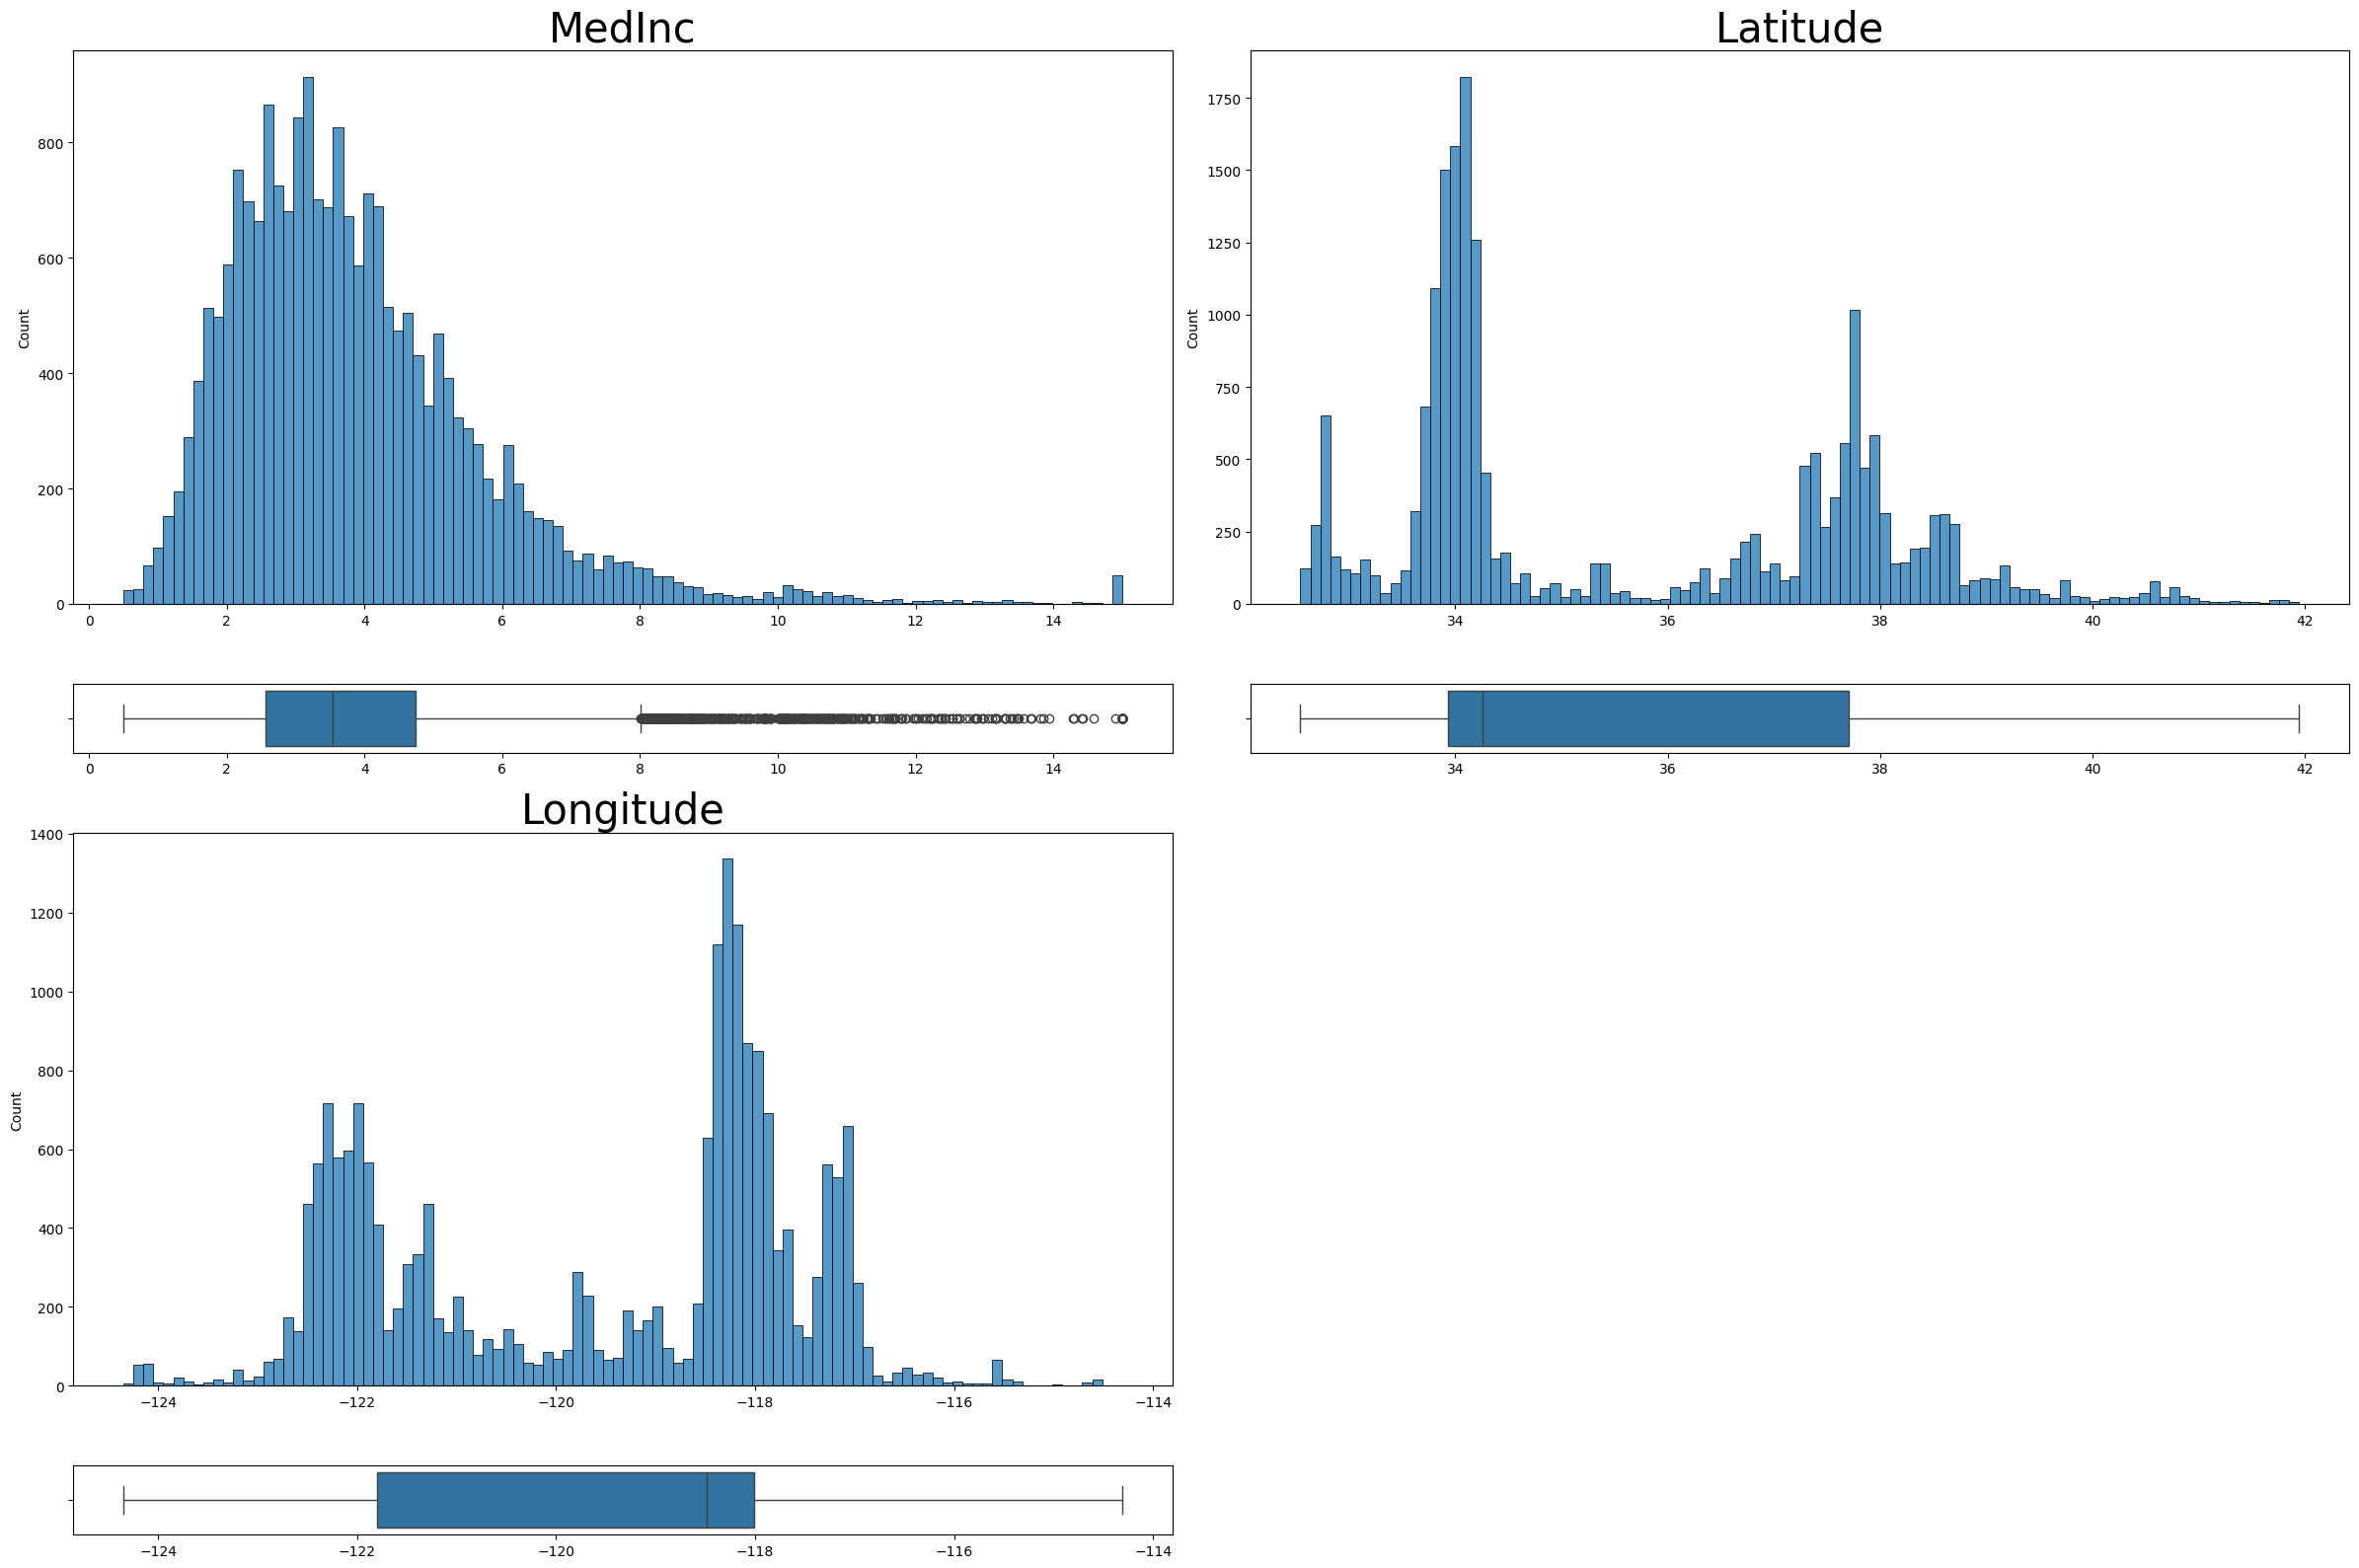

In [90]:
# ===============================
# PREVIOUS STEP DATA
# ===============================
df_S5 = df_S4.copy()
residual_S5 = residual_S3 if dataset_type == "TIME-SERIES" else None
seasonal_component_type_S5 = seasonal_component_type_S3 if dataset_type == "TIME-SERIES" else None

# ===============================
# STEP TITLE
# ===============================
print("===============================")
if dataset_type == "NLP":
    print("STEP 5) TRANSFORMATION OF TARGET VARIABLE - ",learning_type, dataset_type)
if dataset_type == "TIME-SERIES":
    print("STEP 5) VARIABILITY ANALYSIS - ",learning_type, dataset_type)
if dataset_type == "TABULAR":
    print("STEP 5 - UNIVARIABLE ANALYSIS - ",learning_type, dataset_type)
print("===============================\n")

# ===============================
# TARGET VARIABLE
# ===============================
print("-------------------------------")
print("TARGET VARIABLE")
print("-------------------------------")
float_discrete_threshold = min(30, round(0.02 * len(df_S4)))    # Dynamic threshold for FLOAT to be considered DISCRETE
if supervised_learning:
    # Basic stats
    y_unique_values = df_S5[y_var].nunique()
    y_unique_ratio = y_unique_values / len(df_S5) * 100
    y_dtype_kind = df_S5[y_var].dtype.kind
    y_var_type = None
    requires_formating_nlp = False
    # ----------------------------------------------
    # BASE TYPE DETECTION (dtype-driven)
    # ----------------------------------------------
    # Case 1: text-based or boolean columns → categorical
    if y_dtype_kind in ['O','b']:
        y_var_type = "CATEGORIC"
    # Case 2: numeric columns (int, uint, float) → decide later by cardinality
    elif y_dtype_kind in ['i','u','f']:
        y_var_type = "NUMERIC"
    # ----------------------------------------------
    # CARDINALITY RULE (only for numeric dtypes)
    # ----------------------------------------------
    if y_var_type == "NUMERIC":
        if y_unique_ratio <= var_type_proposal_threshold:
            y_var_type = "CATEGORIC"
    # ----------------------------------------------
    # OPTIONAL RULE — binary numeric treated as categorical
    # ----------------------------------------------
    if y_var_type == "NUMERIC" and y_unique_values == 2 and if_target_is_binary_treat_as_categoric:
        y_var_type = "CATEGORIC"
    # ----------------------------------------------
    # ASSIGN SUBTYPE
    # ----------------------------------------------
    if y_var_type == "CATEGORIC":
        requires_formating_nlp = True
        if y_unique_values == 2:
            y_var_subtype = "BINARY"
        elif y_unique_values > 2:
            y_var_subtype = "MULTICLASS"
        else:
            y_var_subtype = "CONSTANT"
        log("Confirmed TARGET Variable: " + y_var + " -> " + y_var_type + " and " + y_var_subtype, type="INFO", bold=True)
    else:
        if y_dtype_kind in ['i','u']:
            y_var_subtype = "DISCRETE"
        elif y_dtype_kind == 'f' and y_unique_values < float_discrete_threshold:
            y_var_subtype = "DISCRETE"
        else:
            y_var_subtype = "CONTINUOUS"
        log("Confirmed TARGET Variable: " + y_var + " -> NUMERIC and " + y_var_subtype, type="INFO", bold=True)
else:
    # UNSUPERVISED MODE: No target → skip entire target logic
    y_var = None
    y_var_type = None
    y_var_subtype = None
    requires_formating_nlp = False
    log("UNSUPERVISED MODE detected → No target variable is used in this pipeline", type="WARNING", bold=True)
print("\n")

# ===============================
# NLP DATASET
# ===============================
if dataset_type == "NLP":
    if not supervised_learning:
        log("UNSUPERVISED MODE → target transformation skipped", type="WARNING")
    else:
        # Transform y_var from CATEGORIC to NUMERIC format
        if requires_formating_nlp:
            # Instance encoder
            y_var_encoder = LabelEncoder()
            # Train encoder                       
            y_var_encoder.fit(df_S5[y_var])
            # Apply encoder                     
            df_S5[y_var] = y_var_encoder.transform(df_S5[y_var])    
            log(f"Target variable '{y_var}' has been transformed with LabelEncoder():", type="WARNING")
            for i in range(len(y_var_encoder.classes_)):
                log(f"{y_var_encoder.classes_[i]} -> {i}", level=2, type="INFO")
        else:
            log(f"Target variable '{y_var}' does not need to be transformed with LabelEncoder():", type="INFO")
        
# ===============================
# TIME-SERIES DATASET
# ===============================     
elif dataset_type == "TIME-SERIES":
    # Drop NaN values in residuals
    residual_S5 = residual_S5.dropna()
    # -------------------------------------------
    # RULE A: Check for visible trend in residuals
    # -------------------------------------------
    # Compute simple linear regression on residual vs time index
    x_index = np.arange(len(residual_S5))
    # Fit linear regression slope
    slope, intercept = np.polyfit(x_index, residual_S5.values, 1)
    # Compute residual standard deviation
    residual_std = np.std(residual_S5)
    # If residuals are almost constant → no trend by definition
    if residual_std < 1e-8:
        log("Residual's slope analysis: Residuals are almost constant → no visible trend (good).", type="SUCCESS")
    else:
        # Define a tolerance based on std and a minimum absolute tolerance
        if abs(slope) < max(residual_std * 0.01, 1e-6):
            log("Residual's slope analysis: No visible trend detected (good).", type="SUCCESS")
        else:
            log("Residual's slope analysis: Trend detected in residuals (bad).", type="WARNING", bold=True)
    # -------------------------------------------
    # RULE B: Check periodicity using ACF
    # -------------------------------------------
    # If residuals are almost constant → ACF cannot detect periodicity, assume GOOD
    if residual_std < 1e-8:
        log("Residual's ACF analysis: Residuals are almost constant → no periodicity possible (good).", level=1, type="SUCCESS")
    else:
        # Compute ACF up to 40 lags safely
        nlags = min(40, len(residual_S5) - 2)
        acf_res = acf(residual_S5, nlags=nlags, fft=True, missing="drop")
        # Detect highest non-zero lag correlation
        acf_res_no0 = acf_res[1:]
        max_acf_lag = np.argmax(np.abs(acf_res_no0)) + 1
        max_acf_value = acf_res[max_acf_lag]
        # Log ACF
        log(f"Residual ACF strongest lag={max_acf_lag}, value={max_acf_value:.3f}", level=1, type="INFO")
        # If ACF is NaN → cannot infer periodicity → assume GOOD
        if np.isnan(max_acf_value):
            log("Residual's ACF analysis: ACF cannot be computed reliably (likely constant residuals) → no periodicity detected (good).", level=1, type="SUCCESS")
        # Periodicity rule: if max ACF < 0.3 → no meaningful periodicity
        elif abs(max_acf_value) < 0.3:
            log("Residual's ACF analysis: No periodic patterns detected (good).", level=1, type="SUCCESS")
        else:
            log("Residual's ACF analysis: Residuals show periodic patterns (bad).", level=1, type="WARNING", bold=True)
    # -------------------------------------------
    # 4) RULE C: Check that residuals are centered
    # -------------------------------------------
    # Set theoretical center depending on decomposition model
    residual_center = 1.0 if seasonal_component_type_S5 == "multiplicative" else 0.0
    # Compute mean and standard deviation of cleaned residuals
    mean_res = residual_S5.mean()
    sd_res = residual_S5.std()
    # Define relative and absolute tolerances
    threshold_center = max(sd_res * 0.05, 1e-6)
    # Center rule: mean close to the expected center (0 additive, 1 multiplicative)
    if abs(mean_res - residual_center) < threshold_center:
        log(f"Residual's center analysis: Residuals centered around expected center ({residual_center}) (good).", level=1, type="SUCCESS")
    else:
        log(f"Residual's center analysis: Residuals not centered around expected center ({residual_center}) (bad).", level=1, type="WARNING")
    # -------------------------------------------
    # 5) RULE D: Check for randomness using Ljung–Box test
    # -------------------------------------------
    # Center residuals for randomness tests
    residual_S5_centered = residual_S5 - residual_center
    # Compute standard deviation
    sd_res_centered = residual_S5_centered.std()
    # If residuals are almost constant → cannot test randomness, but constant noise = GOOD
    if sd_res_centered < 1e-8:
        log("Residual's randomness analysis: Residuals are almost constant → randomness cannot be tested, assumed random (good).", level=1, type="SUCCESS")
    else:
        # Define safe number of lags
        safe_lag = min(10, len(residual_S5_centered) - 2)
        # Compute Ljung–Box p-value
        ljung_box_p = acorr_ljungbox(residual_S5_centered, lags=[safe_lag], return_df=True)["lb_pvalue"].iloc[0]
        # Log p-value
        log(f"Ljung–Box p-value (lag {safe_lag}) = {ljung_box_p:.4f}", type="INFO")
        # Randomness rule: if p > 0.05 → residuals behave like white noise
        if ljung_box_p > 0.05:
            log("Residual's randomness analysis: Residuals behave as random noise (good).", type="SUCCESS")
        else:
            log("Residual's randomness analysis: Residuals show correlation → not white noise (bad).", type="WARNING")

# ===============================
# TABULAR DATASET
# ===============================
elif dataset_type == "TABULAR":
    if not supervised_learning:
        # Just classify attributes normally
        category_att = category_var_auto.copy()
        numeric_att  = numeric_var_auto.copy()
        # CATEGORY subtyping
        binary_att = []
        multiclass_att = []
        constant_att = []
        for att in category_att:
            att_unique_values = df_S4[att].nunique()
            if att_unique_values == 2:
                binary_att.append(att)
            elif att_unique_values > 2:
                multiclass_att.append(att)
            else:
                constant_att.append(att)
        # NUMERIC subtyping
        discrete_att = []
        continuos_att = []
        for att in numeric_att:
            att_dtype = df_S4[att].dtype.kind
            unique_count = df_S4[att].nunique()
            if att_dtype in ['i','u']:
                discrete_att.append(att)
            elif att_dtype == 'f' and unique_count < float_discrete_threshold:
                discrete_att.append(att)
            else:
                continuos_att.append(att)
        # Print results
        log("Confirmed CATEGORY Attributes:", type="INFO")
        log(f"BINARY: {binary_att}",      level=2, type="INFO")
        log(f"MULTICLASS: {multiclass_att}", level=2, type="INFO")
        log(f"CONSTANT: {constant_att}",  level=2, type="INFO")
        log("Confirmed NUMERIC Attributes:", type="INFO")
        log(f"DISCRETE: {discrete_att}",  level=2, type="INFO")
        log(f"CONTINUOUS: {continuos_att}", level=2, type="INFO")
        if not make_plots_UNIVARIANT:
            log("UNIVARIABLE ANALYSIS is not printed, set make_plots_UNIVARIANT = True", type="WARNING")
        else:
            # Same plotting logic, but WITHOUT highlighting the target
            print("🏷️ CATEGORY VARIABLES")
            if not category_att:
                log("This type of plot is non applicable because there are not CATEGORIC variables in the DataFrame", type="WARNING")
            else:    
                var_to_plot = category_att.copy()
                num_cols = 2
                num_rows = math.ceil(len(var_to_plot) / num_cols)
                fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(figWidth_unit * num_cols, figHeight_unit * num_rows))
                axes = axes.flatten()
                idx = 0
                for col in var_to_plot:
                    unique_count = df_S5[col].nunique()
                    if unique_count > num_values_to_plot:
                        order = df_S5[col].value_counts().head(num_values_to_plot).index
                    else:
                        order = df_S5[col].value_counts().index
                    sns.countplot(ax=axes[idx], data=df_S5, x=col, hue=col, palette=plot_palette, order=order, legend=False)
                    axes[idx].tick_params(axis='x', rotation=90, labelsize=plot_tick_font_size)
                    axes[idx].set_title(col, fontdict={"fontsize": plot_title_font_size})
                    axes[idx].set_xlabel("")
                    idx += 1
                for j in range(idx, len(axes)):
                    axes[j].set_visible(False)
                plt.tight_layout()
                plt.show()
            print("🔢 NUMERIC VARIABLES")
            if not numeric_att:
                log("This type of plot is non applicable because there are not NUMERIC variables in the DataFrame", type="WARNING")
            else:
                var_to_plot = numeric_att.copy()
                num_cols = 2
                num_rows = math.ceil(len(var_to_plot) / num_cols)
                fig, axes = plt.subplots(nrows=num_rows * 2, ncols=num_cols,
                                         figsize=(figWidth_unit * num_cols, figHeight_unit * num_rows),
                                         gridspec_kw={'height_ratios': [4, 0.5] * num_rows})
                var_idx = 0
                for row in range(num_rows):
                    for col in range(num_cols):
                        if var_idx >= len(var_to_plot):
                            axes[row * 2, col].set_visible(False)
                            axes[row * 2 + 1, col].set_visible(False)
                            continue
                        colname = var_to_plot[var_idx]
                        sns.histplot(ax=axes[row * 2, col], data=df_S5, x=colname, bins=num_bins)
                        sns.boxplot(ax=axes[row * 2 + 1, col], data=df_S5, x=colname)
                        axes[row * 2, col].set_title(colname, fontdict={"fontsize": plot_title_font_size})
                        axes[row * 2, col].set_xlabel("")
                        axes[row * 2 + 1, col].set_xlabel("")
                        var_idx += 1
                plt.tight_layout()
                plt.show()
    else:
        # Confirm attribute types
        category_att = []
        numeric_att = []
        for att in category_var_auto:
            if att != y_var:
                category_att.append(att)
        for att in numeric_var_auto:
            if att != y_var:
                numeric_att.append(att)
        # Checking CATEGORY attributes
        binary_att = []
        multiclass_att = []
        constant_att = []
        for att in category_att:
            att_unique_values = df_S4[att].nunique()
            if att_unique_values == 2:
                binary_att.append(att)
            elif att_unique_values > 2:
                multiclass_att.append(att)
            else:
                constant_att.append(att)
        # Checking NUMERIC attributes
        discrete_att = []
        continuos_att = []
        for att in numeric_att:
            att_dtype = df_S4[att].dtype.kind
            unique_count = df_S4[att].nunique()
            if att_dtype in ['i', 'u']:
                discrete_att.append(att)
            elif att_dtype == 'f' and unique_count < float_discrete_threshold:
                discrete_att.append(att)
            else:
                continuos_att.append(att)
        # Print results
        log("Confirmed CATEGORY Attributes:", type="INFO")
        log(f"BINARY: {binary_att}", level=2, type="INFO")
        log(f"MULTICLASS: {multiclass_att}", level=2, type="INFO")
        log(f"CONSTANT: {constant_att}", level=2, type="INFO")
        log("Confirmed NUMERIC Attributes:", type="INFO")
        log(f"DISCRETE: {discrete_att}", level=2, type="INFO")
        log(f"CONTINUOUS: {continuos_att}", level=2, type="INFO")

        if not make_plots_UNIVARIANT:
            log("UNIVARIABLE ANALYSIS is not printed, set make_plots_UNIVARIANT = True", type="WARNING")
        else:
            # -------------------------------------------
            # CATEGORY VARIABLES (including target if categorical)
            # -------------------------------------------
            print("🏷️ CATEGORY VARIABLES")
            if not category_att and y_var_type == "NUMERIC":
                log("This type of plot is non applicable because there are not CATEGORIC variables in the DataFrame", type="WARNING")
            else:    
                var_to_plot = category_att.copy()
                if y_var_type == "CATEGORIC" and y_var not in var_to_plot:
                    var_to_plot.insert(0, y_var)
                # Figure
                num_cols = 2
                num_rows = math.ceil(len(var_to_plot) / num_cols)
                fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(figWidth_unit * num_cols, figHeight_unit * num_rows))
                axes = axes.flatten()
                idx = 0
                for col in var_to_plot:
                    unique_count = df_S5[col].nunique()
                    if unique_count > num_values_to_plot:
                        order = df_S5[col].value_counts().head(num_values_to_plot).index
                    else:
                        order = df_S5[col].value_counts().index
                    # Countplot
                    sns.countplot(ax=axes[idx], data=df_S5, x=col, hue=col, palette=plot_palette, order=order, legend=False)
                    axes[idx].tick_params(axis='x', rotation=90, labelsize=plot_tick_font_size)
                    axes[idx].set_xlabel("")
                    # Highlight target
                    target_box_style = dict(facecolor='none', edgecolor=y_var_highlighting_color, linewidth=5)
                    target_title_style = dict(fontsize= plot_title_font_size, color=y_var_highlighting_color, fontweight='bold')
                    if col == y_var:
                        axes[idx].set_title(col, **target_title_style)
                        axes[idx].add_patch(plt.Rectangle((0, 0), 1, 1, transform=axes[idx].transAxes, **target_box_style))
                    else:
                        axes[idx].set_title(col, fontdict = {"fontsize": plot_title_font_size})
                    # Add truncated info
                    if unique_count > num_values_to_plot:
                        msg = f"There are {unique_count} values,\nbut only {num_values_to_plot} have been plotted"
                        axes[idx].text(0.5, 0.9, msg, transform=axes[idx].transAxes, fontsize=plot_text_font_size, color="red", ha="center", va="top", bbox=dict(facecolor="grey", alpha=0.25, edgecolor="red"))
                    idx += 1
                # Hide unused axes
                for j in range(idx, len(axes)):
                    axes[j].set_visible(False)
                plt.tight_layout()
                plt.show()
            # -------------------------------------------
            # NUMERIC VARIABLES (including target if numeric)
            # -------------------------------------------
            print("🔢 NUMERIC VARIABLES")
            if not numeric_att and y_var_type == "CATEGORIC":
                log("This type of plot is non applicable because there are not NUMERIC variables in the DataFrame", type="WARNING")
            else: 
                var_to_plot = numeric_att.copy()
                if y_var_type == "NUMERIC" and y_var not in var_to_plot:
                    var_to_plot.insert(0, y_var)
                # Figure
                num_cols = 2 
                num_rows = math.ceil(len(var_to_plot) / num_cols)
                fig, axes = plt.subplots(nrows=num_rows * 2, ncols=num_cols, figsize=(figWidth_unit * num_cols, figHeight_unit * num_rows), gridspec_kw={'height_ratios': [4, 0.5] * num_rows})
                var_idx = 0
                for row in range(num_rows):
                    for col in range(num_cols):
                        if var_idx >= len(var_to_plot):
                            axes[row * 2, col].set_visible(False)
                            axes[row * 2 + 1, col].set_visible(False)
                            continue
                        colname = var_to_plot[var_idx]
                        # Histogram
                        sns.histplot(ax=axes[row * 2, col], data=df_S5, x=colname, bins=num_bins)
                        axes[row * 2, col].set_xlabel("")
                        # Boxplot
                        sns.boxplot(ax=axes[row * 2 + 1, col], data=df_S5, x=colname)
                        axes[row * 2 + 1, col].set_xlabel("")
                        # Highlight target
                        if colname == y_var:
                            axes[row * 2, col].set_title(colname, **target_title_style)
                            axes[row * 2 + 1, col].set_title(colname, **target_title_style)
                            axes[row * 2, col].add_patch(plt.Rectangle((0, 0), 1, 1, transform=axes[row * 2, col].transAxes, **target_box_style))
                            axes[row * 2 + 1, col].add_patch(plt.Rectangle((0, 0), 1, 1, transform=axes[row * 2 + 1, col].transAxes, **target_box_style))
                        else:
                            axes[row * 2, col].set_title(colname, fontdict = {"fontsize": plot_title_font_size})
                        var_idx += 1
                plt.tight_layout()
                plt.show()

## STEP 6

#### <span style="color:orange">Inputs for NLP (SUPERVISED or UNSUPERVISED)</span>

In [91]:
# Default settings for text preprocessing:
lowercase_text = True                   # Convert all text to lowercase
remove_urls = True                     # Remove http/https/www links
remove_emails = True                   # Remove email addresses
remove_html_tags = True                # Remove HTML tags
remove_non_letters = True              # Remove digits, punctuation, symbols, emojis, etc.
remove_single_char_tokens = True       # Remove isolated 1-letter tokens (e.g., "a", "b")
reduce_whitespace = True                # Replace multiple spaces with a single one
tokenize_output = True                  # Output is a list of tokens after cleaning

#### <span style="color:orange">Inputs for TABULAR (SUPERVISED or UNSUPERVISED)</span>

In [92]:
make_plots_MULTIVARIANT_ATTRIBUTES = True
make_plots_GLOBAL_SCATTER = True
make_plots_GLOBAL_PCA = True
compute_GLOBAL_GEOMETRY_METRICS = True

#### <span style="color:lightgreen">Inputs for TABULAR (SUPERVISED)</span>

In [93]:
make_plots_MULTIVARIANT_TARGET = True
category_combi_att = ""                # Combination attribute for multivariant analysis (must be a CATEGORIC attribute)

STEP 6 - MULTIVARIANT ANALYSIS -  UNSUPERVISED TABULAR


 🔍 GLOBAL 2D / 3D SCATTER (UNSUPERVISED)


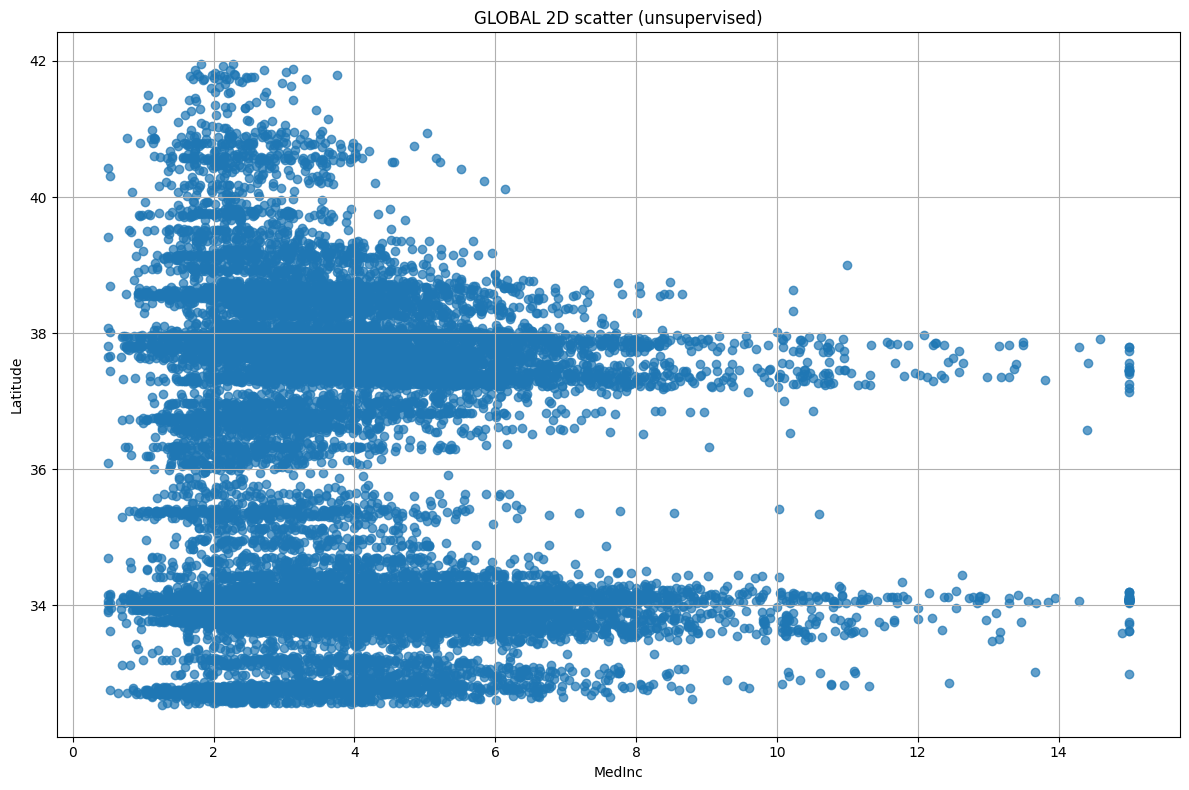


 🔍 PCA 2D (UNSUPERVISED)


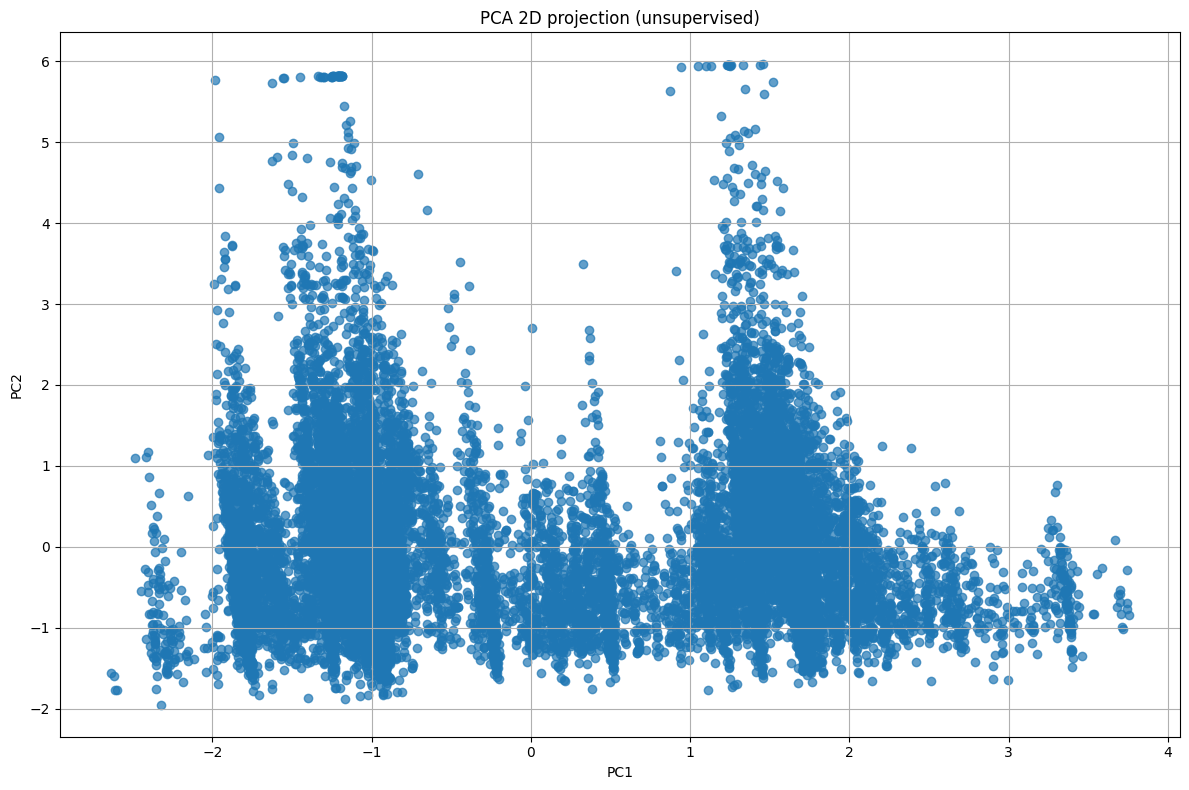

• ⚠️ UNSUPERVISED MODE → Target-based multivariant plots skipped

 🔢 NUMERIC Attributes VS 🔢 NUMERIC Attributes
• ⚠️ This type of plot is non applicable because there are not CATEGORIC attributes in the DataFrame

 🏷️🔢 ALL Attributes VS 🏷️🔢 ALL Attributes


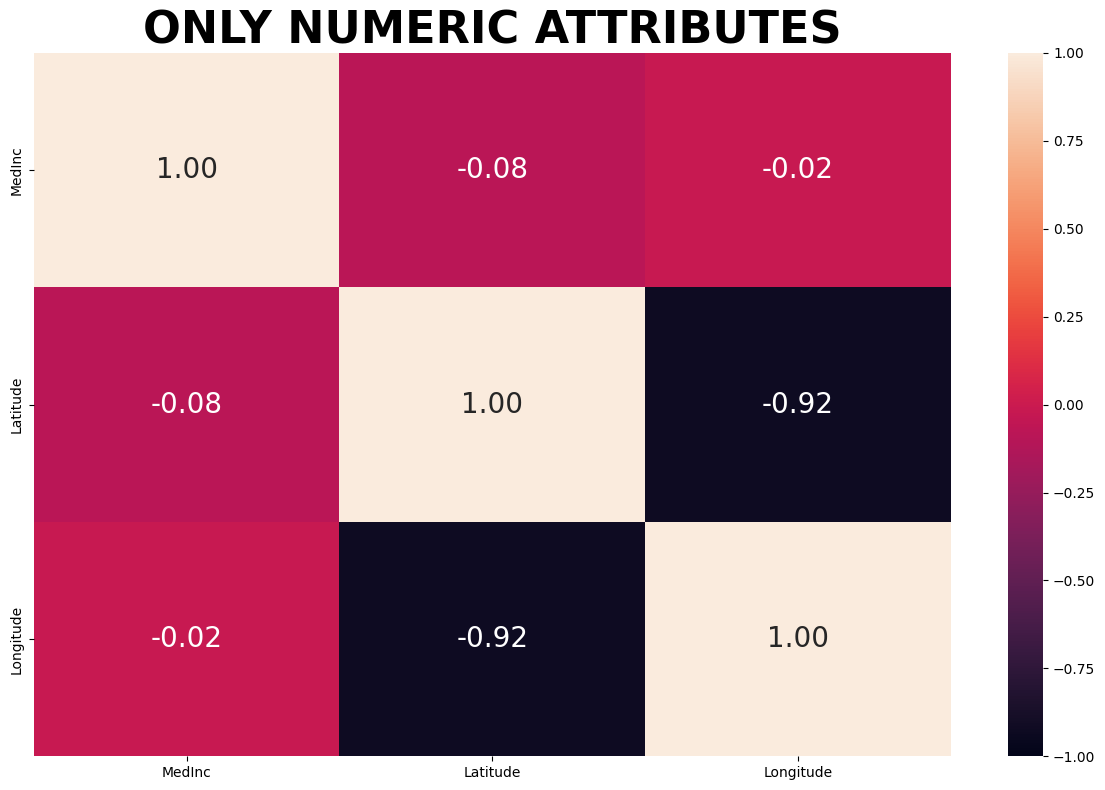

<Figure size 1200x800 with 0 Axes>

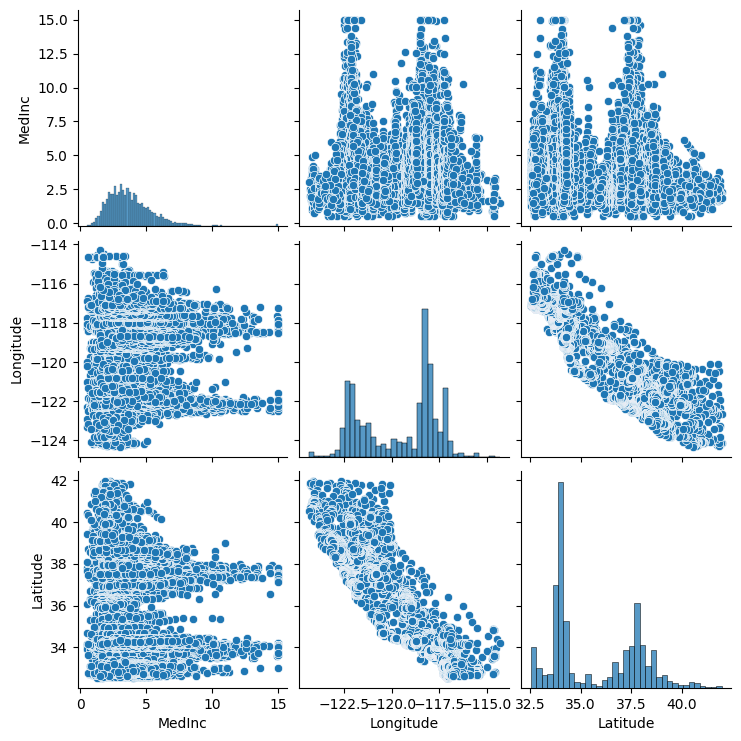

In [94]:
# ===============================
# PREVIOUS STEP DATA
# ===============================
df_S6 = df_S5.copy()
main_text_col_S6 = main_text_col_S4 if dataset_type == "NLP" else None
df_timeseries_S6 = df_timeseries_S3.copy() if dataset_type == "TIME-SERIES" else None
period_S6 = period_S3 if dataset_type == "TIME-SERIES" else None
suggested_d = diff_count_S4 if dataset_type == "TIME-SERIES" else None
df_stacionary_timeseries_for_pacf_S6 = df_stationary_timeseries_S4.copy() if dataset_type == "TIME-SERIES" else None

# ===============================
# STEP TITLE
# ===============================
print("===============================")
if dataset_type == "NLP":
    print("STEP 6) TEXT PROCESSING - ",learning_type, dataset_type)
if dataset_type == "TIME-SERIES":
    print("STEP 6) AUTOCORRELATION ANALYSIS - ",learning_type, dataset_type)
if dataset_type == "TABULAR":
    print("STEP 6 - MULTIVARIANT ANALYSIS - ",learning_type, dataset_type)
print("===============================\n")

# ===============================
# NLP DATASET
# ===============================
if dataset_type == "NLP":
    # 1) Store original text before any modification
    df_S6[main_text_col_S6 + "_tmp"] = df_S6[main_text_col_S6].astype(str)
    # 2) Compute clean tokens from preprocess_text
    df_S6[main_text_col_S6 + "_clean"] = df_S6[main_text_col_S6 + "_tmp"].apply(
        lambda txt: preprocess_text(
            txt,
            mode="auto",
            lowercase_text=lowercase_text,
            remove_urls=remove_urls,
            remove_emails=remove_emails,
            remove_html_tags=remove_html_tags,
            remove_non_letters=remove_non_letters,
            remove_single_char_tokens=remove_single_char_tokens,
            reduce_whitespace=reduce_whitespace,
            tokenize_output=tokenize_output
        )["output"])
    # 3) Compute processing mode (url / text)
    df_S6["processing_mode"] = df_S6[main_text_col_S6 + "_tmp"].apply(
        lambda txt: preprocess_text(
            txt,
            mode="auto",
            lowercase_text=lowercase_text,
            remove_urls=remove_urls,
            remove_emails=remove_emails,
            remove_html_tags=remove_html_tags,
            remove_non_letters=remove_non_letters,
            remove_single_char_tokens=remove_single_char_tokens,
            reduce_whitespace=reduce_whitespace,
            tokenize_output=tokenize_output
        )["mode_used"])
    # 4) Build the inspection DataFrame
    df_inspection_S6 = pd.DataFrame({
        main_text_col_S6 : df_S6[main_text_col_S6 + "_tmp"],
        "processing_mode_used": df_S6["processing_mode"]
    })
    # 5) Clean df_S6 for downstream pipeline
    df_S6=df_S6.drop(labels=[main_text_col_S6], axis =1)
    df_S6 = df_S6.rename(columns={main_text_col_S6 + "_clean": main_text_col_S6})
    if supervised_learning:
        # Keep clean text + target
        df_S6 = df_S6[[main_text_col_S6, y_var]]
    else:
        # Keep ONLY the clean text column
        df_S6 = df_S6[[main_text_col_S6]]

    log("Text preprocessing applied successfully:", type="SUCCESS")
    log("Processing mode used:", type="INFO")
    display(df_inspection_S6)
    log("Current DataFrame content:", type="INFO")
    display(df_S6)

# ===============================
# TIME-SERIES DATASET
# ===============================       
elif dataset_type == "TIME-SERIES":
    # Set frequency for ARIMA based on granularity
    freq = get_freq_from_granularity(granularity)
    if freq is not None:
        try:
            df_timeseries_S6 = df_timeseries_S6.asfreq(freq)
            log(f"Applied pandas frequency '{freq}' to series for ARIMA modeling.", level=1, type="INFO")
        except Exception as e:
            log(f"Could not apply frequency '{freq}': {e}", level=1, type="WARNING")
    else:
        log(f"No valid pandas freq for granularity='{granularity}', ARIMA frequency skipped.", level=1, type="WARNING")
    # If series is almost constant → no meaningful ACF/PACF
    if df_timeseries_S6.std() < 1e-8:
        log("ACF/PACF analysis: Time-series is almost constant → no meaningful autocorrelation.", level=1, type="WARNING")
    else:
        # Get recommended lag based on granularity
        recommended_lag = get_recommended_lag(granularity)
        # Limit by available data
        safe_lag = min(recommended_lag, len(df_timeseries_S6) - 2)
        # Log chosen lag
        log(f"Used safe_lag = {safe_lag} (recommended={recommended_lag}, granularity={granularity})", level=1, type="INFO")
        # Compute confidence (95%) limit for significance bands
        conf_limit = 1.96 / np.sqrt(len(df_timeseries_S6))

        # -------------------------------------------
        # ACF BEHAVIOUR
        # -------------------------------------------
        # Compute numerical ACF values
        acf_vals = acf(df_timeseries_S6, nlags=safe_lag, fft=True, missing="drop")
        # Build list of significant ACF lags
        significant_acf_lags = []
        seasonal_peaks_S6 = []
        for lag in range(1, len(acf_vals)):
            val = acf_vals[lag]
            if abs(val) > conf_limit:
                significant_acf_lags.append(lag)
        if len(significant_acf_lags) == 0:
            log("ACF analysis: No significant autocorrelation detected → series close to white noise.", level=1, type="INFO")
        else:
            log(f"ACF analysis: Significant autocorrelation at lags {significant_acf_lags}.", level=1, type="INFO")
            # Check short-lag ACF persistence (trend indicator)
            short_lags = []
            for lag in significant_acf_lags:
                if lag <= min(get_short_lag_cutoff(granularity), safe_lag):
                    short_lags.append(lag)
            if len(short_lags) > 0:
                log("ACF analysis: High short-lag autocorrelation → possible trend or strong persistence.", level=1, type="INFO")
            # Check for seasonal multiples
            if (period_S6 is not None) and (period_S6 <= safe_lag):
                seasonal_peaks = []
                max_k = safe_lag // period_S6
                for k in range(1, max_k + 1):
                    lag = k * period_S6
                    if lag in significant_acf_lags:
                        seasonal_peaks.append(lag)
                seasonal_peaks_clean_print = []        
                for l in seasonal_peaks:
                    seasonal_peaks_clean_print.append(int(l))
                if len(seasonal_peaks) > 0:
                    seasonal_peaks_S6 = seasonal_peaks.copy()
                    log(f"ACF analysis: Significant seasonal peaks at lags {seasonal_peaks_clean_print} → strong seasonality.", level=1, type="SUCCESS")

        # -------------------------------------------
        # PACF BEHAVIOUR
        # -------------------------------------------
        # Compute numerical PACF values
        pacf_vals = pacf(df_stacionary_timeseries_for_pacf_S6, nlags=safe_lag, method="ywm")
        # Build list of significant PACF lags
        significant_pacf_lags = []
        for lag in range(1, len(pacf_vals)):
            val = pacf_vals[lag]
            if abs(val) > conf_limit:
                significant_pacf_lags.append(lag)
        if len(significant_pacf_lags) == 0:
            suggested_p = 0
            log("PACF analysis: No significant partial autocorrelation detected.", level=1, type="INFO")
        else:
            log(f"PACF analysis: Significant PACF lags detected {significant_pacf_lags}.", level=1, type="INFO")
            # Keep non-seasonal PACF lags
            non_seasonal_pacf = []
            for lag in significant_pacf_lags:
                if (period_S6 is None) or (lag % period_S6 != 0):
                    non_seasonal_pacf.append(lag)
            if len(non_seasonal_pacf) > 0:
                suggested_p = non_seasonal_pacf[0]
                log(f"PACF analysis: First significant non-seasonal lag = {suggested_p} → candidate AR order p ≈ {suggested_p}.", level=1, type="INFO")
            else:
                suggested_p = 0
        # -------------------------------------------
        # MODEL ORDER SUGGESTION (AR / MA)
        # -------------------------------------------
        if len(significant_acf_lags) > 0:
            suggested_q = significant_acf_lags[0]
        else:
            suggested_q = 0
        # Start from suggested values
        candidate_orders = [(suggested_p, suggested_d, suggested_q)]
        # If suggested_p = 0, also try p = 1 as alternative
        if suggested_p == 0:
            candidate_orders.append((1, suggested_d, suggested_q))
        best_aic = np.inf
        best_order = None
        for (p_try, d_try, q_try) in candidate_orders:
            try:
                model_try = ARIMA(df_timeseries_S6, order=(p_try, d_try, q_try))
                result_try = model_try.fit()
                if result_try.aic < best_aic:
                    best_aic = result_try.aic
                    best_order = (p_try, d_try, q_try)
            except Exception as e:
                log(f"ARIMA({p_try},{d_try},{q_try}) could not be fitted: {e}", type="WARNING")

        if best_order is not None:
            suggested_p, suggested_d, suggested_q = best_order
            log(f"Final ARIMA order suggestion: (p,d,q)=({suggested_p},{suggested_d},{suggested_q}) after AIC-checked refinement (best AIC={best_aic:.2f}).", level=1, type="INFO", bold=True)

        # -------------------------------------------
        # PLOT ACF
        # -------------------------------------------
        fig_acf, ax_acf = plt.subplots(nrows=1, ncols=1, figsize=(2 * figWidth_unit, 1 * figHeight_unit))
        plot_acf(df_timeseries_S6, lags=safe_lag, ax=ax_acf)
        ax_acf.set_title(label="Autocorrelation Function (ACF)", fontsize=plot_title_font_size)
        ax_acf.set_xlabel(xlabel="Lag", fontsize=plot_label_font_size)
        ax_acf.set_ylabel(ylabel="Autocorrelation", fontsize=plot_label_font_size)
        ax_acf.tick_params(labelsize=plot_tick_font_size)
        ax_acf.grid(True, linestyle="dotted", linewidth=0.5, color="black")
        # Build manual legend to avoid statsmodels overwriting handles
        handles, labels = [], []
        # Highlight short-lag zone (trend indicator)
        short_cutoff = min(get_short_lag_cutoff(granularity), safe_lag)
        ax_acf.axvspan(
            xmin=1,
            xmax=short_cutoff,
            color="lightblue",
            alpha=0.35,
            label=f"Short-lag zone (≤ {short_cutoff})"
        )
        handles.append(plt.Line2D([0], [0], color="lightblue", linewidth=10, alpha=0.35))
        labels.append(f"Short-lag zone (≤ {short_cutoff})")
        # Mark seasonal period (if applicable)
        if (period_S6 is not None) and (period_S6 <= safe_lag):
            ax_acf.axvline(
                x=period_S6,
                color="orange",
                linestyle="-",
                linewidth=4.0,
                alpha=0.8,
                label=f"Seasonal period (lag={period_S6})"
            )
            handles.append(plt.Line2D([0], [0], color="orange", linewidth=4))
            labels.append(f"Seasonal period (lag={period_S6})")
        # Mark significant ACF lags (points)
        if len(significant_acf_lags) > 0:
            ax_acf.scatter(
                significant_acf_lags,
                [acf_vals[lag] for lag in significant_acf_lags],
                color="blue",
                s=100,
                label="Significant lags"
            )
            handles.append(plt.Line2D([0], [0], marker="o", color="blue", linestyle="None"))
            labels.append("Significant lags")
        # Info text box
        ax_acf.text(
            0.98, 0.02,
            f"safe_lag = {safe_lag}\n"
            f"granularity = {granularity}",
            ha='right',
            va='bottom',
            transform=ax_acf.transAxes,
            fontsize=plot_text_font_size,
            bbox=dict(boxstyle="round", fc="white", alpha=0.6)
        )
        # Show legend and plot
        ax_acf.legend(handles, labels, loc="upper right", fontsize=plot_text_font_size)
        plt.tight_layout()
        plt.show()

        # -------------------------------------------
        # PLOT PACF
        # -------------------------------------------
        fig_pacf, ax_pacf = plt.subplots(nrows=1, ncols=1, figsize=(2 * figWidth_unit, 1 * figHeight_unit))
        plot_pacf(df_timeseries_S6, lags=safe_lag, ax=ax_pacf)
        ax_pacf.set_title(label="Partial Autocorrelation Function (PACF)", fontsize=plot_title_font_size)
        ax_pacf.set_xlabel(xlabel="Lag", fontsize=plot_label_font_size)
        ax_pacf.set_ylabel(ylabel="Partial autocorrelation", fontsize=plot_label_font_size)
        ax_pacf.tick_params(labelsize=plot_tick_font_size)
        ax_pacf.grid(True, linestyle="dotted", linewidth=0.5, color="black")
        # Build manual legend to avoid statsmodels overwriting handles
        handles, labels = [], []
        # Mark significant PACF lags (points)
        if len(significant_pacf_lags) > 0:
            ax_pacf.scatter(
                significant_pacf_lags,
                [pacf_vals[lag] for lag in significant_pacf_lags],
                color="blue",
                s=100,
                label="Significant lags"
            )
            handles.append(plt.Line2D([0], [0], marker="o", color="blue", linestyle="None"))
            labels.append("Significant lags")
        # Info text box
        ax_pacf.text(
            0.98, 0.02,
            f"safe_lag = {safe_lag}",
            ha='right',
            va='bottom',
            transform=ax_pacf.transAxes,
            fontsize=plot_text_font_size,
            bbox=dict(boxstyle="round", fc="white", alpha=0.6)
        )
        # Show legend and plot
        ax_pacf.legend(handles, labels, loc="upper right", fontsize=plot_text_font_size)
        plt.tight_layout()
        plt.show()

# ===============================
# TABULAR DATASET
# ===============================
elif dataset_type == "TABULAR":
    # Prepare aligned NUMERIC matrix for global plots / metrics
    X_numeric_S6 = None
    y_aligned_S6 = None
    if supervised_learning and (len(numeric_att) > 0) and (y_var in df_S6.columns):
        X_numeric_S6 = df_S6[numeric_att].dropna()
        if len(X_numeric_S6) > 0:
            y_aligned_S6 = df_S6.loc[X_numeric_S6.index, y_var]

    # -------------------------------------------
    # GLOBAL 2D / 3D SCATTER (KNN intuition)
    # -------------------------------------------
    if make_plots_GLOBAL_SCATTER:
        if not supervised_learning:
            # Unsupervised version → no hue=y_var
            if (len(numeric_att) >= 2):
                print("\n 🔍 GLOBAL 2D / 3D SCATTER (UNSUPERVISED)")
                x_col = numeric_att[0]
                y_col = numeric_att[1]
                fig, ax = plt.subplots(figsize=(figWidth_unit, figHeight_unit))
                ax.scatter(df_S6[x_col], df_S6[y_col], alpha=0.7)
                ax.set_xlabel(x_col)
                ax.set_ylabel(y_col)
                ax.set_title("GLOBAL 2D scatter (unsupervised)")
                ax.grid(True)
                plt.tight_layout()
                plt.show()
        else:
            if (X_numeric_S6 is not None) and (X_numeric_S6.shape[1] >= 2):
                print("\n 🔍 GLOBAL 2D / 3D SCATTER (NUMERIC attributes)")
                num_features_scatter = X_numeric_S6.shape[1]
                feature_names_scatter = X_numeric_S6.columns.tolist()

                # 2D scatter (first two NUMERIC attributes)
                x_col = feature_names_scatter[0]
                y_col = feature_names_scatter[1]
                fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(figWidth_unit, figHeight_unit))
                if y_var_type == "CATEGORIC":
                    sns.scatterplot(ax=ax, data=df_S6, x=x_col, y=y_col, hue=y_var, palette=plot_palette, alpha=0.7)
                else:
                    scatter = ax.scatter(df_S6[x_col], df_S6[y_col], c=df_S6[y_var], alpha=0.7)
                    cbar = plt.colorbar(scatter, ax=ax)
                    cbar.set_label(y_var)
                ax.set_xlabel(x_col, fontsize=plot_label_font_size)
                ax.set_ylabel(y_col, fontsize=plot_label_font_size)
                ax.set_title("GLOBAL 2D scatter (first 2 NUMERIC attributes)", fontsize=plot_title_font_size)
                ax.grid(True, linestyle="dotted", linewidth=0.5, color="black")
                plt.tight_layout()
                plt.show()

                # 3D scatter (first three NUMERIC attributes)
                if num_features_scatter >= 3:
                    z_col = feature_names_scatter[2]
                    fig = plt.figure(figsize=(figWidth_unit * 1.5, figHeight_unit * 1.5))
                    ax3d = fig.add_subplot(111, projection="3d")
                    if y_var_type == "CATEGORIC":
                        unique_classes = df_S6[y_var].dropna().unique().tolist()
                        for cls in unique_classes:
                            mask = df_S6[y_var] == cls
                            ax3d.scatter(df_S6.loc[mask, x_col], df_S6.loc[mask, y_col], df_S6.loc[mask, z_col], label=str(cls), alpha=0.7)
                        ax3d.legend(title=y_var)
                    else:
                        scatter3d = ax3d.scatter(df_S6[x_col], df_S6[y_col], df_S6[z_col], c=df_S6[y_var], alpha=0.7)
                        cbar = plt.colorbar(scatter3d, ax=ax3d, pad=0.1)
                        cbar.set_label(y_var)
                    ax3d.set_xlabel(x_col)
                    ax3d.set_ylabel(y_col)
                    ax3d.set_zlabel(z_col)
                    ax3d.set_title("GLOBAL 3D scatter (first 3 NUMERIC attributes)")
                    plt.tight_layout()
                    plt.show()
    # -------------------------------------------
    # GLOBAL PCA 2D / 3D (KNN intuition)
    # -------------------------------------------
    if make_plots_GLOBAL_PCA:
        if not supervised_learning:
            # Unsupervised PCA
            if len(numeric_att) >= 2:
                print("\n 🔍 PCA 2D (UNSUPERVISED)")
                scaler = StandardScaler()
                X_scaled = scaler.fit_transform(df_S6[numeric_att])
                pca_2d = PCA(n_components=2, random_state=random_seed)
                X_pca = pca_2d.fit_transform(X_scaled)
                fig, ax = plt.subplots(figsize=(figWidth_unit, figHeight_unit))
                ax.scatter(X_pca[:,0], X_pca[:,1], alpha=0.7)
                ax.set_title("PCA 2D projection (unsupervised)")
                ax.set_xlabel("PC1")
                ax.set_ylabel("PC2")
                ax.grid(True)
                plt.tight_layout()
                plt.show()
        else:
            if (X_numeric_S6 is not None) and (X_numeric_S6.shape[1] >= 2):
                print("\n 🔍 PCA 2D / 3D (NUMERIC attributes)")
                scaler = StandardScaler()
                X_scaled = scaler.fit_transform(X_numeric_S6)

                # PCA 2D
                pca_2d = PCA(n_components=2, random_state=random_seed)
                X_pca_2d = pca_2d.fit_transform(X_scaled)
                df_pca_2d = pd.DataFrame(X_pca_2d, columns=["PC1", "PC2"])
                df_pca_2d[y_var] = y_aligned_S6.values

                fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(figWidth_unit, figHeight_unit))
                if y_var_type == "CATEGORIC":
                    sns.scatterplot(ax=ax, data=df_pca_2d, x="PC1", y="PC2", hue=y_var, palette=plot_palette, alpha=0.7)
                else:
                    scatter = ax.scatter(df_pca_2d["PC1"], df_pca_2d["PC2"], c=df_pca_2d[y_var], alpha=0.7)
                    cbar = plt.colorbar(scatter, ax=ax)
                    cbar.set_label(y_var)
                ax.set_xlabel("PC1", fontsize=plot_label_font_size)
                ax.set_ylabel("PC2", fontsize=plot_label_font_size)
                ax.set_title("PCA 2D projection (NUMERIC attributes)", fontsize=plot_title_font_size)
                ax.grid(True, linestyle="dotted", linewidth=0.5, color="black")
                plt.tight_layout()
                plt.show()

                # PCA 3D
                if X_numeric_S6.shape[1] >= 3:
                    pca_3d = PCA(n_components=3, random_state=random_seed)
                    X_pca_3d = pca_3d.fit_transform(X_scaled)
                    df_pca_3d = pd.DataFrame(X_pca_3d, columns=["PC1", "PC2", "PC3"])
                    df_pca_3d[y_var] = y_aligned_S6.values

                    fig = plt.figure(figsize=(figWidth_unit * 1.5, figHeight_unit * 1.5))
                    ax3d = fig.add_subplot(111, projection="3d")
                    if y_var_type == "CATEGORIC":
                        unique_classes = df_pca_3d[y_var].dropna().unique().tolist()
                        for cls in unique_classes:
                            mask = df_pca_3d[y_var] == cls
                            ax3d.scatter(df_pca_3d.loc[mask, "PC1"], df_pca_3d.loc[mask, "PC2"], df_pca_3d.loc[mask, "PC3"], label=str(cls), alpha=0.7)
                        ax3d.legend(title=y_var)
                    else:
                        scatter3d = ax3d.scatter(df_pca_3d["PC1"], df_pca_3d["PC2"], df_pca_3d["PC3"], c=df_pca_3d[y_var], alpha=0.7)
                        cbar = plt.colorbar(scatter3d, ax=ax3d, pad=0.1)
                        cbar.set_label(y_var)
                    ax3d.set_xlabel("PC1")
                    ax3d.set_ylabel("PC2")
                    ax3d.set_zlabel("PC3")
                    ax3d.set_title("PCA 3D projection (NUMERIC attributes)")
                    plt.tight_layout()
                    plt.show()
    # -------------------------------------------
    # GEOMETRIC SEPARABILITY METRICS
    # (Fisher score + Silhouette in PCA 2D)
    # -------------------------------------------
    if compute_GLOBAL_GEOMETRY_METRICS and (X_numeric_S6 is not None) and (y_var_type == "CATEGORIC") and (y_aligned_S6 is not None):
        print("\n 📏 GEOMETRIC SEPARABILITY METRICS (TABULAR)")

        # Fisher scores (one per NUMERIC attribute)
        def compute_fisher_scores(X_df, y_series):
            scores = {}
            overall_means = X_df.mean(axis=0)
            classes = y_series.dropna().unique().tolist()
            for col in X_df.columns:
                num = 0.0
                den = 0.0
                for cls in classes:
                    mask = y_series == cls
                    x_c = X_df.loc[mask, col]
                    if len(x_c) == 0:
                        continue
                    n_c = len(x_c)
                    mean_c = x_c.mean()
                    var_c = x_c.var()
                    num += n_c * (mean_c - overall_means[col])**2
                    den += n_c * var_c
                if den == 0:
                    scores[col] = 0.0
                else:
                    scores[col] = num / den
            return pd.Series(scores).sort_values(ascending=False)

        fisher_scores_S6 = compute_fisher_scores(X_numeric_S6, y_aligned_S6)
        log("Fisher scores per NUMERIC attribute (higher = better class separability):", type="INFO")
        display(fisher_scores_S6.to_frame(name="Fisher_score"))

        # Silhouette score on PCA(2D)
        if X_numeric_S6.shape[1] >= 2 and y_aligned_S6.nunique() >= 2:
            scaler_sil = StandardScaler()
            X_scaled_sil = scaler_sil.fit_transform(X_numeric_S6)
            pca_sil = PCA(n_components=2, random_state=random_seed)
            X_pca_sil = pca_sil.fit_transform(X_scaled_sil)
            sil_value_S6 = silhouette_score(X_pca_sil, y_aligned_S6)
            log(f"Silhouette score on PCA(2) space: {sil_value_S6:.3f} (≈ quality of geometric class separability)", type="INFO", bold=True)
    if not supervised_learning:
        log("UNSUPERVISED MODE → Target-based multivariant plots skipped", type="WARNING")
    else:
        if not make_plots_MULTIVARIANT_TARGET:
            log("MULTIVARIANT ANALYSIS - ATTRIBUTES VS TARGET is not printed, set make_plots_MULTIVARIANT_TARGET = True", type="WARNING")
        else:
            # -------------------------------------------
            # NUMERIC Attributes VS CATEGORY Target
            # -------------------------------------------
            print("\n 🔢 NUMERIC Attributes VS 🏷️ CATEGORY Target")
            if not numeric_att:
                log("This type of plot is non applicable because there are not NUMERIC attributes in the DataFrame", type="WARNING")
            elif y_var_type == "NUMERIC":
                log("This type of plot is non applicable because Target variable is NUMERIC", type="WARNING")
            else:
                # Set plotting variables
                var_to_plot = numeric_att
                # Figure
                num_cols = 2
                num_rows = math.ceil(len(var_to_plot) / num_cols) # Number of rows for the figure
                fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols*2, figsize=(figWidth_unit*num_cols, figHeight_unit*num_rows), gridspec_kw={'width_ratios': [3, 1] * num_cols})
                var_idx = 0
                for row in range(num_rows):
                    for col in range(num_cols):
                        if var_idx >= len(var_to_plot):
                            # Hide unused subplots
                            axes[row, col * 2].set_visible(False)
                            axes[row, col * 2 + 1].set_visible(False)
                            continue
                        # Stripplot (left)
                        sns.stripplot(ax=axes[row, col*2], data=df_S6, x=y_var, y=var_to_plot[var_idx], hue=y_var, alpha=0.3, legend=False)
                        axes[row, col * 2].set_ylabel(var_to_plot[var_idx], fontdict={"fontsize": plot_label_font_size})
                        axes[row, col * 2].grid(True)
                        # Boxplot (right)
                        sns.boxplot(ax=axes[row, col*2 + 1], data=df_S6, x=y_var, y=var_to_plot[var_idx], hue=y_var, palette=plot_palette, legend=False)
                        axes[row, col * 2 + 1].set_ylabel("")
                        axes[row, col * 2 + 1].grid(True)
                        axes[row, col * 2 + 1].set_yticklabels([])
                        var_idx += 1
                # Adjust layout
                plt.tight_layout()
                plt.show()

            # -------------------------------------------
            # NUMERIC Attributes VS NUMERIC Target
            # -------------------------------------------    
            print("\n 🔢 NUMERIC Attributes VS 🔢 NUMERIC Target")
            if not numeric_att:
                log("This type of plot is non applicable because there are not NUMERIC attributes in the DataFrame", type="WARNING")
            elif y_var_type == "CATEGORIC":
                log("This type of plot is non applicable because Target variable is CATEGORIC", type="WARNING")
            else:
                # Set plotting variables
                var_to_plot = numeric_att
                # Figure
                num_cols = 2
                num_rows = math.ceil(len(var_to_plot) / num_cols) # Number of rows for the figure
                fig, axes = plt.subplots(nrows=num_rows*2, ncols=num_cols, figsize=(figWidth_unit*num_cols, figHeight_unit*num_rows), gridspec_kw={'height_ratios': [4, 1] * num_rows})
                var_idx = 0
                for row in range(num_rows):
                    for col in range(num_cols):
                        if var_idx >= len(var_to_plot):
                            # Hide unused subplots
                            axes[row * 2, col].set_visible(False)
                            axes[row * 2 + 1, col].set_visible(False)
                            continue
                        # Regplot (top)
                        sns.regplot(ax=axes[row*2, col], data=df_S6, x=var_to_plot[var_idx], y=y_var, scatter_kws={'s': plot_text_font_size, 'alpha': 0.6}, line_kws={'color': 'red'})
                        # Boxplot (bottom)
                        sns.heatmap(ax=axes[row*2 + 1, col], data=df_S6[[var_to_plot[var_idx], y_var]].corr(), annot=True, fmt=".2f", cbar=False)
                        var_idx += 1
                # Adjust layout
                plt.tight_layout()
                plt.show()

            # -------------------------------------------
            # CATEGORY Attributes VS NUMERIC Target
            # -------------------------------------------  
            print("\n 🏷️ CATEGORY Attributes VS 🔢 NUMERIC Target")
            if not category_att:
                log("This type of plot is non applicable because there are not CATEGORIC attributes in the DataFrame", type="WARNING")
            elif y_var_type == "CATEGORIC":
                log("This type of plot is non applicable because Target variable is CATEGORIC", type="WARNING")
            else:        
                # Set plotting variables
                var_to_plot = category_att
                # Figure
                num_cols = 2
                num_rows = math.ceil(len(var_to_plot) / num_cols) # Number of rows for the figure
                fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(figWidth_unit*num_cols, figHeight_unit*num_rows))
                axes = axes.flatten()
                idx = 0
                for col in var_to_plot:
                    # Count unique values
                    unique_count = df_S6[col].nunique()
                    # Limit the number of plotted categories if there are more than num_values_to_plot
                    if unique_count > num_values_to_plot:
                        order = df_S6[col].value_counts().head(num_values_to_plot).index
                    else:
                        order = df_S6[col].value_counts().index
                    # Barplot
                    sns.barplot(ax=axes[idx], data=df_S6, x=col, y=y_var, hue=category_combi_att, order=order)
                    axes[idx].tick_params(axis='x', rotation=90, labelsize=10)
                    # Add text box if truncated
                    if unique_count > num_values_to_plot:
                        msg = "There are " + str(unique_count) + " different values,\nbut only " + str(num_values_to_plot) + " have been plotted"
                        axes[idx].text(0.5, 0.9, s=msg, transform=axes[idx].transAxes, fontsize=plot_text_font_size, color='red', ha='center', va='top', bbox=dict(facecolor='grey', alpha=0.5, edgecolor='red'))
                    idx += 1
                # Turn off unused axes if there are any
                for j in range(idx, len(axes)):
                    axes[j].set_visible(False)
                # Adjust layout and display
                plt.tight_layout()
                plt.show()

            # -------------------------------------------
            # CATEGORY Attributes VS Combined CATEGORY Target
            # -------------------------------------------  
            print("\n 🏷️ CATEGORY Attributes with 🏷️ Combined CATEGORY Target")
            if not category_att:
                log("This type of plot is non applicable because there are not CATEGORIC attributes in the DataFrame", type="WARNING")
            elif y_var_type == "NUMERIC":
                log("This type of plot is non applicable because Target variable is NUMERIC", type="WARNING")
            else:
                # Set plotting variables
                var_to_plot = category_att
                # Determine hue order dynamically
                hue_order = sorted(df_S6[y_var].dropna().unique().tolist()) 
                # Figure
                num_cols = 2
                num_rows = math.ceil(len(var_to_plot) / num_cols) # Number of rows for the figure
                fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(figWidth_unit*num_cols, figHeight_unit*num_rows))
                axes = axes.flatten()
                idx = 0
                for col in var_to_plot:
                    # Count unique values
                    unique_count = df_S6[col].nunique()
                    # Limit the number of plotted categories if there are more than num_values_to_plot
                    if unique_count > num_values_to_plot:
                        order = df_S6[col].value_counts().head(num_values_to_plot).index
                    else:
                        order = df_S6[col].value_counts().index
                    # Countplot
                    sns.countplot(ax=axes[idx], data=df_S6, x=col, hue=y_var, hue_order=hue_order, palette=plot_palette, order=order)
                    axes[idx].tick_params(axis='x', rotation=90, labelsize=plot_tick_font_size)
                    # Add text box if truncated
                    if unique_count > num_values_to_plot:
                        msg = "There are " + str(unique_count) + " different values,\nbut only " + str(num_values_to_plot) + " have been plotted"
                        axes[idx].text(0.5, 0.9, s=msg, transform=axes[idx].transAxes, fontsize=plot_text_font_size, color='red', ha='center', va='top', bbox=dict(facecolor='grey', alpha=0.25, edgecolor='red'))
                    idx += 1
                # Turn off unused axes if there are any
                for j in range(idx, len(axes)):
                    axes[j].set_visible(False)
                # Adjust layout and display
                plt.tight_layout()
                plt.show()

    if not make_plots_MULTIVARIANT_ATTRIBUTES:
        log("MULTIVARIANT ANALYSIS - ATTRIBUTES VS ATTRIBUTES is not printed, set make_plots_MULTIVARIANT_ATTRIBUTES = True", type="WARNING")
    else:
        # -------------------------------------------
        # NUMERIC Attributes VS NUMERIC Attributes
        # -------------------------------------------  
        print("\n 🔢 NUMERIC Attributes VS 🔢 NUMERIC Attributes")
        if not category_att:
            log("This type of plot is non applicable because there are not CATEGORIC attributes in the DataFrame", type="WARNING")
        else:
            # Set plotting variables
            var_to_plot = numeric_att
            # Figure
            num_cols = 2
            num_rows = len(var_to_plot) - 1  # Number of rows (one less than number of variables)
            fig, axes = plt.subplots(nrows=num_rows*2, ncols=len(var_to_plot) - 1, figsize=(figWidth_unit*(len(var_to_plot) - 1), figHeight_unit*num_rows), gridspec_kw={'height_ratios': [4, 1] * num_rows})
            axes = np.array(axes)
            # Track subplot usage
            for row in range(num_rows):
                n_cols = len(var_to_plot) - row - 1  # Decreasing number of columns each row
                for col in range(n_cols):
                    # Regplot (top)
                    sns.regplot(ax=axes[row*2, col], data=df_S6, x=var_to_plot[row + col + 1], y=var_to_plot[row], scatter_kws={'s': plot_text_font_size, 'alpha': 0.6}, line_kws={'color': 'red'})
                    axes[row * 2, col].set_xlabel(var_to_plot[row + col + 1], fontsize=20)
                    # Show Y label only for first plot in row
                    if col == 0:
                        axes[row * 2, col].set_ylabel(var_to_plot[row], fontsize=plot_label_font_size)
                    else:
                        axes[row * 2, col].set_ylabel("")
                    # Heatmap (bottom)
                    sns.heatmap(ax=axes[row*2 + 1, col], data=df_S6[[var_to_plot[row + col + 1], var_to_plot[row]]].corr(), annot=True, fmt=".2f", cbar=False, annot_kws={"size": 20})
                # Hide unused subplots on the right for this row
                for col in range(n_cols, len(var_to_plot) - 1):
                    axes[row * 2, col].set_visible(False)
                    axes[row * 2 + 1, col].set_visible(False)
            # Adjust layout and show
            plt.tight_layout()
            plt.show()

        print("\n 🏷️🔢 ALL Attributes VS 🏷️🔢 ALL Attributes")
        # Encode categorical variables using the Series.factorize() method
        for col in category_att:
            codes, uniques = df_S6[col].factorize()
            df_S6[col] = codes  # replace column with integer codes
        # Heatmap (CATEGORIC Attributes)
        if len(category_att) > 1:
            corr_cat = df_S6[category_att].corr()
            fig = plt.figure(figsize=(figWidth_unit, figHeight_unit))
            plt.title("ONLY CATEGORIC ATTRIBUTES", fontsize=plot_title_font_size, fontweight="bold")
            sns.heatmap(data=corr_cat, annot=True, vmin=-1, vmax=1, fmt=".2f", annot_kws={"size": plot_text_font_size})
            plt.tight_layout()
            plt.show()
        # Heatmap (NUMERIC Attributes)
        if len(numeric_att) > 1:
            corr_num = df_S6[numeric_att].corr()
            fig = plt.figure(figsize=(figWidth_unit, figHeight_unit))
            plt.title("ONLY NUMERIC ATTRIBUTES", fontsize=plot_title_font_size + 2, fontweight="bold")
            sns.heatmap(data=corr_num, annot=True, vmin=-1, vmax=1, fmt=".2f", annot_kws={"size": plot_text_font_size})
            plt.tight_layout()
            plt.show()
        # Heatmap (CATEGORIC + NUMERIC Attributes)
        corr_matrix = df_S6[numeric_att + category_att].corr()
        corr_order = corr_matrix.mean().sort_values(ascending=False).index
        if len(category_att) > 1 and len(numeric_att) > 1:
            corr_matrix = corr_matrix.loc[corr_order, corr_order]
            fig = plt.figure(figsize=(2 * figWidth_unit, 2 * figHeight_unit))
            plt.title("CATEGORIC AND NUMERIC ATTRIBUTES", fontsize=plot_title_font_size + 2, fontweight="bold")
            sns.heatmap(data=corr_matrix, annot=True, vmin=-1, vmax=1, fmt=".2f", annot_kws={"size": plot_text_font_size})
            plt.tight_layout()
            plt.show()
        # Pairplot (sorted by correlation order)
        fig = plt.figure(figsize=(figWidth_unit, figHeight_unit))
        sns.pairplot(data=df_S6[corr_order])
        plt.show()

## STEP 7

#### <span style="color:orange">Inputs for NLP (SUPERVISED or UNSUPERVISED)</span>

In [95]:
# Text lemmatization
apply_stopword_removal = True                   # Remove stopwords during lemmatization
stopword_language = "english"                   # Language for stopword list
case_sensitive_stopwords = False                # If False → stopwords compared in lowercase
apply_pos_tagging = True                       # If True → use NLTK POS tagging (more accurate but slower)
exclude_digits = True                           # Remove tokens composed only by digits
min_word_length = 3                             # Minimum length of tokens after lemmatization
# Wordcloud plot
mask_path = "../data/raw/comment.png"           # Folder where .png mask (locates words in space) is saved

#### <span style="color:orange">Inputs for TABULAR (SUPERVISED or UNSUPERVISED)</span>

In [96]:
zero_to_nan = []                    # List of attributes where zero should be considered missing
filling_threshold = 5.0             # [%] If missing perc > filling_threshold → fill values, otherwise drop rows
grouping_max_unique = 6             # Max number of unique values for a categorical attribute to be usable as keys for grouped median
make_missing_values_plots = True    # Make plots?

STEP 7 - MISSING VALUES -  UNSUPERVISED TABULAR

• ℹ️ UNSUPERVISED MODE → no target-variable cleaning applied
• ✅ DataFrame has no missing values at all (excluding target variable already handled)
• ℹ️ Previous df's rows: 20635
• ℹ️ Current df's rows: 20635
• ℹ️ Current df's shape: (20635, 3)
• ℹ️ Remaining missing values per column:
MedInc       0
Latitude     0
Longitude    0
dtype: int64

📊 VISUAL CHECK - BEFORE vs AFTER missing values handling


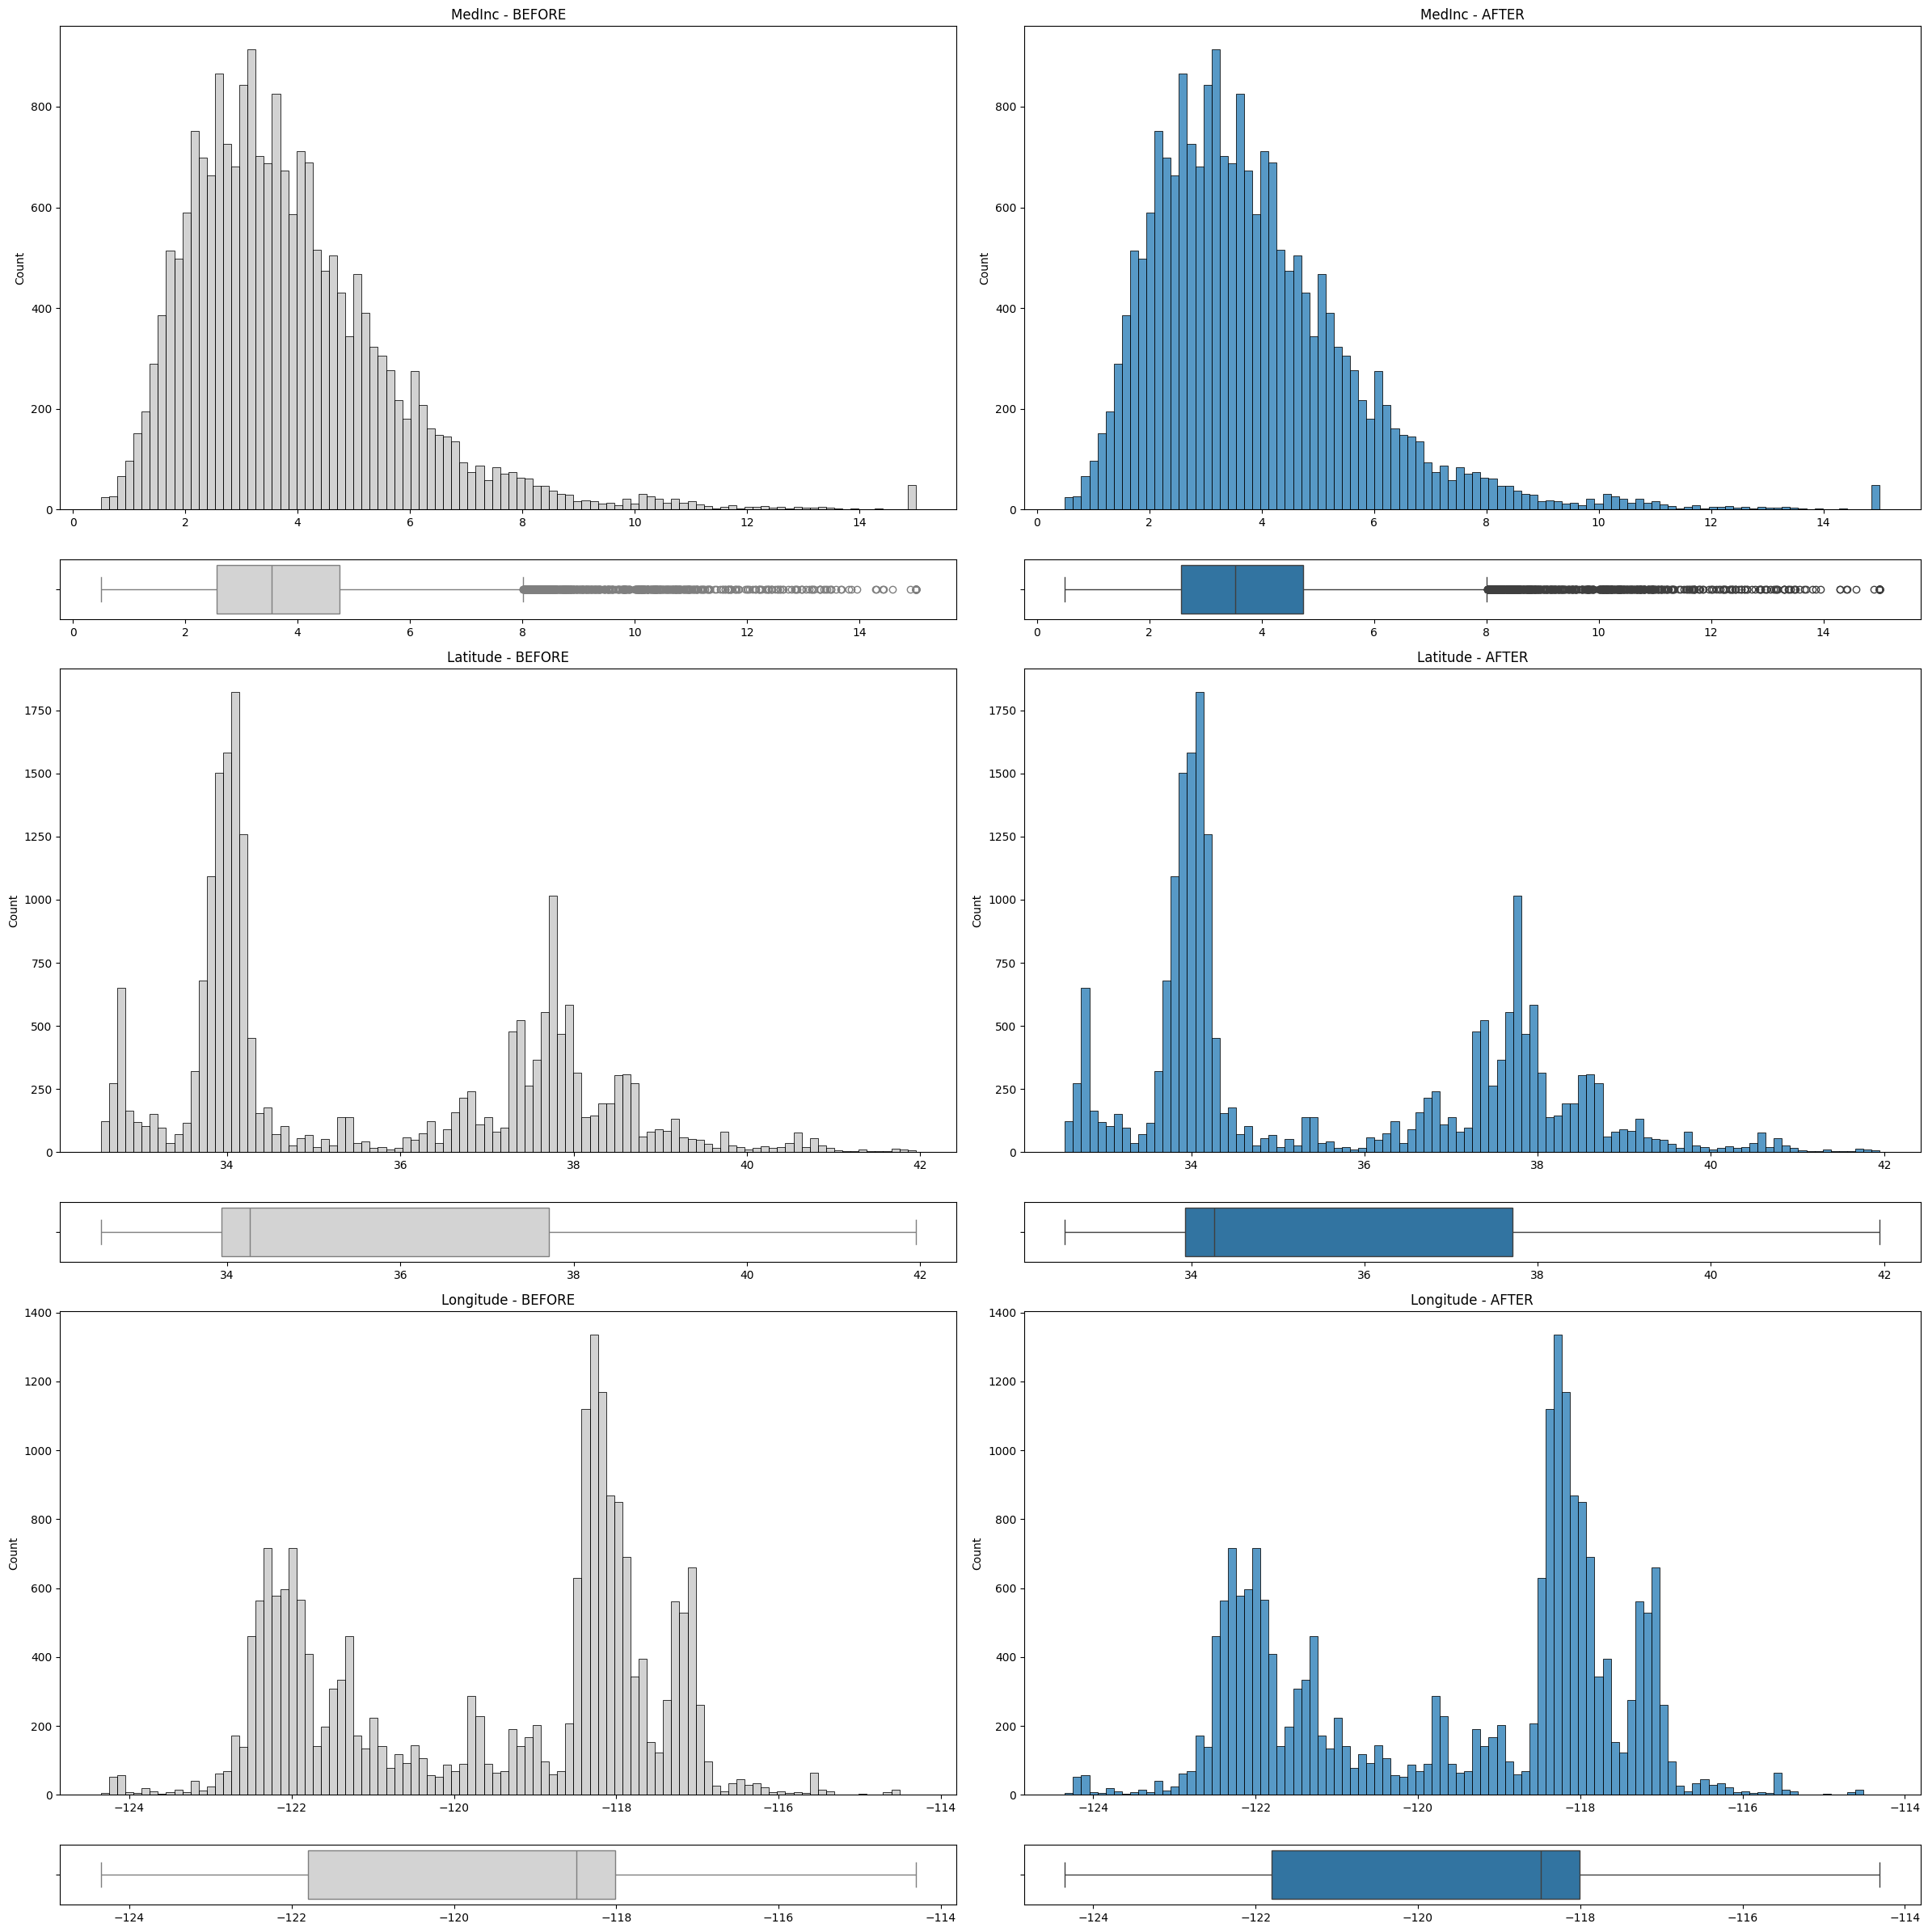

In [97]:
# ===============================
# PREVIOUS STEP DATA
# ===============================
df_S7 = df_S6.copy()
main_text_col_S7 = main_text_col_S6 if dataset_type == "NLP" else None

# ===============================
# STEP TITLE
# ===============================
print("===============================")
if dataset_type == "NLP":
    print("STEP 7) TEXT LEMMATIZATION - ",learning_type, dataset_type)
if dataset_type == "TIME-SERIES":
    print("STEP 7 - MISSING VALUES - ",learning_type, dataset_type)
if dataset_type == "TABULAR":
    print("STEP 7 - MISSING VALUES - ",learning_type, dataset_type)
print("===============================\n")

# ===============================
# NLP DATASET
# ===============================
if dataset_type == "NLP":
    # Remove missing values from target variable
    if supervised_learning:
        missing_y = df_S7[y_var].isnull().sum()
        if missing_y > 0:
            log(f"Target variable '{y_var}' contains {missing_y} missing values → rows will be dropped", type="WARNING")
            df_S7 = df_S7.dropna(subset=[y_var])
        else:
            log(f"Target variable '{y_var}' has no missing values", type="SUCCESS")
    else:
        log("UNSUPERVISED MODE → No target-variable cleaning applied", type="INFO")
    # Apply lemmatization to each list of tokens
    df_S7[main_text_col_S7] = df_S7[main_text_col_S7].apply(
        lambda token_list: lemmatize_tokens(
            token_list,
            apply_stopword_removal=apply_stopword_removal,
            stopword_language=stopword_language,
            case_sensitive_stopwords=case_sensitive_stopwords,
            apply_pos_tagging=apply_pos_tagging,
            exclude_digits=exclude_digits,
            min_word_length=min_word_length))
    log("Lemmatization completed successfully:", type="SUCCESS")
    log(f"Processed column: '{main_text_col_S7}'", type="INFO")
    display(df_S7.head(10))
    # ---------------------------
    # WordCloud plotting
    # ---------------------------
    # Build full text corpus
    all_words = []
    for row in df_S7[main_text_col_S7]:
        for tok in row:
            all_words.append(tok)
    if len(all_words) == 0:
        log("WordCloud skipped: no tokens available after preprocessing", type="WARNING")
    else:
        text_for_wc = " ".join(all_words)
        # Load mask
        wordcloud_mask = np.array(Image.open(mask_path))
        # Generate WordCloud
        wordcloud = WordCloud(
            width = figWidth_unit*500,
            height = figHeight_unit*500,
            mask = wordcloud_mask,
            colormap = "viridis",
            background_color = "black",
            mode = "RGBA",
            max_words = 1000,
            random_state = random_seed
        ).generate(text_for_wc)
        # Plot with grayscale recoloring
        fig = plt.figure(figsize=(figWidth_unit*2, figHeight_unit*2), facecolor="black")
        # Inline grayscale color function
        grey_lambda = lambda *args, **kwargs: "hsl(0, 0%%, %d%%)" % random.randint(60, 100)
        plt.imshow(wordcloud.recolor(color_func=grey_lambda, random_state=random_seed), interpolation="bilinear")
        plt.show()

# ===============================
# TIME-SERIES DATASET
# ===============================      
elif dataset_type == "TIME-SERIES":
    # Remove missing values from target variable
    if supervised_learning:
        missing_y = df_S7[y_var].isnull().sum()
        if missing_y > 0:
            log(f"Target variable '{y_var}' contains {missing_y} missing values → rows will be dropped", type="WARNING")
            df_S7 = df_S7.dropna(subset=[y_var])
        else:
            log(f"Target variable '{y_var}' has no missing values", type="SUCCESS")
    else:
        log("UNSUPERVISED MODE → No target-variable cleaning applied", type="INFO")
    # Print results
    log(f"Previous df's rows: {len(df_S6)}", type="INFO")
    log(f"Current df's rows: {len(df_S7)}", type="INFO")
    log(f"Current df's shape: {df_S7.shape}", type="INFO")
    log(f"Remaining missing values per column:\n{df_S7.isnull().sum()}", type="INFO")

# ===============================
# TABULAR DATASET
# ===============================
elif dataset_type == "TABULAR":
    # Remove missing values from target variable
    if supervised_learning:
        missing_y = df_S7[y_var].isnull().sum()
        if missing_y > 0:
            log(f"Target variable '{y_var}' contains {missing_y} missing values → rows will be dropped", type="WARNING")
            df_S7 = df_S7.dropna(subset=[y_var])
        else:
            log(f"Target variable '{y_var}' has no missing values", type="SUCCESS")
    else:
        log("UNSUPERVISED MODE → no target-variable cleaning applied", type="INFO")
    # Replace zeros by NaN for selected columns
    for col in zero_to_nan:
        if col in df_S7.columns:
            df_S7[col] = df_S7[col].replace(0, np.nan)
            log(f"Values equal to 0 in '{col}' have been replaced by NaN", type="WARNING")
    # Identify categorical variables usable as grouping keys for numeric imputation
    group_vars = []
    if supervised_learning:
        # Normal categorical attributes
        for col in category_att:
            if df_S7[col].nunique() <= grouping_max_unique:
                group_vars.append(col)
        # Add target as grouping variable if it is CATEGORICAL and has few unique values
        if y_var_type == "CATEGORIC":
            if df_S7[y_var].nunique() <= grouping_max_unique:
                group_vars.append(y_var)
                log(f"Target variable '{y_var}' added to grouping keys for numeric imputation", type="INFO")
    else:
        # Unsupervised → only attribute-based grouping
        for col in category_att:
            if df_S7[col].nunique() <= grouping_max_unique:
                group_vars.append(col)
    # Calculate missing percentages per column
    missing_pct = (df_S7.isnull().sum() / len(df_S7)) * 100
    missing_pct = missing_pct[missing_pct > 0].sort_values(ascending=False)
    if len(missing_pct) == 0:
        log("DataFrame has no missing values at all (excluding target variable already handled)", type="SUCCESS")
    else:
        # Process each column with missing values
        for col in missing_pct.index:
            pct = missing_pct[col]
            log(f"Column: {col} → {pct:.2f}% missing", type="WARNING")
            # CASE 1: NUMERIC ATTRIBUTE
            if col in numeric_att:
                # CASE 1A: grouped median
                if pct > filling_threshold and len(group_vars) > 0:
                    medians = df_S7.groupby(group_vars)[col].median().reset_index()
                    medians = medians.rename(columns={col: f"median_{col}"})
                    df_S7 = pd.merge(df_S7, medians, on=group_vars, how="left")
                    df_S7[col] = df_S7[col].fillna(df_S7[f"median_{col}"])
                    df_S7 = df_S7.drop(columns=[f"median_{col}"])
                    log(f"FILLED missing numeric values in {col} using grouped median by {group_vars}", level=2, type="WARNING")
                # CASE 1B: global median
                elif pct > filling_threshold and len(group_vars) == 0:
                    df_S7[col] = df_S7[col].fillna(df_S7[col].median())
                    log(f"FILLED missing numeric values in {col} using global median (no grouping columns)", level=2, type="WARNING")
                # CASE 1C: drop rows
                elif pct <= filling_threshold:
                    df_S7 = df_S7.dropna(subset=[col])
                    log(f"DROPPED rows with missing values in {col} ({pct:.2f}% ≤ {filling_threshold}%)", level=2, type="WARNING")
            # CASE 2: CATEGORICAL ATTRIBUTE → mode imputation
            elif col in category_att:
                mode_value = df_S7[col].mode().iloc[0]
                df_S7[col] = df_S7[col].fillna(mode_value)
                log(f"FILLED missing categorical values in {col} using mode (most frequent value)", level=2, type="WARNING")
            # CASE 3: unsupported
            else:
                df_S7 = df_S7.dropna(subset=[col])
                log(f"DROPPED rows for missing values in {col} because it has unsupported type for imputation", level=2, type="INFO")
    # Print results
    log(f"Previous df's rows: {len(df_S6)}", type="INFO")
    log(f"Current df's rows: {len(df_S7)}", type="INFO")
    log(f"Current df's shape: {df_S7.shape}", type="INFO")
    log(f"Remaining missing values per column:\n{df_S7.isnull().sum()}", type="INFO")
    if make_missing_values_plots:
        # BEFORE vs AFTER missing values handling
        print("\n📊 VISUAL CHECK - BEFORE vs AFTER missing values handling")
        df_S7_before = df_S6.copy()   # Before missing-value handling
        df_S7_after = df_S7.copy()    # After missing-value handling
        if not numeric_att:
            log("This type of plot is non applicable because there are not NUMERIC variables in the DataFrame", type="WARNING")
        else:
            # Set plotting variables
            var_to_plot = numeric_att.copy()
            if y_var_type == "NUMERIC" and y_var not in var_to_plot:
                var_to_plot.insert(0, y_var)
            # Figure
            num_cols = 2
            num_rows = len(var_to_plot)
            fig, axes = plt.subplots(nrows = num_rows * 2, ncols = num_cols, figsize = (figWidth_unit * num_cols, figHeight_unit * num_rows), gridspec_kw={'height_ratios': [4, 0.5] * num_rows})
            for i, colname in enumerate(var_to_plot):
                # Row indices for histogram and boxplot of this variable
                hist_row  = i * 2
                box_row   = i * 2 + 1
                # Common bins (syncronize BEFORE and AFTER)
                xmin = min(df_S7_before[colname].min(), df_S7_after[colname].min())
                xmax = max(df_S7_before[colname].max(), df_S7_after[colname].max())
                common_bins = np.linspace(xmin, xmax, num_bins + 1)
                # ================
                # BEFORE PLOTS
                # ================
                before_hist_ax = axes[hist_row, 0]
                before_box_ax  = axes[box_row, 0]
                sns.histplot(ax = before_hist_ax, data = df_S7_before, x = colname, bins = num_bins, color = "gray", alpha = 0.35)
                before_hist_ax.set_title(colname + " - BEFORE")
                before_hist_ax.set_xlabel("")
                sns.boxplot(ax = before_box_ax, data = df_S7_before, x = colname, color = "lightgray")
                before_box_ax.set_xlabel("")
                # Store BEFORE axis limits
                xlim_hist_before = before_hist_ax.get_xlim()
                ylim_hist_before = before_hist_ax.get_ylim()
                xlim_box_before  = before_box_ax.get_xlim()
                # ================
                # AFTER PLOTS
                # ================
                after_hist_ax = axes[hist_row, 1]
                after_box_ax  = axes[box_row, 1]
                sns.histplot( ax = after_hist_ax, data = df_S7_after, x = colname, bins = common_bins)
                after_hist_ax.set_title(colname + " - AFTER")
                after_hist_ax.set_xlabel("")
                sns.boxplot(ax = after_box_ax, data = df_S7_after, x = colname)
                after_box_ax.set_xlabel("")
                # Syncronize axes limits
                after_hist_ax.set_xlim(xlim_hist_before)
                after_hist_ax.set_ylim(ylim_hist_before)
                after_box_ax.set_xlim(xlim_box_before)
            plt.tight_layout()
            plt.show()

## STEP 8

#### <span style="color:orange">Inputs for TABULAR (SUPERVISED or UNSUPERVISED)</span>

In [98]:
removal_type = "EXTREME OUTLIERS"   # Removal logic type (NORMAL or EXTREME outliers)
low_outliers_threshold = 2        # [%] Max percentage of lower outliers allowed to remove
up_outliers_threshold = 2         # [% ]Max percentage of upper outliers allowed to remove
make_outliers_plots = True          # Make plots?

STEP 8 - CLEAN OUTLIERS -  UNSUPERVISED TABULAR



MedInc      Latitude     Longitude
count  20635.000000  20635.000000  20635.000000
mean       3.869106     35.632048   -119.569854
std        1.895274      2.136036      2.003666
min        0.499900     32.540000   -124.350000
25%        2.563100     33.930000   -121.800000
50%        3.534700     34.260000   -118.490000
75%        4.742600     37.710000   -118.010000
max       15.000100     41.950000   -114.310000

MedInc  Latitude  Longitude
lower_limit          -0.70615     28.26   -127.485
upper_limit           8.01185     43.38   -112.325
n_outliers_lower      0.00000      0.00      0.000
n_outliers_upper    678.00000      0.00      0.000
pct_outliers_lower    0.00000      0.00      0.000
pct_outliers_upper    3.28568      0.00      0.000

MedInc  Latitude  Longitude
extreme_lower_limit          -3.975400     22.59    -133.17
extreme_upper_limit          11.281100     49.05    -106.64
n_extreme_outliers_lower      0.000000      0.00       0.00
n_extreme_outliers_upper    137.000000      0.00       0.00
pct_extreme_outliers_lower    0.000000      0.00       0.00
pct_extreme_outliers_upper    0.663921      0.00       0.00



• ℹ️ Attribute 'MedInc':
   - ℹ️ None extreme lower outliers detected
   - ⚠️ REMOVED extreme upper outliers (0.66% <= 2%)


• ℹ️ Attribute 'Latitude':
   - ℹ️ None extreme lower outliers detected
   - ℹ️ None extreme upper outliers detected


• ℹ️ Attribute 'Longitude':
   - ℹ️ None extreme lower outliers detected
   - ℹ️ None extreme upper outliers detected
• ✅ Outliers have been handled successfully:
   - ℹ️ Previous df's rows: 20635
   - ℹ️ Current df's rows: 20498
   - ℹ️ Current DataFrame shape: (20498, 3)


MedInc      Latitude     Longitude
count  20498.000000  20498.000000  20498.000000
mean       3.805194     35.633760   -119.568347
std        1.728756      2.138126      2.003972
min        0.499900     32.540000   -124.350000
25%        2.558800     33.930000   -121.790000
50%        3.522900     34.260000   -118.500000
75%        4.712375     37.720000   -118.000000
max       11.246300     41.950000   -114.310000


📊 VISUAL CHECK - BEFORE vs AFTER outliers handling


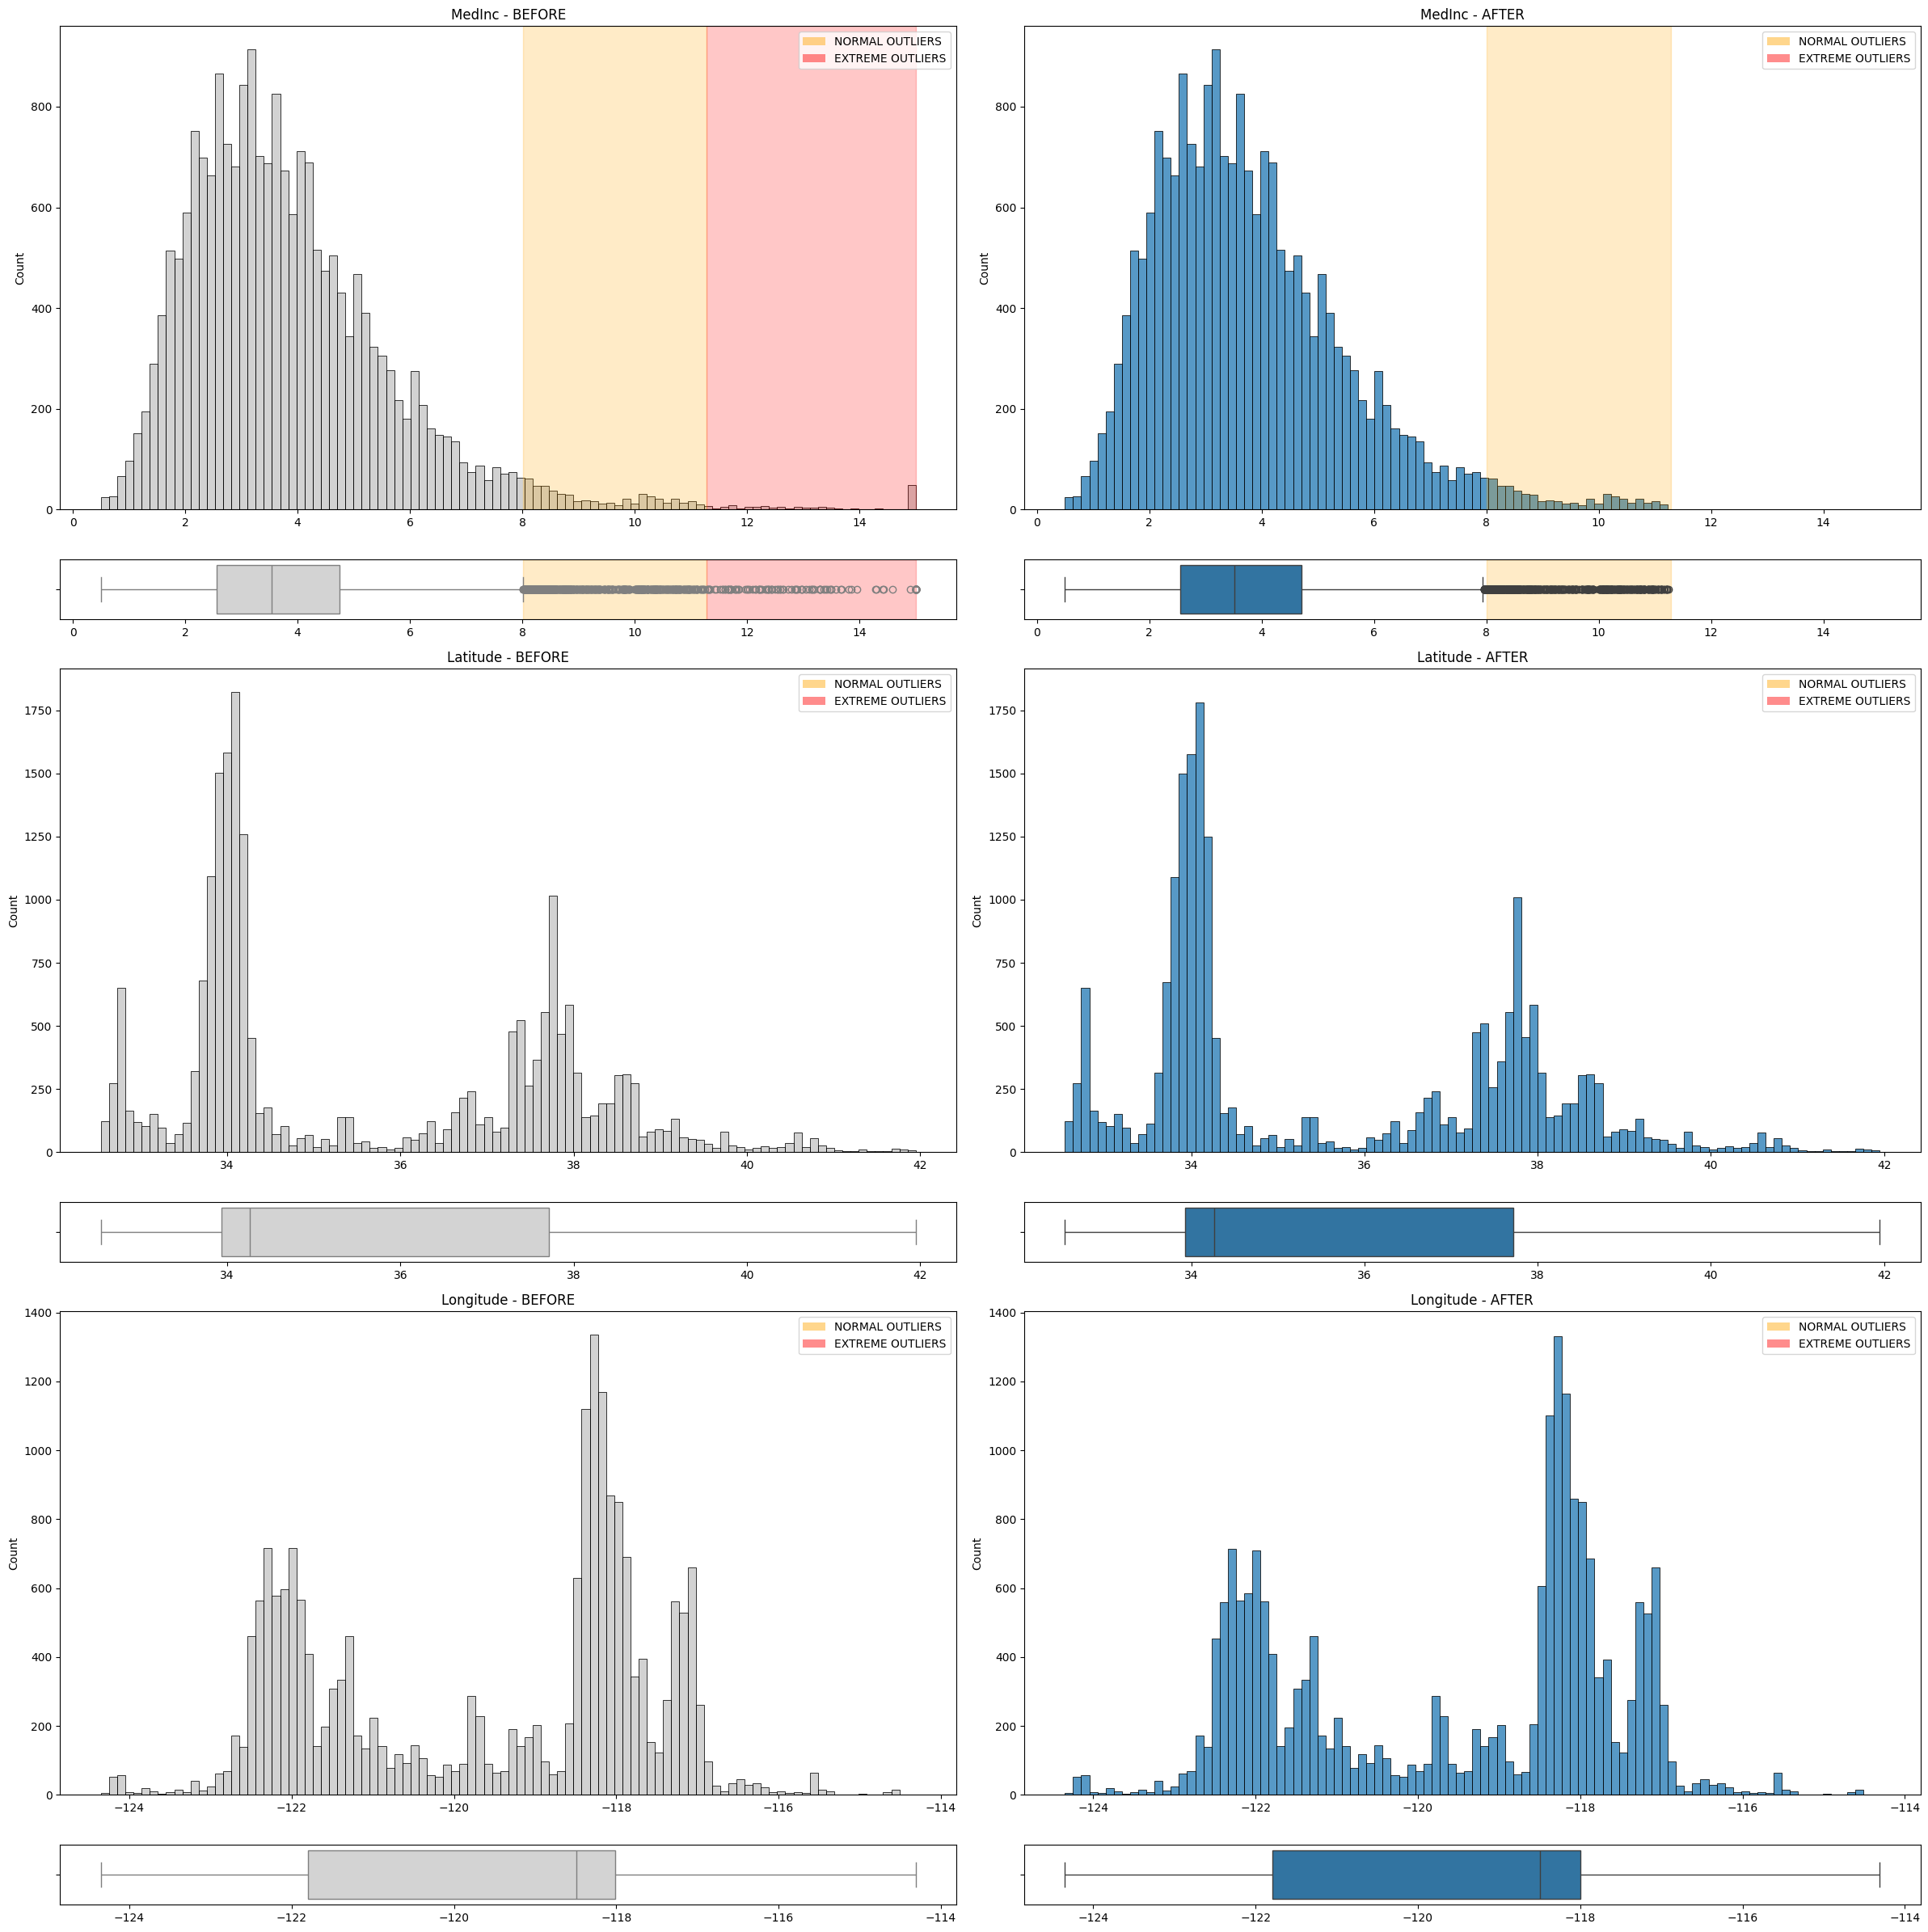

In [99]:
# ===============================
# PREVIOUS STEP DATA
# ===============================
df_S8 = df_S7.copy()

# ===============================
# STEP TITLE
# ===============================
print("===============================")
if dataset_type == "NLP":
    print("STEP 8 - Non applicable - ",learning_type, dataset_type)
if dataset_type == "TIME-SERIES":
    print("STEP 8 - Non applicable - ",learning_type, dataset_type)
if dataset_type == "TABULAR":
    print("STEP 8 - CLEAN OUTLIERS - ",learning_type, dataset_type)
print("===============================\n")

# ===============================
# NLP and TIME-SERIES DATASET
# ===============================
if dataset_type == "NLP" or dataset_type == "TIME-SERIES":
    log(f"This step is non-applicable for {dataset_type} datasets", type="WARNING")

# ===============================
# TABULAR DATASET
# ===============================
elif dataset_type == "TABULAR":
    # Print info
    display(df_S8.describe())
    # Outliers detection is applied over numeric attributes
    cols = []
    for col in numeric_att:
        if col in df_S8.columns.to_list():
            cols.append(col)
    # Initialize containers
    lower_limits = []
    upper_limits = []
    n_outliers_lower = []
    n_outliers_upper = []
    pct_outliers_lower = []
    pct_outliers_upper = []
    extreme_lower_limits = []
    extreme_upper_limits = []
    n_extreme_outliers_lower = []
    n_extreme_outliers_upper = []
    pct_extreme_outliers_lower = []
    pct_extreme_outliers_upper = []
    for col in cols:
        Q1 = df_S8[col].quantile(0.25)
        Q3 = df_S8[col].quantile(0.75)
        IQR = Q3 - Q1
        # Calulate limits
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        extreme_lower = Q1 - 3 * IQR
        extreme_upper = Q3 + 3 * IQR
        # Count num of outliers
        n_low = (df_S8[col] < lower).sum()
        n_high = (df_S8[col] > upper).sum()
        n_extreme_low = (df_S8[col] < extreme_lower).sum()
        n_extreme_high = (df_S8[col] > extreme_upper).sum()
        # Percentages of outliers
        pct_low = (n_low / len(df_S8.index)) * 100
        pct_high = (n_high / len(df_S8.index)) * 100
        pct_extreme_low = (n_extreme_low / len(df_S8.index)) * 100
        pct_extreme_high = (n_extreme_high / len(df_S8.index)) * 100
        # Save limits
        lower_limits.append(lower)
        upper_limits.append(upper)
        extreme_lower_limits.append(extreme_lower)
        extreme_upper_limits.append(extreme_upper)
        # Save num of outliers
        n_outliers_lower.append(n_low)
        n_outliers_upper.append(n_high)
        n_extreme_outliers_lower.append(n_extreme_low)
        n_extreme_outliers_upper.append(n_extreme_high)
        # Save percentages of outliers
        pct_outliers_lower.append(pct_low)
        pct_outliers_upper.append(pct_high)
        pct_extreme_outliers_lower.append(pct_extreme_low)
        pct_extreme_outliers_upper.append(pct_extreme_high)
    # Build DataFrame with all results
    df_limits = pd.DataFrame([
        lower_limits, upper_limits, n_outliers_lower, n_outliers_upper, pct_outliers_lower, pct_outliers_upper],
        columns=cols,
        index=["lower_limit", "upper_limit", "n_outliers_lower", "n_outliers_upper", "pct_outliers_lower", "pct_outliers_upper"])
    df_extreme_limits = pd.DataFrame([
        extreme_lower_limits, extreme_upper_limits, n_extreme_outliers_lower, n_extreme_outliers_upper, pct_extreme_outliers_lower, pct_extreme_outliers_upper],
        columns=cols,
        index=["extreme_lower_limit", "extreme_upper_limit", "n_extreme_outliers_lower", "n_extreme_outliers_upper", "pct_extreme_outliers_lower", "pct_extreme_outliers_upper"])
    # Display results
    display(df_limits)
    display(df_extreme_limits)
    # Outliers detection is applied over numeric attributes
    cols = []
    for col in numeric_att:
        if col in df_S8.columns.to_list():
            cols.append(col)
    if removal_type == "NORMAL OUTLIERS":
        # Loop through each column and apply filtering rules
        for col in cols:
            low_limit = df_limits.loc["lower_limit", col]
            high_limit = df_limits.loc["upper_limit", col]
            pct_low = df_limits.loc["pct_outliers_lower", col]
            pct_high = df_limits.loc["pct_outliers_upper", col]
            # Remove low outliers if below threshold
            print("\n")
            log(f"Attribute '{col}':", type="INFO")
            if pct_low == 0:
                log("None lower outliers detected", level=2, type="INFO")
            elif pct_low <= low_outliers_threshold:
                df_S8 = df_S8[df_S8[col] >= low_limit]
                log(f"REMOVED lower outliers ({pct_low:.2f}% <= {low_outliers_threshold}%)", level=2, type="WARNING")
            else:
                log(f"KEPT lower outliers ({pct_low:.2f}% > {low_outliers_threshold}%)", level=2, type="SUCCESS")
            # Remove high outliers if below threshold
            if pct_high == 0:
                log("None upper outliers detected", level=2, type="INFO")
            elif pct_high <= up_outliers_threshold:
                df_S8 = df_S8[df_S8[col] <= high_limit]
                log(f"REMOVED upper outliers ({pct_high:.2f}% <= {up_outliers_threshold}%)", level=2, type="WARNING")
            else:
                log(f"KEPT upper outliers ({pct_high:.2f}% > {up_outliers_threshold}%)", level=2, type="SUCCESS")
    elif removal_type == "EXTREME OUTLIERS":
        # Loop through each column and apply filtering rules
        for col in cols:
            low_limit = df_extreme_limits.loc["extreme_lower_limit", col]
            high_limit = df_extreme_limits.loc["extreme_upper_limit", col]
            pct_low = df_extreme_limits.loc["pct_extreme_outliers_lower", col]
            pct_high = df_extreme_limits.loc["pct_extreme_outliers_upper", col]
            # Remove low outliers if below threshold
            print("\n")
            log(f"Attribute '{col}':", type="INFO")
            if pct_low == 0:
                log("None extreme lower outliers detected", level=2, type="INFO")
            elif pct_low <= low_outliers_threshold:
                df_S8 = df_S8[df_S8[col] >= low_limit]
                log(f"REMOVED extreme lower outliers ({pct_low:.2f}% <= {low_outliers_threshold}%)", level=2, type="WARNING")
            else:
                log(f"KEPT extreme lower outliers ({pct_low:.2f}% > {low_outliers_threshold}%)", level=2, type="SUCCESS")
            # Remove high outliers if below threshold
            if pct_high == 0:
                log("None extreme upper outliers detected", level=2, type="INFO")
            elif pct_high <= up_outliers_threshold:
                df_S8 = df_S8[df_S8[col] <= high_limit]
                log(f"REMOVED extreme upper outliers ({pct_high:.2f}% <= {up_outliers_threshold}%)", level=2, type="WARNING")
            else:
                log(f"KEPT extreme upper outliers ({pct_high:.2f}% > {up_outliers_threshold}%)", level=2, type="SUCCESS")
    # Print results
    log("Outliers have been handled successfully:", type="SUCCESS")
    log(f"Previous df's rows: {len(df_S7)}", level=2, type="INFO")
    log(f"Current df's rows: {len(df_S8)}", level=2, type="INFO")
    log(f"Current DataFrame shape: {df_S8.shape}", level=2, type="INFO")
    display(df_S8.describe())
    if make_outliers_plots:
        # BEFORE vs AFTER Outliers handling
        print("\n📊 VISUAL CHECK - BEFORE vs AFTER outliers handling")
        df_S8_before = df_S7.copy()   # Before missing-value handling
        df_S8_after = df_S8.copy()    # After missing-value handling
        if not numeric_att:
            log("This type of plot is non applicable because there are not NUMERIC variables in the DataFrame", type="WARNING")
        else:
            # Set plotting variables
            var_to_plot = numeric_att
            # Figure
            num_cols = 2
            num_rows = len(var_to_plot)
            fig, axes = plt.subplots(nrows = num_rows * 2, ncols = num_cols, figsize = (figWidth_unit * num_cols, figHeight_unit * num_rows), gridspec_kw={'height_ratios': [4, 0.5] * num_rows})
            for i, colname in enumerate(var_to_plot):
                # Row indices for histogram and boxplot of this variable
                hist_row  = i * 2
                box_row   = i * 2 + 1
                # Set common bins (syncronize BEFORE and AFTER)
                xmin = min(df_S8_before[colname].min(), df_S8_after[colname].min())
                xmax = max(df_S8_before[colname].max(), df_S8_after[colname].max())
                common_bins = np.linspace(xmin, xmax, num_bins + 1)
                # Set colored area limits
                normal_low = df_limits.loc["lower_limit", colname]
                normal_up  = df_limits.loc["upper_limit", colname]
                extreme_low = df_extreme_limits.loc["extreme_lower_limit", colname]
                extreme_up  = df_extreme_limits.loc["extreme_upper_limit", colname]
                # ================
                # BEFORE PLOTS
                # ================
                before_hist_ax = axes[hist_row, 0]
                before_box_ax  = axes[box_row, 0]
                sns.histplot(ax = before_hist_ax, data = df_S8_before, x = colname, bins = num_bins, color = "gray", alpha = 0.35)
                before_hist_ax.set_title(colname + " - BEFORE")
                before_hist_ax.set_xlabel("")
                sns.boxplot(ax = before_box_ax, data = df_S8_before, x = colname, color = "lightgray")
                before_box_ax.set_xlabel("")
                # Outlier count
                pct_low_normal  = df_limits.loc["pct_outliers_lower", colname]
                pct_high_normal = df_limits.loc["pct_outliers_upper", colname]
                pct_low_extreme  = df_extreme_limits.loc["pct_extreme_outliers_lower", colname]
                pct_high_extreme = df_extreme_limits.loc["pct_extreme_outliers_upper", colname]
                # NORMAL Outliers
                if pct_low_normal > 0:
                    before_hist_ax.axvspan(normal_low, extreme_low, color="orange", alpha=0.22)
                    before_box_ax.axvspan(normal_low, extreme_low, color="orange", alpha=0.22)
                if pct_high_normal > 0:
                    before_hist_ax.axvspan(extreme_up, normal_up, color="orange", alpha=0.22)
                    before_box_ax.axvspan(extreme_up, normal_up, color="orange", alpha=0.22)
                # EXTREME Outliers
                if pct_low_extreme > 0:
                    before_hist_ax.axvspan(xmin, extreme_low, color="red", alpha=0.22)
                    before_box_ax.axvspan(xmin, extreme_low, color="red", alpha=0.22)
                if pct_high_extreme > 0:
                    before_hist_ax.axvspan(extreme_up, xmax, color="red", alpha=0.22)
                    before_box_ax.axvspan(extreme_up, xmax, color="red", alpha=0.22)
                # Store BEFORE limits
                xlim_hist_before = before_hist_ax.get_xlim()
                ylim_hist_before = before_hist_ax.get_ylim()
                xlim_box_before  = before_box_ax.get_xlim()
                # ================
                # AFTER PLOTS
                # ================
                after_hist_ax = axes[hist_row, 1]
                after_box_ax  = axes[box_row, 1]
                sns.histplot(ax = after_hist_ax, data = df_S8_after, x = colname, bins = common_bins)
                after_hist_ax.set_title(colname + " - AFTER")
                after_hist_ax.set_xlabel("")
                sns.boxplot(ax = after_box_ax, data = df_S8_after, x = colname)
                after_box_ax.set_xlabel("")
                # Check if outliers are still present in AFTER
                normal_low_present  = (df_S8_after[colname] < normal_low).any()
                normal_up_present   = (df_S8_after[colname] > normal_up).any()
                extreme_low_present = (df_S8_after[colname] < extreme_low).any()
                extreme_up_present  = (df_S8_after[colname] > extreme_up).any()
                # NORMAL Outliers
                if normal_low_present:
                    after_hist_ax.axvspan(normal_low, extreme_low, color="orange", alpha=0.22)
                    after_box_ax.axvspan(normal_low, extreme_low, color="orange", alpha=0.22)
                if normal_up_present:
                    after_hist_ax.axvspan(extreme_up, normal_up, color="orange", alpha=0.22)
                    after_box_ax.axvspan(extreme_up, normal_up, color="orange", alpha=0.22)
                # EXTREME Outliers
                if extreme_low_present:
                    after_hist_ax.axvspan(xmin, extreme_low, color="red", alpha=0.22)
                    after_box_ax.axvspan(xmin, extreme_low, color="red", alpha=0.22)
                if extreme_up_present:
                    after_hist_ax.axvspan(extreme_up, xmax, color="red", alpha=0.22)
                    after_box_ax.axvspan(extreme_up, xmax, color="red", alpha=0.22)
                # Legends
                before_hist_ax.legend(
                    handles=[
                        plt.Rectangle((0,0),1,1, facecolor='orange', alpha=0.45, label="NORMAL OUTLIERS"),
                        plt.Rectangle((0,0),1,1, facecolor='red', alpha=0.45, label="EXTREME OUTLIERS")],
                    loc="upper right")
                after_hist_ax.legend(
                    handles=[
                        plt.Rectangle((0,0),1,1, facecolor='orange', alpha=0.45, label="NORMAL OUTLIERS"),
                        plt.Rectangle((0,0),1,1, facecolor='red', alpha=0.45, label="EXTREME OUTLIERS")],
                    loc="upper right")
                # Syncronize axes limits
                after_hist_ax.set_xlim(xlim_hist_before)
                after_hist_ax.set_ylim(ylim_hist_before)
                after_box_ax.set_xlim(xlim_box_before)
            plt.tight_layout()
            plt.show()

## STEP 9

#### <span style="color:orange">Inputs for TABULAR (SUPERVISED or UNSUPERVISED)</span>

In [100]:
corr_threshold = 0.95 # Correlation level considered as "too high"

In [101]:
# ===============================
# PREVIOUS STEP DATA
# ===============================
df_S9 = df_S8.copy()

# ===============================
# STEP TITLE
# ===============================
print("===============================")
if dataset_type == "NLP":
    print("STEP 9 - Non applicable - ",learning_type, dataset_type)
if dataset_type == "TIME-SERIES":
    print("STEP 9 - Non applicable - ",learning_type, dataset_type)
if dataset_type == "TABULAR":
    print("STEP 9 - REMOVE NOISY ATTRIBUTES - ",learning_type, dataset_type)
print("===============================\n")

# ===============================
# NLP and TIME-SERIES DATASET
# ===============================
if dataset_type == "NLP" or dataset_type == "TIME-SERIES":
    log(f"This step is non-applicable for {dataset_type} datasets", type="WARNING")

# ===============================
# TABULAR DATASET
# ===============================
elif dataset_type == "TABULAR":
    #  NUMERIC ATTRIBUTES (Pearson correlation)
    corr_matrix = df_S9[numeric_att].corr().abs()
    to_drop = set()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] > corr_threshold:
                col_i = corr_matrix.columns[i]
                col_j = corr_matrix.columns[j]
                if col_i not in to_drop:
                    to_drop.add(col_i)
    if to_drop:
        df_S9 = df_S9.drop(columns=list(to_drop), axis=1)
        log(f"High NUMERIC attributes correlation detected (Pearson Corr. > {corr_threshold}). Dropped:", type="WARNING")
        for col in to_drop:
            log(f"Attribute '{col}'", level=2, type="INFO")
    else:
        log(f"No NUMERIC attributes exceeded {corr_threshold} Pearson Correlation", type="SUCCESS")
    #  CATEGORICAL ATTRIBUTES (Cramér's V)
    to_drop_cat = set()
    if len(category_att) > 1:
        for i in range(len(category_att)):
            for j in range(i):
                v = cramers_v(df_S9[category_att[i]], df_S9[category_att[j]])
                if v > corr_threshold:
                    col_i = category_att[i]
                    col_j = category_att[j]
                    if col_i not in to_drop_cat:
                        to_drop_cat.add(col_i)
    if to_drop_cat:
        df_S9 = df_S9.drop(columns=list(to_drop_cat), axis=1)
        log(f"High CATEGORICAL attributes correlation association detected (Cramer’s V > {corr_threshold}). Dropped:", type="WARNING")
        for col in to_drop_cat:
            log(f"Attribute '{col}'", level=2, type="INFO")
    else:
        log(f"No CATEGORICAL attributes exceeded {corr_threshold} Cramer’s V", type="SUCCESS")
    # Update numeric_att
    updated_numeric = []
    for col in numeric_att:
        if col in df_S9.columns:
            updated_numeric.append(col)
    numeric_att = updated_numeric
    # Update category_att
    updated_category = []
    for col in category_att:
        if col in df_S9.columns:
            updated_category.append(col)
    category_att = updated_category
    # Update binary_att
    updated_binary = []
    for col in binary_att:
        if col in df_S9.columns:
            updated_binary.append(col)
    binary_att = updated_binary
    # Update multiclass_att
    updated_multiclass = []
    for col in multiclass_att:
        if col in df_S9.columns:
            updated_multiclass.append(col)
    multiclass_att = updated_multiclass
    # Print results
    log("Noisy attributes have been handled successfully:", type="SUCCESS")
    log(f"Previous df's columns: {len(df_S8.columns)}", level=2, type="INFO")
    log(f"Current df's columns: {len(df_S9.columns)}", level=2, type="INFO")
    log(f"Current DataFrame shape: {df_S9.shape}", level=2, type="INFO")
    display(df_S9.head())

STEP 9 - REMOVE NOISY ATTRIBUTES -  UNSUPERVISED TABULAR

• ✅ No NUMERIC attributes exceeded 0.95 Pearson Correlation
• ✅ No CATEGORICAL attributes exceeded 0.95 Cramer’s V
• ✅ Noisy attributes have been handled successfully:
   - ℹ️ Previous df's columns: 3
   - ℹ️ Current df's columns: 3
   - ℹ️ Current DataFrame shape: (20498, 3)


MedInc  Latitude  Longitude
0  8.3252     37.88    -122.23
1  8.3014     37.86    -122.22
2  7.2574     37.85    -122.24
3  5.6431     37.85    -122.25
4  3.8462     37.85    -122.25

## STEP 10 - SPLIT

In [102]:
# ===============================
# PREVIOUS STEP DATA
# ===============================
df_10 = df_S9.copy()

# ===============================
# STEP TITLE
# ===============================
print("===============================")
if dataset_type == "NLP":
    print("STEP 10 - SPLIT - ",learning_type, dataset_type)
if dataset_type == "TIME-SERIES":
    print("STEP 10 - Non applicable - ",learning_type, dataset_type)
if dataset_type == "TABULAR":
    print("STEP 10 - SPLIT - ",learning_type, dataset_type)
print("===============================\n")

# ===============================
# NLP and TABULAR DATASET
# ===============================
if dataset_type == "NLP" or dataset_type == "TABULAR":
    if supervised_learning:
        # Separate attributes from target variable
        X = df_10.drop(labels = y_var, axis = 1)
        y = df_10[y_var]
        # Make split between Train and Test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_seed)
        # Print results
        log("Shape of DataFrames after SPLIT:", type="INFO")
        log(f"X_train: {X_train.shape}", level=2, custom_icon="🏋️")
        log(f"X_test: {X_test.shape}", level=2, custom_icon="🧪")
        log(f"y_train: {y_train.shape}", level=2, custom_icon="🏋️")
        log(f"y_test: {y_test.shape}", level=2, custom_icon="🧪")
        print("\n")
        log("Content of DataFrames after SPLIT:", type="INFO")
        log(f"X_train: {X_train.head(5)}", level=2, custom_icon="🏋️")
        log(f"X_test: {X_test.head(5)}", level=2, custom_icon="🧪")
        log(f"y_train: {y_train.head(5)}", level=2, custom_icon="🏋️")
        log(f"y_test: {y_test.head(5)}", level=2, custom_icon="🧪")
        print("\n")
        log("Info of DataFrames after SPLIT:", type="INFO")
        log(f"X_train: {X_train.info()}", level=2, custom_icon="🏋️")
        log(f"X_test: {X_test.info()}", level=2, custom_icon="🧪")
        log(f"y_train: {y_train.info()}", level=2, custom_icon="🏋️")
        log(f"y_test: {y_test.info()}", level=2, custom_icon="🧪")
    else:
        # In unsupervised NLP, we keep all available columns as features
        X = df_10.copy()
        # Make split between Train and Test (only X)
        X_train, X_test = train_test_split(X, test_size=test_size, random_state=random_seed)
        # Print results
        log("Shape of DataFrames after SPLIT:", type="INFO")
        log(f"X_train: {X_train.shape}", level=2, custom_icon="🏋️")
        log(f"X_test:  {X_test.shape}", level=2, custom_icon="🧪")
        print("\n")
        log("Content of DataFrames after SPLIT:", type="INFO")
        log(f"X_train:\n{X_train.head(5)}", level=2, custom_icon="🏋️")
        log(f"X_test:\n{X_test.head(5)}", level=2, custom_icon="🧪")
    
# ===============================
# TIME-SERIES DATASET
# ===============================       
elif dataset_type == "TIME-SERIES":
    log(f"This step is non-applicable for {dataset_type} datasets", type="WARNING")

STEP 10 - SPLIT -  UNSUPERVISED TABULAR

• ℹ️ Shape of DataFrames after SPLIT:
   - 🏋️ X_train: (16398, 3)
   - 🧪 X_test:  (4100, 3)


• ℹ️ Content of DataFrames after SPLIT:
   - 🏋️ X_train:
       MedInc  Latitude  Longitude
11238  3.7070     33.82    -117.96
19988  3.4231     36.20    -119.32
5190   1.8191     33.93    -118.27
5171   1.5714     33.94    -118.28
11920  2.7452     33.96    -117.42
   - 🧪 X_test:
       MedInc  Latitude  Longitude
16213  2.0398     37.96    -121.32
2470   2.4814     36.58    -119.90
1082   0.9870     39.73    -121.84
11481  4.6649     33.72    -118.04
15955  3.8583     37.71    -122.45


## STEP 11

#### <span style="color:orange">Inputs for TABULAR (SUPERVISED or UNSUPERVISED)</span>

In [103]:
make_scalling = True

In [104]:
# ===============================
# PREVIOUS STEP DATA
# ===============================
X_train_es = X_train.copy()
X_test_es  = X_test.copy()

# ===============================
# STEP TITLE
# ===============================
print("===============================")
if dataset_type == "NLP":
    print("STEP 11 - Non applicable - ",learning_type, dataset_type)
if dataset_type == "TIME-SERIES":
    print("STEP 11 - Non applicable - ",learning_type, dataset_type)
if dataset_type == "TABULAR":
    print("STEP 11 - SCALLING - ",learning_type, dataset_type)
print("===============================\n")

# ===============================
# NLP and TIME-SERIES DATASET
# ===============================
if dataset_type == "NLP" or dataset_type == "TIME-SERIES":
    log(f"This step is non-applicable for {dataset_type} datasets", type="WARNING")

# ===============================
# TABULAR DATASET
# ===============================
elif dataset_type == "TABULAR":
    # Automatic scaler decision for each numeric attribute
    scaler_dic = {}
    if not numeric_att:
        data_has_been_scaled = False
        X_train_es = X_train_es[numeric_att]
        X_test_es  = X_test_es[numeric_att]
        log("SCALLING is non applicable for this case, because there are not NUMERIC attributes in the DataFrame", type="WARNING")
    elif not make_scalling:
        data_has_been_scaled = False
        X_train_es = X_train_es[numeric_att]
        X_test_es  = X_test_es[numeric_att]
        log("SCALLING is not carried out, set make_scalling = True", type="WARNING")
        display(X_train_es.head())
    else:
        data_has_been_scaled = True
        log("Automatic scaler selection per NUMERIC attribute:", type="INFO", bold=True)
        # -------------------------------
        # 1) Decide scaler for each column
        # -------------------------------
        for col in numeric_att:
            series = X_train[col].dropna()
            col_min = series.min()
            col_max = series.max()
            col_std = series.std()
            col_skew = abs(series.skew())
            # Avoid division by zero
            range_ratio = (col_max - col_min) / max(col_std, 1e-8)
            # MinMaxScaler if variable has large range or is skewed
            if (range_ratio > 20) or (col_skew > 1.5):
                scaler_dic[col] = MinMaxScaler()
                chosen_scaler = "MinMaxScaler"
            else:
                scaler_dic[col] = StandardScaler()
                chosen_scaler = "StandardScaler"
            log(f"'{col}' → range_ratio={range_ratio:.1f}, skew={col_skew:.2f} → selected {chosen_scaler}", level=2, type="INFO")
        # -------------------------------
        # 2) Fit scalers ONLY on train data
        # -------------------------------
        for col in numeric_att:
            scaler_dic[col].fit(X_train_es[[col]])
        log("All Scalers have been trained successfully", type="SUCCESS")
        # -------------------------------
        # 3) Apply scaling, create scaled columns
        # -------------------------------
        scaled_cols = []
        for col in numeric_att:
            scaler_name = scaler_dic[col].__class__.__name__
            if scaler_name == "StandardScaler":
                suffix = "_SS"
            elif scaler_name == "MinMaxScaler":
                suffix = "_MM"
            else:
                suffix = "_Scaled"
            X_train_es[col + suffix] = scaler_dic[col].transform(X_train_es[[col]])
            X_test_es[col + suffix]  = scaler_dic[col].transform(X_test_es[[col]])
            scaled_cols.append(col + suffix)
        log("All NUMERIC attributes has been scaled successfully", type="SUCCESS")
        # -------------------------------
        # 4) Keep only scaled attributes
        # -------------------------------
        X_train_es = X_train_es[scaled_cols]
        X_test_es  = X_test_es[scaled_cols]
        print("\n")
        log("Final scaled datasets created successfully!", type="SUCCESS", bold=True)
        display(X_train_es.head())

STEP 11 - SCALLING -  UNSUPERVISED TABULAR

• ℹ️ Automatic scaler selection per NUMERIC attribute:
   - ℹ️ 'MedInc' → range_ratio=6.2, skew=1.07 → selected StandardScaler
   - ℹ️ 'Latitude' → range_ratio=4.4, skew=0.45 → selected StandardScaler
   - ℹ️ 'Longitude' → range_ratio=4.9, skew=0.28 → selected StandardScaler
• ✅ All Scalers have been trained successfully
• ✅ All NUMERIC attributes has been scaled successfully


• ✅ Final scaled datasets created successfully!


MedInc_SS  Latitude_SS  Longitude_SS
11238  -0.063635    -0.853769      0.809963
19988  -0.227674     0.257156      0.132151
5190   -1.154471    -0.802424      0.655462
5171   -1.297593    -0.797756      0.650478
11920  -0.619367    -0.788420      1.079094

## STEP 12

#### <span style="color:orange">Inputs for NLP (SUPERVISED or UNSUPERVISED)</span>

In [105]:
make_vectorization_plots = True        # Draw PCA comparison plots between COUNT and TF-IDF
max_features_manual = None             # Set a number manually, or None for auto selection
min_df_threshold = 1                   # Ignore tokens that appear in fewer than N documents
rare_word_cutoff = 3                   # Words appearing < rare_word_cutoff considered "rare"
long_text_threshold = 40               # If avg words per doc > threshold → increase vocab

#### <span style="color:orange">Inputs for TABULAR (SUPERVISED or UNSUPERVISED)</span>

In [106]:
make_encoding = True

In [107]:
# ===============================
# PREVIOUS STEP DATA
# ===============================
X_train_en = X_train.copy()
X_test_en  = X_test.copy()
if supervised_learning:
    y_train_en = y_train.copy()
else:
    y_train_en = None
main_text_col_12 = main_text_col_S7 if dataset_type == "NLP" else None

# ===============================
# STEP TITLE
# ===============================
print("===============================")
if dataset_type == "NLP":
    print("STEP 12 - TEXT VECTORIZATION - ",learning_type, dataset_type)
if dataset_type == "TIME-SERIES":
    print("STEP 12 - Non applicable - ",learning_type, dataset_type)
if dataset_type == "TABULAR":
    print("STEP 12 - ENCODING - ",learning_type, dataset_type)
print("===============================\n")

# ===============================
# NLP DATASET
# ===============================
if dataset_type == "NLP":
    # Reconstruct text from tokens
    text_series = X_train_en[main_text_col_12].apply(lambda token_list: " ".join(token_list))
    # Number of documents
    num_texts = len(text_series)
    # Build vocabulary
    vocab = set()
    for doc_tokens in X_train_en[main_text_col_12]:
        for word in doc_tokens:
            vocab.add(word)
    vocab_size = len(vocab)
    # Compute avg words per document
    word_lengths = []
    for doc_tokens in X_train_en[main_text_col_12]:
        word_lengths.append(len(doc_tokens))
    avg_words_per_text = np.mean(word_lengths)
    # Count word frequencies
    word_counts = {}
    for doc_tokens in X_train_en[main_text_col_12]:
        for word in doc_tokens:
            if word not in word_counts:
                word_counts[word] = 1
            else:
                word_counts[word] += 1
    # Identify rare words
    rare_words = []
    for word, count in word_counts.items():
        if count < rare_word_cutoff:
            rare_words.append(word)
    rare_ratio = len(rare_words) / vocab_size if vocab_size > 0 else 0.0
    log(f"Total vocabulary size: {vocab_size}", type="INFO")
    log(f"Average words per document: {avg_words_per_text:.1f}", type="INFO")
    log(f"Rare-word ratio: {rare_ratio:.2f}", type="INFO")
    # 3) Auto-determine max_features
    if max_features_manual is not None:
        max_features_auto = max_features_manual
        log(f"Using manual max_features = {max_features_manual}", type="INFO")
    else:
        # Base rule by dataset size
        if num_texts < 3000:
            max_features_auto = 2000
        elif num_texts <= 20000:
            max_features_auto = 5000
        else:
            max_features_auto = 7000
        # Ensure vocabulary is not smaller
        if vocab_size < max_features_auto:
            max_features_auto = vocab_size
        # If too many rare words, expand vocabulary allowance
        if rare_ratio > 0.50:
            max_features_auto = int(max_features_auto * 1.5)
        # If documents are long, increase vocabulary
        if avg_words_per_text > long_text_threshold:
            max_features_auto = int(max_features_auto * 1.5)
        log(f"Auto-selected max_features = {max_features_auto}", type="INFO")
    # Isntance vectorizers
    count_vec = CountVectorizer(max_features=max_features_auto, min_df=min_df_threshold)
    tfidf_vec = TfidfVectorizer(max_features=max_features_auto, min_df=min_df_threshold)
    # Fit vectorizers
    count_X = count_vec.fit_transform(text_series).toarray()
    tfidf_X = tfidf_vec.fit_transform(text_series).toarray()
    # PCA 2D Visualization
    if make_vectorization_plots:
        print("\n📊 PCA 2D VISUALIZATION")
        pca = PCA(n_components=2)
        count_2D = pca.fit_transform(count_X)
        tfidf_2D = pca.fit_transform(tfidf_X)
        # Prepare plot
        fig, axes = plt.subplots(1, 2, figsize=(figWidth_unit * 2, figHeight_unit * 1))
        # SUPERVISED → colorear por y
        if supervised_learning and (y_train_en is not None):
            classes = sorted(y_train_en.unique())
            colors = plt.cm.viridis(np.linspace(0, 1, len(classes)))
            # COUNT plot
            axes[0].scatter(count_2D[:, 0], count_2D[:, 1], c=y_train_en, cmap="viridis", alpha=0.8)
            axes[0].set_title("PCA (2D) — CountVectorizer", fontsize=plot_title_font_size)
            # Legend
            handles_count = []
            for i, cls in enumerate(classes):
                handles_count.append(
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i],
                               markersize=8, label=str(cls))
                )
            axes[0].legend(handles=handles_count, title="Target")
            # TF-IDF plot
            axes[1].scatter(tfidf_2D[:, 0], tfidf_2D[:, 1], c=y_train_en, cmap="viridis", alpha=0.8)
            axes[1].set_title("PCA (2D) — TF-IDF", fontsize=plot_title_font_size)
            handles_tfidf = []
            for i, cls in enumerate(classes):
                handles_tfidf.append(
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i],
                               markersize=8, label=str(cls))
                )
            axes[1].legend(handles=handles_tfidf, title="Target")
        else:
            axes[0].scatter(count_2D[:, 0], count_2D[:, 1], alpha=0.8)
            axes[0].set_title("PCA (2D) — CountVectorizer", fontsize=plot_title_font_size)
            axes[1].scatter(tfidf_2D[:, 0], tfidf_2D[:, 1], alpha=0.8)
            axes[1].set_title("PCA (2D) — TF-IDF", fontsize=plot_title_font_size)
        plt.tight_layout()
        plt.show()
    # Auto-select best Vectorizer
    best_vectorizer_name_S8 = "TFIDF"
    if supervised_learning and (y_train_en is not None) and y_var_subtype in ["BINARY", "MULTICLASS"]:
        try:
            score_count = silhouette_score(count_2D, y_train_en)
            score_tfidf = silhouette_score(tfidf_2D, y_train_en)
            if score_count > score_tfidf:
                best_vectorizer_name_S8 = "COUNT"
        except:
            pass
    print("\n")
    log(f"Final selected vectorizer: {best_vectorizer_name_S8}", type="SUCCESS", bold=True)
     # Instance selected vectorizer
    if best_vectorizer_name_S8 == "COUNT":
        vectorizer = CountVectorizer()
        vectorizer_name = "CountVectorizer()"
    else:
        vectorizer = TfidfVectorizer()
        vectorizer_name = "TfidfVectorizer()"
    log(f"Auto-selected Vectorizer ({best_vectorizer_name_S8}) instanced successfully", type="SUCCESS")
    # Train vectorizer wiht TRAIN data and transform TRAIN + TEST
    X_train_en = vectorizer.fit_transform(X_train_en[main_text_col_12].astype(str)).toarray()
    X_test_en = vectorizer.transform(X_test_en[main_text_col_12].astype(str)).toarray()
    # Get feature names
    feature_names = vectorizer.get_feature_names_out()
    # Convert array to DataFrame
    X_train_en = pd.DataFrame(X_train_en, index=X_train.index, columns=feature_names)
    X_test_en = pd.DataFrame(X_test_en, index=X_test.index, columns=feature_names)
    log("Final vectorized datasets created successfully", type="SUCCESS")
    display(X_train_en)

# ===============================
# TIME-SERIES DATASET
# ===============================    
elif dataset_type == "TIME-SERIES":
    log(f"This step is non-applicable for {dataset_type} datasets", type="WARNING")

# ===============================
# TABULAR DATASET
# ===============================
elif dataset_type == "TABULAR":
    if not category_att:
        X_train_en = X_train_en[category_att]
        X_test_en = X_test_en[category_att]
        log("ENCODING is non applicable for this case, because there are not CATEGORIC attributes in the DataFrame", type="WARNING")
    elif not make_encoding:
        X_train_en = X_train_en[category_att]
        X_test_en = X_test_en[category_att]
        log("ENCODING is is not carried out, set make_encoding = True", type="WARNING")
        display(X_train_en.head())
    else:
        # List of columns
        columns = X_train_en.columns.tolist()
        # Create encoder instance for each categorical attribute
        encoder_dic = {}
        for col in category_att:
            if col in binary_att:
                encoder_dic[col] = LabelEncoder()
                log(f"Encoder instanced successfully for {col}: LabelEncoder()", type="SUCCESS")
            elif col in multiclass_att:
                encoder_dic[col] = OneHotEncoder(sparse_output=False)
                log(f"Encoder instanced successfully for {col}: OneHotEncoder()", type="SUCCESS")
        # Train encoders with TRAIN data only
        for col in category_att:
            encoder = encoder_dic[col]
            if isinstance(encoder, LabelEncoder):
                encoder.fit(X_train_en[col])        # LabelEncoder needs 1D
                log(f"Encoder trained successfully with {col} from Train: LabelEncoder()", type="SUCCESS")
            elif isinstance(encoder, OneHotEncoder):
                encoder.fit(X_train_en[[col]])      # OHE needs 2D
                log(f"Encoder trained successfully with {col} from Train: OneHotEncoder()", type="SUCCESS")
        # Apply encoders to TRAIN + TEST
        for col in category_att:
            encoder = encoder_dic[col]
            if isinstance(encoder, LabelEncoder):
                X_train_en[col + "_LE"] = encoder.transform(X_train_en[col])
                X_test_en[col + "_LE"] = encoder.transform(X_test_en[col])
                log(f"Train/Test encoded for: {col} using LabelEncoder()", type="SUCCESS")
            elif isinstance(encoder, OneHotEncoder):
                # Transform train and test
                train_encoded = encoder.transform(X_train_en[[col]])
                test_encoded = encoder.transform(X_test_en[[col]])
                # New names
                ohe_colnames = encoder.get_feature_names_out([col])
                ohe_colnames = [name + "_OHE" for name in ohe_colnames]
                # Convert to DataFrames
                train_ohe_df = pd.DataFrame(train_encoded, index=X_train_en.index, columns=ohe_colnames)
                test_ohe_df = pd.DataFrame(test_encoded, index=X_test_en.index, columns=ohe_colnames)
                # Concatenate new cols
                X_train_en = pd.concat([X_train_en, train_ohe_df], axis=1)
                X_test_en = pd.concat([X_test_en, test_ohe_df], axis=1)
                log(f"Train/Test encoded for: {col} using OneHotEncoder()", type="SUCCESS")
        # Keep only encoded columns
        encoded_cols = []
        for col in category_att:
            encoder = encoder_dic[col]
            if isinstance(encoder, LabelEncoder):
                encoded_cols.append(col + "_LE")
            elif isinstance(encoder, OneHotEncoder):
                ohe_colnames = encoder.get_feature_names_out([col])
                for name in ohe_colnames:
                    encoded_cols.append(name + "_OHE")
        X_train_en = X_train_en[encoded_cols]
        X_test_en = X_test_en[encoded_cols]
        log("Final encoded datasets created successfully", type="SUCCESS")
        display(X_test_en)

STEP 12 - ENCODING -  UNSUPERVISED TABULAR

• ⚠️ ENCODING is non applicable for this case, because there are not CATEGORIC attributes in the DataFrame


## STEP 13 - ASSEMBLY

In [108]:
# ===============================
# PREVIOUS STEP DATA
# ===============================
X_train_S13 = X_train.copy()
X_test_S13 = X_test.copy()
X_train_es_S13 = X_train_es.copy()
X_test_es_S13 = X_test_es.copy()
X_train_en_S13 = X_train_en.copy()
X_test_en_S13 = X_test_en.copy()

# ===============================
# STEP TITLE
# ===============================
print("-------------------------------")
print("STEP 13 - ASSEMBLY - ",learning_type, dataset_type)
print("-------------------------------\n")

# ===============================
# NLP DATASET
# ===============================
if dataset_type == "NLP":
    # Concatenate vectorized var
    X_train_assembled_S13 = X_train_en_S13
    X_test_assembled_S13 = X_test_en_S13
    # Print results
    log(f"X_train_assembled {X_train_assembled_S13.shape}", custom_icon="🧮")
    display(X_train_assembled_S13)
    print("\n")
    log(f"X_test_assembled {X_test_assembled_S13.shape}", custom_icon="🧮")
    display(X_test_assembled_S13)

# ===============================
# TIME-SERIES DATASET
# ===============================      
elif dataset_type == "TIME-SERIES":
    # Concatenate the whole dataset how it was
    X_train_assembled_S13 = X_train_S13
    X_test_assembled_S13 = X_test_S13
    # Print results
    log(f"X_train_assembled {X_train_assembled_S13.shape}", custom_icon="🧮")
    display(X_train_assembled_S13)
    print("\n")
    log(f"X_test_assembled {X_test_assembled_S13.shape}", custom_icon="🧮")
    display(X_test_assembled_S13)

# ===============================
# TABULAR DATASET
# ===============================
elif dataset_type == "TABULAR":
    # Concatenate NUMERIC_var_scaled with CATEGORY_var_encoded
    X_train_assembled_S13 = pd.concat([X_train_es_S13, X_train_en_S13], axis=1)
    X_test_assembled_S13  = pd.concat([X_test_es_S13,  X_test_en_S13],  axis=1)
    # Print results
    log(f"X_train_assembled {X_train_assembled_S13.shape}", custom_icon="🧮")
    display(X_train_assembled_S13)
    print("\n")
    log(f"X_test_assembled {X_test_assembled_S13.shape}", custom_icon="🧮")
    display(X_test_assembled_S13)

-------------------------------
STEP 13 - ASSEMBLY -  UNSUPERVISED TABULAR
-------------------------------

• 🧮 X_train_assembled (16398, 3)


MedInc_SS  Latitude_SS  Longitude_SS
11238  -0.063635    -0.853769      0.809963
19988  -0.227674     0.257156      0.132151
5190   -1.154471    -0.802424      0.655462
5171   -1.297593    -0.797756      0.650478
11920  -0.619367    -0.788420      1.079094
...          ...          ...           ...
11379   0.700048    -0.919117      0.814947
12062   0.710275    -0.830430      0.999352
5437    1.505795    -0.765082      0.575719
865     1.046152     0.901306     -1.223472
15899  -0.020705     0.980657     -1.407877

[16398 rows x 3 columns]



• 🧮 X_test_assembled (4100, 3)


MedInc_SS  Latitude_SS  Longitude_SS
16213  -1.026950     1.078680     -0.864631
2470   -0.771792     0.434530     -0.156915
1082   -1.635262     1.904872     -1.123794
11481   0.489843    -0.900446      0.770092
15955   0.023786     0.961986     -1.427813
...          ...          ...           ...
10432  -0.289846    -1.035811      0.979416
13925  -1.218492    -0.382326      2.489541
17293   0.912448    -0.559701     -0.012382
9228   -0.702571     0.621240     -0.311417
1584    2.136006     1.022667     -1.183601

[4100 rows x 3 columns]

## STEP 14 - FEATURE SELECTION

#### <span style="color:orange">Inputs for TABULAR or NLP (SUPERVISED)</span>

In [109]:
feature_keeping_threshold = 100   # [%] Percentaje of features (tokens) to keep
min_features_for_selection = 20  # If num features < this → skip selection

#### <span style="color:orange">Inputs for TABULAR or NLP (UNSUPERVISED)</span>

In [110]:
# VarianceThreshold percentile for UNSUPERVISED feature selection
variance_threshold_percentile = 10   # Drop lowest variance_threshold_percentile % variance features

In [111]:
# ===============================
# PREVIOUS STEP DATA
# ===============================
X_train_S14 = X_train_assembled_S13.copy()
X_test_S14 = X_test_assembled_S13.copy()

# ===============================
# STEP TITLE
# ===============================
print("===============================")
if dataset_type == "NLP":
    print("STEP 14 - FEATURE SELECTION - ",learning_type, dataset_type)
if dataset_type == "TIME-SERIES":
    print("STEP 14 - Non applicable - ",learning_type, dataset_type)
if dataset_type == "TABULAR":
    print("STEP 14 - FEATURE SELECTION - ",learning_type, dataset_type)
print("===============================\n")

# ===============================
# NLP DATASET
# ===============================
if dataset_type == "NLP":
    # -------------------------------------------
    # UNSUPERVISED LEARNING → VarianceThreshold
    # -------------------------------------------
    if not supervised_learning:
        log("UNSUPERVISED feature selection using VarianceThreshold", type="INFO", bold=True)
        # Compute variances on TRAIN data only
        feature_variances = X_train_S14.var(axis=0)
        # Automatic threshold: low variance percentile
        variance_threshold_value = np.percentile(feature_variances.values, variance_threshold_percentile)
        log(f"Automatic variance threshold set to {variance_threshold_value:.6f} (percentile={variance_threshold_percentile})", type="INFO")
        # SAFETY CHECK: threshold cannot exceed max variance
        max_var = feature_variances.max()
        eps = 1e-12
        if variance_threshold_value >= max_var:
            log(f"VarianceThreshold value ({variance_threshold_value:.6f}) is >= max variance ({max_var:.6f}) → threshold will be capped", type="WARNING")
            variance_threshold_value = max(max_var - eps, 0.0)
            log(f"Final capped variance threshold: {variance_threshold_value:.6f}", type="INFO")
        # Instance selector
        variance_selector = VarianceThreshold(threshold=variance_threshold_value)
        log("VarianceThreshold selector instanced successfully", type="SUCCESS")
        try:
            # Fit selector on TRAIN only
            variance_selector.fit(X_train_S14)
            log("VarianceThreshold selector trained successfully", type="SUCCESS")
            # Apply mask
            variance_mask = variance_selector.get_support()
            variance_selected_cols = X_train_S14.columns[variance_mask]
            # Transform TRAIN and TEST
            X_train_S14 = pd.DataFrame(
                variance_selector.transform(X_train_S14),
                columns=variance_selected_cols,
                index=X_train_S14.index
            )
            X_test_S14 = pd.DataFrame(
                variance_selector.transform(X_test_S14),
                columns=variance_selected_cols,
                index=X_test_S14.index
            )
        except ValueError as e:
            log(f"VarianceThreshold skipped: {e}", type="WARNING")
            X_train_S14 = X_train_S14
            X_test_S14  = X_test_S14
            variance_selector = None
        # Print results
        log(f"Previous X_train shape: {X_train_assembled_S13.shape}", level=2, type="INFO")
        log(f"Previous X_test shape: {X_test_assembled_S13.shape}", level=2, type="INFO")
        log(f"Current X_train shape: {X_train_S14.shape}", level=2, type="INFO")
        log(f"Current X_test shape: {X_test_S14.shape}", level=2, type="INFO")
        display(X_train_S14)
    # -------------------------------------------
    # SUPERVISED LEARNING → SelectKBest
    # -------------------------------------------
    else:
        log("UNSUPERVISED feature selection using SelectKBest", type="INFO", bold=True)
        # Count features (tokens)
        num_features_nlp = X_train_S14.shape[1]
        log(f"Number of features before selection: {num_features_nlp}", type="INFO")
        # Check if feature selection makes sense
        if num_features_nlp < min_features_for_selection:
            log(f"Feature selection skipped: number of features ({num_features_nlp}) is below defined threshold ({min_features_for_selection})", type="INFO")
        else:
            # Compute number of features to keep
            num_keep_nlp = round(feature_keeping_threshold / 100 * num_features_nlp)
            num_keep_nlp = max(1, min(num_keep_nlp, num_features_nlp))
            # Select chi2 for categorical targets, f_regression for numeric
            if y_var_type == "CATEGORIC":
                score_func_nlp = chi2
                log("Used chi2 for feature selection (CATEGORIC target)", type="INFO")
                if num_keep_nlp == num_features_nlp:
                    log(f"Feature selection will keep all original {num_features_nlp} features, because keeping threshold is set as {feature_keeping_threshold} %", type="INFO")
                else:
                    log(f"Feature selection will keep {num_keep_nlp} out of {num_features_nlp} features", type="WARNING")
            else:
                score_func_nlp = f_regression
                log("Used f_regression for feature selection (NUMERIC target)", type="INFO")
                if num_keep_nlp == num_features_nlp:
                    log(f"Feature selection will keep all original {num_features_nlp} features, because keeping threshold is set as {feature_keeping_threshold} %", type="INFO")
                else:
                    log(f"Feature selection will keep {num_keep_nlp} out of {num_features_nlp} features", type="WARNING")
            # Instance selector
            selector_nlp = SelectKBest(score_func=score_func_nlp, k=num_keep_nlp)
            log("Selector has been instanced successfully", type="SUCCESS")
            # Train selector using ONLY TRAIN data
            selector_nlp.fit(X_train_S14, y_train)
            log("Selector has been trained successfully", type="SUCCESS")
            # Apply mask
            mask_nlp = selector_nlp.get_support()
            selected_cols_nlp = X_train_S14.columns[mask_nlp]
            # Transform TRAIN and TEST
            X_train_S14 = pd.DataFrame(selector_nlp.transform(X_train_S14),
                                    columns=selected_cols_nlp,
                                    index=X_train_S14.index)

            X_test_S14 = pd.DataFrame(selector_nlp.transform(X_test_S14),
                                    columns=selected_cols_nlp,
                                    index=X_test_S14.index)
            # Print results
            log(f"Previous X_train shape: {X_train_assembled_S13.shape}", level=2, type="INFO")
            log(f"Previous X_test shape: {X_test_assembled_S13.shape}", level=2, type="INFO")
            log(f"Current X_train shape: {X_train_S14.shape}", level=2, type="INFO")
            log(f"Current X_test shape: {X_test_S14.shape}", level=2, type="INFO")
            display(X_train_S14)
        
# ===============================
# TIME-SERIES DATASET
# ===============================
elif dataset_type == "TIME-SERIES":
    log(f"This step is non-applicable for {dataset_type} datasets", type="WARNING")

# ===============================
# TABULAR DATASET
# ===============================
elif dataset_type == "TABULAR":
    # -------------------------------------------
    # UNSUPERVISED LEARNING → VarianceThreshold
    # -------------------------------------------
    if not supervised_learning:
        log("UNSUPERVISED feature selection using VarianceThreshold", type="INFO", bold=True)
        # Compute variances on TRAIN data only
        feature_variances = X_train_S14.var(axis=0)
        # Automatic threshold
        variance_threshold_value = np.percentile(feature_variances.values, variance_threshold_percentile)
        log(f"Automatic variance threshold set to {variance_threshold_value:.6f} (percentile={variance_threshold_percentile})", type="INFO")
        # SAFETY CHECK: threshold cannot exceed max variance
        max_var = feature_variances.max()
        eps = 1e-12
        if variance_threshold_value >= max_var:
            log(f"VarianceThreshold value ({variance_threshold_value:.6f}) is >= max variance ({max_var:.6f}) → threshold will be capped", type="WARNING")
            variance_threshold_value = max(max_var - eps, 0.0)
            log(f"Final capped variance threshold: {variance_threshold_value:.6f}", type="INFO")
        # Instance selector
        variance_selector = VarianceThreshold(threshold=variance_threshold_value)
        log("VarianceThreshold selector instanced successfully", type="SUCCESS")
        try:
            # Fit selector on TRAIN only
            variance_selector.fit(X_train_S14)
            log("VarianceThreshold selector trained successfully", type="SUCCESS")
            # Apply mask
            variance_mask = variance_selector.get_support()
            variance_selected_cols = X_train_S14.columns[variance_mask]
            # Transform TRAIN and TEST
            X_train_S14 = pd.DataFrame(
                variance_selector.transform(X_train_S14),
                columns=variance_selected_cols,
                index=X_train_S14.index
            )
            X_test_S14 = pd.DataFrame(
                variance_selector.transform(X_test_S14),
                columns=variance_selected_cols,
                index=X_test_S14.index
            )
        except ValueError as e:
            log(f"VarianceThreshold skipped: {e}", type="WARNING")
            X_train_S14 = X_train_S14
            X_test_S14  = X_test_S14
            variance_selector = None
        # Print results
        log(f"Previous X_train shape: {X_train_assembled_S13.shape}", level=2, type="INFO")
        log(f"Previous X_test shape: {X_test_assembled_S13.shape}", level=2, type="INFO")
        log(f"Current X_train shape: {X_train_S14.shape}", level=2, type="INFO")
        log(f"Current X_test shape: {X_test_S14.shape}", level=2, type="INFO")
        display(X_train_S14)
    # -------------------------------------------
    # SUPERVISED LEARNING → SelectKBest
    # -------------------------------------------
    else:
        log("UNSUPERVISED feature selection using SelectKBest", type="INFO", bold=True)
        # Count features (tokens)
        num_features_tab = X_train_S14.shape[1]
        log(f"Number of features before selection: {num_features_tab}", type="INFO")
        # Check if feature selection makes sense
        if num_features_tab < min_features_for_selection:
            log(f"Feature selection skipped: number of features ({num_features_tab}) is below defined threshold ({min_features_for_selection})", type="INFO")
        else:
            # Compute number of features to keep
            num_keep_tab = round(feature_keeping_threshold / 100 * num_features_tab)
            num_keep_tab = max(1, min(num_keep_tab, num_features_tab))
            # Choose score function based on target type
            if y_var_type == "CATEGORIC":
                score_func_tab = f_classif
                log("Used f_classif (ANOVA F-test) for feature selection (CATEGORIC target)", type="INFO")
                if num_keep_tab == num_features_tab:
                    log(f"Feature selection will keep all original {num_features_tab} features, because keeping threshold is set as {feature_keeping_threshold} %", type="INFO")
                else:
                    log(f"Feature selection will keep {num_keep_tab} out of {num_features_tab} features", type="WARNING")
            else:
                score_func_tab = f_regression
                log("Used f_regression for feature selection (CATEGORIC target)", type="INFO")
                if num_keep_tab == num_features_tab:
                    log(f"Feature selection will keep all original {num_features_tab} features, because keeping threshold is set as {feature_keeping_threshold} %", type="INFO")
                else:
                    log(f"Feature selection will keep {num_keep_tab} out of {num_features_tab} features", type="WARNING")
            # Instance selector
            selector_tab = SelectKBest(score_func=score_func_tab, k=num_keep_tab)
            log("Selector has been instanced successfully", type="SUCCESS")
            # Train selector using ONLY TRAIN data
            selector_tab.fit(X_train_S14, y_train)
            log("Selector has been trained successfully", type="SUCCESS")
            # Apply mask
            mask_tab = selector_tab.get_support()
            selected_cols_tab = X_train_S14.columns[mask_tab]
            # Transform TRAIN and TEST
            X_train_S14 = pd.DataFrame(selector_tab.transform(X_train_S14),
                                    columns=selected_cols_tab,
                                    index=X_train_S14.index)

            X_test_S14 = pd.DataFrame(selector_tab.transform(X_test_S14),
                                    columns=selected_cols_tab,
                                    index=X_test_S14.index)
            # Print results
            log(f"Previous X_train shape: {X_train_assembled_S13.shape}", level=2, type="INFO")
            log(f"Previous X_test shape: {X_test_assembled_S13.shape}", level=2, type="INFO")
            log(f"Current X_train shape: {X_train_S14.shape}", level=2, type="INFO")
            log(f"Current X_test shape: {X_test_S14.shape}", level=2, type="INFO")
            display(X_train_S14)

STEP 14 - FEATURE SELECTION -  UNSUPERVISED TABULAR

• ℹ️ UNSUPERVISED feature selection using VarianceThreshold
• ℹ️ Automatic variance threshold set to 1.000061 (percentile=10)
• ✅ VarianceThreshold selector instanced successfully
• ⚠️ VarianceThreshold skipped: No feature in X meets the variance threshold 1.00006
   - ℹ️ Previous X_train shape: (16398, 3)
   - ℹ️ Previous X_test shape: (4100, 3)
   - ℹ️ Current X_train shape: (16398, 3)
   - ℹ️ Current X_test shape: (4100, 3)


MedInc_SS  Latitude_SS  Longitude_SS
11238  -0.063635    -0.853769      0.809963
19988  -0.227674     0.257156      0.132151
5190   -1.154471    -0.802424      0.655462
5171   -1.297593    -0.797756      0.650478
11920  -0.619367    -0.788420      1.079094
...          ...          ...           ...
11379   0.700048    -0.919117      0.814947
12062   0.710275    -0.830430      0.999352
5437    1.505795    -0.765082      0.575719
865     1.046152     0.901306     -1.223472
15899  -0.020705     0.980657     -1.407877

[16398 rows x 3 columns]

## STEP 15 - SAVE PROCESSED DATA

In [112]:
# ===============================
# PREVIOUS STEP DATA
# ===============================
X_train_S15 = X_train_S14.copy()
X_test_S15  = X_test_S14.copy()
if supervised_learning:
    y_train_S15 = y_train.copy()
    y_test_S15 = y_test.copy()
else:
    y_train_S15 = None
    y_test_S15 = None

# ===============================
# STEP TITLE
# ===============================
print("-------------------------------")
print("STEP 15) SAVE PROCESSED DATA - ",learning_type, dataset_type)
print("-------------------------------\n")

# ===============================
# BUILD FILENAMES WITH REVISION NUMBER
# ===============================
rev_number = get_revision_number(processed_data_output_path, "X_train_final")
suffix = "_" + learning_type + "_" + dataset_type + "_" + str(rev_number)
output_path_X_train = processed_data_output_path + "X_train_final" + suffix + ".csv"
output_path_X_test  = processed_data_output_path + "X_test_final"  + suffix + ".csv"
if supervised_learning:
    output_path_y_train = processed_data_output_path + "y_train_final" + suffix + ".csv"
    output_path_y_test  = processed_data_output_path + "y_test_final"  + suffix + ".csv"

# ===============================
# SAVE ALL DATASETS
# ===============================
X_train_S15.to_csv(output_path_X_train, index=False)
log(f"X_train saved in {processed_data_output_path} with revision number: {rev_number}", type="SUCCESS")
X_test_S15.to_csv(output_path_X_test, index=False)
log(f"X_test saved in {processed_data_output_path} with revision number: {rev_number}", type="SUCCESS")
if supervised_learning:
    y_train_S15.to_csv(output_path_y_train, index=False)
    log(f"y_train saved in {processed_data_output_path} with revision number: {rev_number}", type="SUCCESS")
    y_test_S15.to_csv(output_path_y_test, index=False)
    log(f"y_test saved in {processed_data_output_path} with revision number: {rev_number}", type="SUCCESS")

-------------------------------
STEP 15) SAVE PROCESSED DATA -  UNSUPERVISED TABULAR
-------------------------------

• ✅ X_train saved in ../data/processed/ with revision number: 0
• ✅ X_test saved in ../data/processed/ with revision number: 0


## STEP 16 - PREDICTION MODELS SUGGESTED

#### <span style="color:red">Inputs for TABULAR or NLP or TIME-SERIES (SUPERVISED or UNSUPERVISED)</span>

In [113]:
rev_to_use = 0   # Select the desired revision number for models/data

#### <span style="color:orange">Inputs for TABULAR or NLP (SUPERVISED or UNSUPERVISED)</span>

In [114]:
# DATASET SIZE THRESHOLDS
# --- BIG dataset thresholds ---
n_samples_BIG_dataset    = 10000      # Above this → BIG dataset (more complex models allowed, smaller grids)
n_features_BIG_dataset   = 50         # Above this → HIGH-DIMENSIONAL feature space
# --- MEDIUM dataset thresholds ---
n_samples_MEDIUM_dataset = 2000       # Between SMALL and MEDIUM → MEDIUM dataset
n_features_MEDIUM_dataset = 15        # Between LOW and MEDIUM dimensionality
# --- SMALL dataset thresholds ---
n_samples_SMALL_dataset  = 500        # Below this → SMALL dataset (simpler models recommended)
n_features_SMALL_dataset = 5          # Below this → LOW-DIMENSIONAL feature space
# --- MICRO dataset threshold (optional special-case) ---
n_samples_MICRO_dataset  = 100        # Very small datasets — may restrict to extremely simple models only

#### <span style="color:orange">Inputs for TABULAR or NLP (SUPERVISED)</span>

In [115]:
max_target_imbalanced_ratio_accepted = 0.8    # Threshold to warn about strong target class imbalance

In [116]:
# ===============================
# STEP TITLE
# ===============================
print("-------------------------------")
print("STEP 16) PREDICTION MODELS SUGGESTED - ",learning_type, dataset_type)
print("-------------------------------\n")

# ===============================
# TIME-SERIES DATASET
# ===============================
if dataset_type == "TIME-SERIES":
    log("Dataset type detected: TIME-SERIES", type="FOUND", bold=True)
    log("Available forecasting models: ARIMA (manual) and AUTO-ARIMA", level=2, type="INFO")
    log("Suggestion: ARIMA (manual): use it when you trust the suggested (p, d, q) from ACF/PACF", level=2, custom_icon="💭")
    log("Suggestion: AUTO-ARIMA: use it as baseline search → detects seasonality automatically", level=2, custom_icon="💭")

# ===============================
# NLP and TABULAR DATASET
# ===============================
elif dataset_type == "NLP" or dataset_type == "TABULAR":
    # -------------------------------
    # LOAD PROCESSED DATASET
    # -------------------------------
    try:
        X_train_model = pd.read_csv(processed_data_output_path + "X_train_final" + "_" + learning_type + "_" + dataset_type + "_" + str(rev_number) + ".csv")
        X_test_model  = pd.read_csv(processed_data_output_path + "X_test_final" + "_" + learning_type + "_" + dataset_type + "_" + str(rev_number) + ".csv")
        if supervised_learning:
            y_train_model = pd.read_csv(processed_data_output_path + "y_train_final" + "_" + learning_type + "_" + dataset_type + "_" + str(rev_number) + ".csv").squeeze()
            y_test_model  = pd.read_csv(processed_data_output_path + "y_test_final" + "_" + learning_type + "_" + dataset_type + "_" + str(rev_number) + ".csv").squeeze()
    except FileNotFoundError as e:
        raise FileNotFoundError(
            f"❌ The selected revision rev={rev_to_use} does NOT exist.\nMissing file: {e.filename}")
    # -------------------------------
    # DATASET SHAPE HEURISTICS
    # -------------------------------
    n_samples  = X_train_model.shape[0]
    n_features = X_train_model.shape[1]
    if n_samples <= n_samples_SMALL_dataset:
        size_label = "SMALL"
    elif n_samples <= n_samples_MEDIUM_dataset:
        size_label = "MEDIUM"
    else:
        size_label = "BIG"
    if n_features <= n_features_SMALL_dataset:
        feature_label = "LOW-DIMENSIONAL"
    elif n_features <= n_features_MEDIUM_dataset:
        feature_label = "MEDIUM-DIMENSIONAL"
    else:
        feature_label = "HIGH-DIMENSIONAL"
    log("Scale of the dataset:", type="INFO")
    log(f"Dataset size category: {size_label} ({n_samples} rows)", level=2, type="INFO")
    log(f"Feature space category: {feature_label} ({n_features} features)", level=2, type="INFO")
    # -------------------------------
    # UNSUPERVISED
    # -------------------------------
    if not supervised_learning:
        log("Learning mode detected: UNSUPERVISED", type="FOUND", bold=True)
        # -------------------------------
        # SAFE IMPORT OF STEP 6 METRICS (if they exist)
        # -------------------------------
        if "sil_value_S6" in locals():
            sil_value_S16 = sil_value_S6
        else:
            sil_value_S16 = None
        # -------------------------------
        # QUICK DATA PROFILE (lightweight)
        # -------------------------------
        sample_n = 2000
        if n_samples < sample_n:
            X_profile = X_train_model.copy()
        else:
            X_profile = X_train_model.sample(n=sample_n, random_state=random_seed)
        # Missing ratio (on sample)
        missing_ratio = None
        try:
            missing_ratio = X_profile.isna().mean().mean()
        except Exception:
            missing_ratio = None
        # Basic "sparsity" proxy (ratio of exact zeros, common in NLP vector spaces)
        zero_ratio = None
        try:
            total_cells = X_profile.shape[0] * X_profile.shape[1]
            if total_cells > 0:
                zero_ratio = (X_profile.fillna(0) == 0).sum().sum() / total_cells
        except Exception:
            zero_ratio = None
        # Quick scale diagnostic: do features look roughly standardized?
        # (mean ~ 0 and std ~ 1 on average)
        looks_scaled = None
        try:
            col_means = X_profile.mean(axis=0, skipna=True).abs()
            col_stds  = X_profile.std(axis=0, skipna=True)
            mean_of_means = float(col_means.mean())
            mean_of_stds  = float(col_stds.replace(0, np.nan).mean())
            if (mean_of_means < 0.2) and (mean_of_stds > 0.6) and (mean_of_stds < 1.6):
                looks_scaled = True
            else:
                looks_scaled = False
        except Exception:
            looks_scaled = None
        # -------------------------------
        # DATA QUALITY WARNINGS
        # -------------------------------
        if missing_ratio is not None:
            if missing_ratio > 0.01:
                log("Missing values detected: consider imputation before clustering", level=2, type="WARNING")
        if looks_scaled is not None:
            if not looks_scaled:
                log("Many clustering methods benefit from scaling: consider StandardScaler/RobustScaler", level=2, type="WARNING")
        if (zero_ratio is not None) and (zero_ratio > 0.70) and (dataset_type == "NLP"):
            log("High sparsity detected: prefer TruncatedSVD + MiniBatchKMeans / HDBSCAN", level=2, type="WARNING")
        # -------------------------------
        # REFINE RECOMMENDATIONS WITH SILHOUETTE
        # -------------------------------
        if sil_value_S16 is not None:
            if sil_value_S16 >= 0.25:
                log(f"Clustering separability seems reasonable (silhouette={round(sil_value_S16, 3)} >= 0.25)", level=2, type="SUCCESS")
            else:
                log("Clustering separability seems weak (silhouette < 0.25): consider dim-reduction / anomaly detection", level=2, type="WARNING")
        # -------------------------------
        # INITIALIZE SUGGESTION LISTS (grouped)
        # -------------------------------
        suggested_unsupervised_models = []
        suggested_dimred_steps         = []
        # -------------------------------
        # DIMENSIONALITY REDUCTION SUGGESTIONS
        # -------------------------------
        # High-dimensional (common in NLP / one-hot / TF-IDF): reduce before distance-based clustering
        if feature_label == "HIGH-DIMENSIONAL":
            if dataset_type == "NLP":
                suggested_dimred_steps.append("TruncatedSVD")
            else:
                suggested_dimred_steps.append("PCA")
        # Visualization-oriented
        if size_label in ["SMALL", "MEDIUM"]:
            suggested_dimred_steps.append("UMAP")
            suggested_dimred_steps.append("t-SNE")
        # -------------------------------
        # CLUSTERING MODEL SUGGESTIONS
        # -------------------------------
        # (A) Distance-based (KMeans family)
        if feature_label in ["LOW-DIMENSIONAL", "MEDIUM-DIMENSIONAL"]:
            suggested_unsupervised_models.append("KMeans")
            if size_label not in ["SMALL", "MEDIUM"]:
                suggested_unsupervised_models.append("MiniBatchKMeans")
        else:
            # High-dimensional: still possible, but better after SVD/PCA
            suggested_unsupervised_models.append("MiniBatchKMeans")
        # (B) Density-based
        # DBSCAN struggles in high-D; HDBSCAN can be more flexible but still not magic in very high-D
        if feature_label == "LOW-DIMENSIONAL":
            suggested_unsupervised_models.append("DBSCAN")
            if size_label in ["SMALL", "MEDIUM"]:
                suggested_unsupervised_models.append("HDBSCAN")
        elif feature_label == "MEDIUM-DIMENSIONAL":
            suggested_unsupervised_models.append("HDBSCAN")
        else:
            # High-dimensional: recommend density methods only after dim reduction
            suggested_unsupervised_models.append("HDBSCAN")
        # (C) Hierarchical / graph-based
        if size_label == "SMALL" and feature_label != "HIGH-DIMENSIONAL":
            suggested_unsupervised_models.append("AgglomerativeClustering")
        if size_label == "SMALL" and feature_label == "LOW-DIMENSIONAL":
            suggested_unsupervised_models.append("SpectralClustering")
        # (D) Very scalable alternative
        if size_label in ["MEDIUM", "BIG"]:
            suggested_unsupervised_models.append("Birch")
        # -------------------------------
        # REMOVE DUPLICATES
        # -------------------------------
        suggested_dimred_steps         = list(dict.fromkeys(suggested_dimred_steps))
        suggested_unsupervised_models  = list(dict.fromkeys(suggested_unsupervised_models))
        # -------------------------------
        # FINAL SUMMARY
        # -------------------------------
        print("\n")
        if len(suggested_dimred_steps) > 0:
            log("SUGGESTED DIMENSIONAL-REDUCTION STEPS 🧩:", custom_icon="💭", bold=True)
            for s in suggested_dimred_steps:
                print(f"     - {s}")
        else:
            log("No DIMENSIONAL-REDUCTION 🧩 seems needed", custom_icon="💭", bold=True)
        if len(suggested_unsupervised_models) > 0:
            log("SUGGESTED CLUSTERING MODELS 🧭:", custom_icon="💭", bold=True)
            for m in suggested_unsupervised_models:
                print(f"     - {m}")
        else:
            log("No CLUSTERING MODEL 🧭 seems appropriate", custom_icon="💭", bold=True)
    # -------------------------------
    # SUPERVISED
    # -------------------------------
    else:
        log("Learning mode detected: SUPERVISED", type="FOUND", bold=True)
        # -------------------------------
        # DETECT PROBLEM TYPE
        # -------------------------------
        y_unique_values = y_train_model.nunique()
        y_unique_ratio  = y_unique_values / len(y_train_model) * 100

        if (y_var_type == "NUMERIC") and (y_unique_ratio > var_type_proposal_threshold):
            problem_type = "REGRESSION"
        else:
            problem_type = "CLASSIFICATION"
        log(f"Inferred problem type: {problem_type}", type="FOUND", bold=True)
        log(f"Target unique values (classes): {y_unique_values}", level=2, type="INFO")
        # -------------------------------
        # CLASS IMBALANCE CHECK
        # -------------------------------
        class_imbalance_ratio = None
        if problem_type == "CLASSIFICATION":
            class_imbalance_ratio = y_train_model.value_counts(normalize=True).max()
            if class_imbalance_ratio > max_target_imbalanced_ratio_accepted:
                log(f"Target is highly imbalanced: {round(class_imbalance_ratio*100,1)}%", level=2, type="WARNING")
            else:
                log(f"Target imbalance acceptable: {round(class_imbalance_ratio*100,1)}%", level=2, type="SUCCESS")
        # -------------------------------
        # INITIALIZE SUGGESTION LISTS
        # -------------------------------
        suggested_classification_models = []
        suggested_regression_models     = []
        # ==============================
        # NLP DATASET
        # ==============================
        if dataset_type == "NLP":
            # --------------------------
            # CLASSIFICATION
            # --------------------------
            if problem_type == "CLASSIFICATION":
                suggested_classification_models.append("LinearSVC")
                suggested_classification_models.append("LogisticRegression")
                if y_unique_values > 2:
                    suggested_classification_models.append("MultinomialNB")
                if feature_label in ["LOW-DIMENSIONAL", "MEDIUM-DIMENSIONAL"]:
                    suggested_classification_models.append("GaussianNB")
                if size_label in ["SMALL", "MEDIUM"]:
                    suggested_classification_models.append("BernoulliNB")
                if size_label in ["MEDIUM", "BIG"]:
                    suggested_classification_models.append("RandomForestClassifier")
                if n_features <= 50:
                    suggested_classification_models.append("KNeighborsClassifier")
            # --------------------------
            # REGRESSION
            # --------------------------
            else:
                suggested_regression_models.append("LinearRegression")
                suggested_regression_models.append("RandomForestRegressor")
                if size_label in ["MEDIUM", "BIG"]:
                    suggested_regression_models.append("GradientBoostingRegressor")
                if n_features <= 50:
                    suggested_regression_models.append("KNeighborsRegressor")
        # ==============================
        # TABULAR DATASET
        # ==============================
        if dataset_type == "TABULAR":
            # -------------------------------
            # SAFE IMPORT OF STEP 6 METRICS (if they exist)
            # -------------------------------
            if "sil_value_S6" in locals():
                sil_value_S16 = sil_value_S6
            else:
                sil_value_S16 = None

            if "fisher_scores_S6" in locals():
                fisher_scores_S16 = fisher_scores_S6
                fisher_max_S16 = fisher_scores_S16.max()
            else:
                fisher_scores_S16 = None
                fisher_max_S16 = None
            # -------------------------------
            # CLASSIFICATION
            # -------------------------------
            if problem_type == "CLASSIFICATION":
                suggested_classification_models.append("LogisticRegression")
                if len(numeric_att) > len(category_att):
                    suggested_classification_models.append("GaussianNB")
                if (X_train_model.nunique() <= 2).sum() > (0.5 * n_features):
                    suggested_classification_models.append("BernoulliNB")
                if (X_train_model.dtypes == "int64").sum() > 0:
                    suggested_classification_models.append("MultinomialNB")
                # Tree models depend on dataset size
                if size_label == "SMALL":
                    suggested_classification_models.append("DecisionTreeClassifier")
                    suggested_classification_models.append("RandomForestClassifier")
                if size_label == "MEDIUM":
                    suggested_classification_models.append("RandomForestClassifier")
                    suggested_classification_models.append("GradientBoostingClassifier")
                if size_label == "BIG":
                    suggested_classification_models.append("RandomForestClassifier")
                    suggested_classification_models.append("XGBClassifier")
                    suggested_classification_models.append("LGBMClassifier")
                # Imbalance
                if (class_imbalance_ratio is not None) and (class_imbalance_ratio > max_target_imbalanced_ratio_accepted):
                    log("Imbalance: boosting / RF recommended.", level=2, type="INFO")
                # -------------------------------
                # KNN CLASSIFIER HEURISTICS
                # -------------------------------
                knn_ok = True
                # Bad for very high dimensional space (curse of dimensionality)
                if feature_label == "HIGH-DIMENSIONAL":
                    knn_ok = False
                # Bad for very large datasets (O(N) per prediction)
                if size_label == "BIG":
                    knn_ok = False
                # Improve suggestion if geometric separability is strong
                if sil_value_S16 is not None:
                    if sil_value_S16 >= 0.25:
                        knn_ok = True
                if fisher_max_S16 is not None:
                    if fisher_max_S16 >= 0.5:
                        knn_ok = True
                if knn_ok:
                    suggested_classification_models.append("KNeighborsClassifier")
            # -------------------------------
            # REGRESSION
            # -------------------------------
            else:
                suggested_regression_models.append("LinearRegression")
                if feature_label in ["MEDIUM-DIMENSIONAL", "HIGH-DIMENSIONAL"]:
                    suggested_regression_models.append("Lasso")
                    suggested_regression_models.append("Ridge")
                if size_label in ["MEDIUM", "BIG"]:
                    suggested_regression_models.append("RandomForestRegressor")
                    suggested_regression_models.append("GradientBoostingRegressor")
                if size_label == "BIG":
                    suggested_regression_models.append("XGBRegressor")
                    suggested_regression_models.append("LGBMRegressor")
                # -------------------------------
                # KNN REGRESSOR HEURISTICS
                # -------------------------------
                knn_r_ok = True
                # Regression KNN suffers more from high-dimensionality
                if feature_label == "HIGH-DIMENSIONAL":
                    knn_r_ok = False
                if size_label == "BIG":
                    knn_r_ok = False
                if sil_value_S16 is not None:
                    if sil_value_S16 >= 0.20:
                        knn_r_ok = True
                if fisher_max_S16 is not None:
                    if fisher_max_S16 >= 0.4:
                        knn_r_ok = True
                if knn_r_ok:
                    suggested_regression_models.append("KNeighborsRegressor")
        # ==============================
        # REMOVE DUPLICATES
        # ==============================
        suggested_classification_models = list(dict.fromkeys(suggested_classification_models))
        suggested_regression_models     = list(dict.fromkeys(suggested_regression_models))
        # -------------------------------
        # FINAL SUMMARY
        # -------------------------------
        print("\n")
        if len(suggested_classification_models) > 0:
            log("SUGGESTED CLASSIFICATION MODELS ⚖️:", custom_icon="💭", bold=True)
            for m in suggested_classification_models:
                print(f"     - {m}")
        else:
            log("No CLASSIFICATION MODEL ⚖️ seems appropriate", custom_icon="💭", bold=True)
        if len(suggested_regression_models) > 0:
            log("SUGGESTED REGRESSION MODELS 📈:", custom_icon="💭", bold=True)
            for m in suggested_regression_models:
                print(f"     - {m}")
        else:
            log("No REGRESSION MODEL 📈 seems appropriate", custom_icon="💭", bold=True)
        if (len(suggested_classification_models)==0) and (len(suggested_regression_models)==0):
            log("No clear suggestion could be made. Review the target variable manually.", type="WARNING", bold=True)

-------------------------------
STEP 16) PREDICTION MODELS SUGGESTED -  UNSUPERVISED TABULAR
-------------------------------

• ℹ️ Scale of the dataset:
   - ℹ️ Dataset size category: BIG (16398 rows)
   - ℹ️ Feature space category: LOW-DIMENSIONAL (3 features)
• 🔍 Learning mode detected: UNSUPERVISED


• 💭 No DIMENSIONAL-REDUCTION 🧩 seems needed
• 💭 SUGGESTED CLUSTERING MODELS 🧭:
     - KMeans
     - MiniBatchKMeans
     - DBSCAN
     - Birch


## STEP 17 - PREDICTION MODELS SELECTED

#### <span style="color:orange">Inputs for TABULAR or NLP</span>

In [120]:
# -------------------------------
# SUPERVISED LEARNING
# -------------------------------
# Optimization parameters
grid_cross_validation = 10                  # Parameter cv for GridSearchCV
classification_scoring_target = "f1"        # Choose between: "accuracy", "precision", "recall", "f1"
regression_scoring_target = "r2"            # Choose between: "neg_root_mean_squared_error", "r2"
# Models selection
classification_models_selection = {
    "LogisticRegression": False,
    "DecisionTreeClassifier": True,
    "RandomForestClassifier": True,
    "AdaBoostClassifier": False,
    "GradientBoostingClassifier": False,
    "XGBClassifier": False,
    "LGBMClassifier": False,
    "LinearSVC": False,
    "MultinomialNB": False,
    "GaussianNB": False,
    "BernoulliNB": False,
    "KNeighborsClassifier": True}
regression_models_selection = {
    "LinearRegression": False,
    "DecisionTreeRegressor": False,
    "RandomForestRegressor": False,
    "AdaBoostRegressor": False,
    "GradientBoostingRegressor": False,
    "XGBRegressor": False,
    "LGBMRegressor": False,
    "Lasso": False,
    "Ridge": False,
    "KNeighborsRegressor": False}
# -------------------------------
# UNSUPERVISED LEARNING
# -------------------------------
# Dimensionality reduction
reduce_dimensionality   = False
use_PCA                 = False
use_TruncatedSVD        = False
# Models selection
cluster_models_selection = {
    "KMeans": True,
    "DBSCAN": True,
    "AgglomerativeClustering": False}

#### <span style="color:orange">Inputs for TIME-SERIES</span>

In [121]:
prediction_horizon = 360

-------------------------------
STEP 17) PREDICTION MODELS SELECTED -  UNSUPERVISED TABULAR + PSEUDO TAGGING + SUPERVISED CLASSIFICATION
-------------------------------

• ℹ️ Loaded datasets with revision 0
• ⚠️ Dataset size: BIG -> Grid's parameters will be filled with 2 values
• ℹ️ Selected CLUSTERING models: ['KMeans', 'DBSCAN']


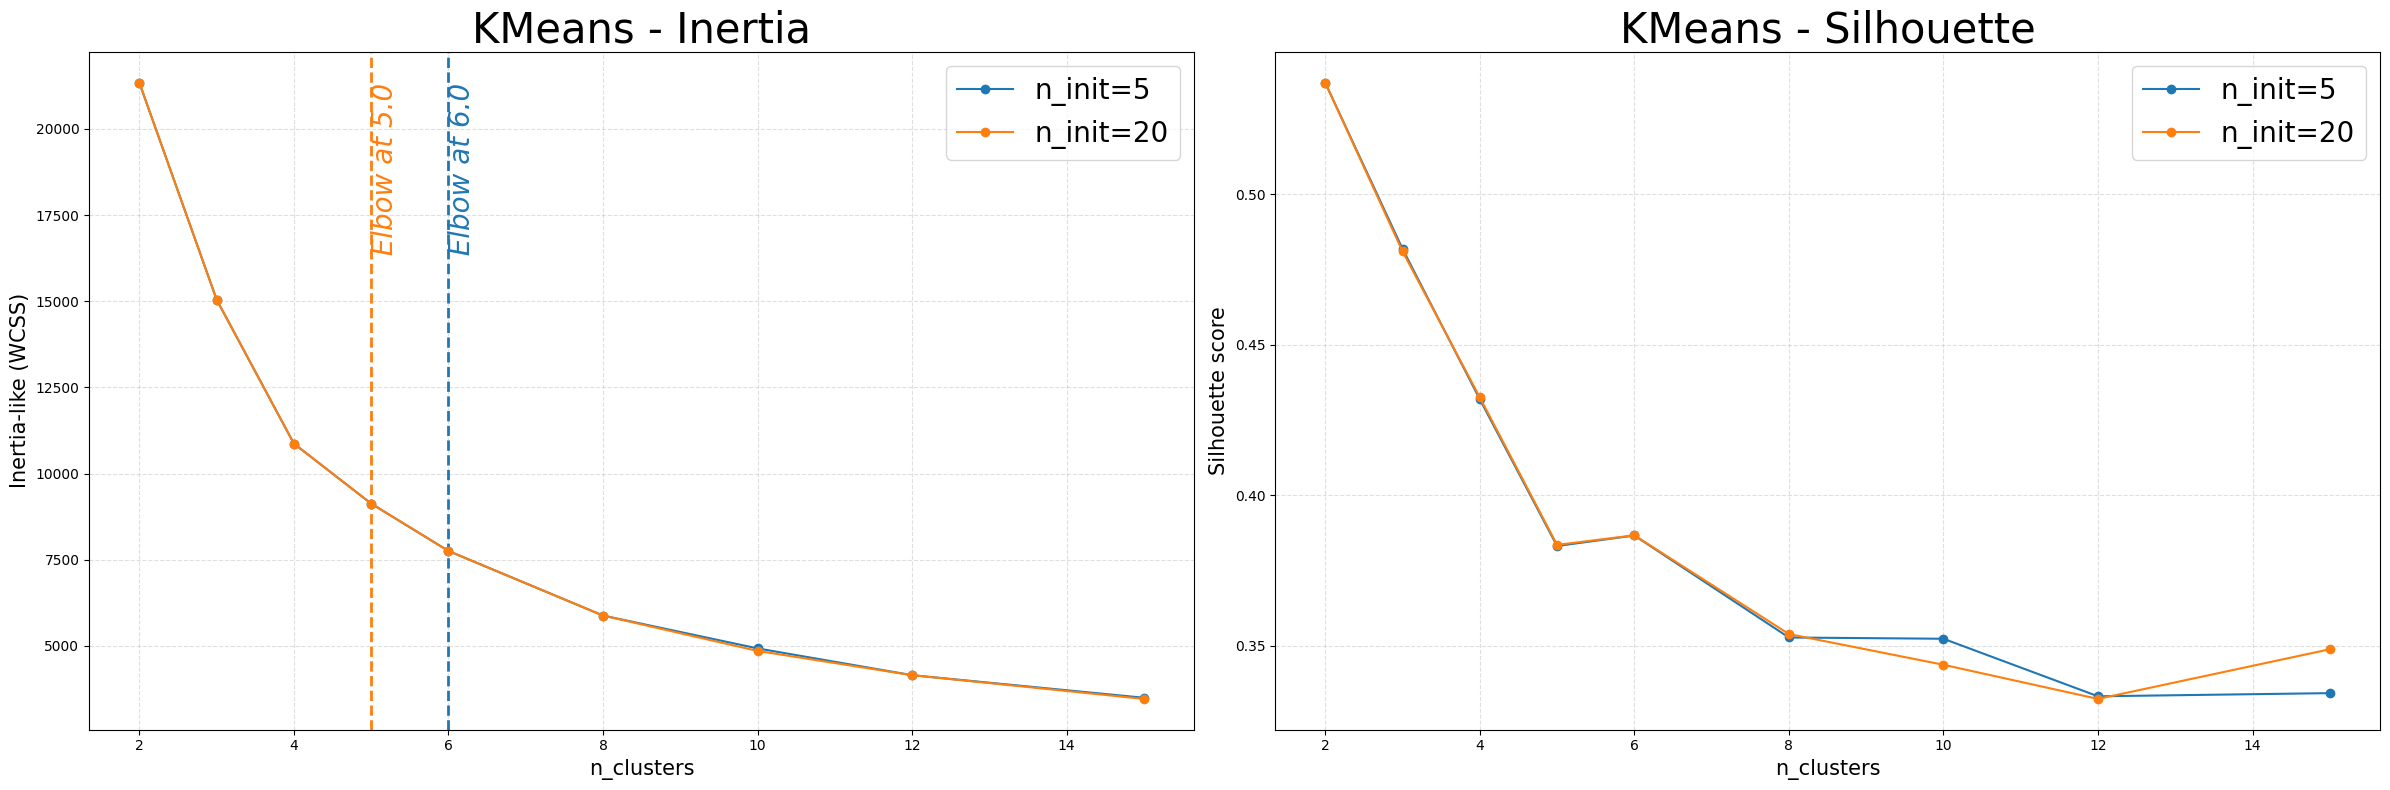

• ✅ [GRID REFINE] KMeans: n_clusters refined around elbow=5 → [2, 3, 4, 5, 6, 8]
   - ℹ️ [GRID REFINE] KMeans: previous n_clusters grid → [2, 15]


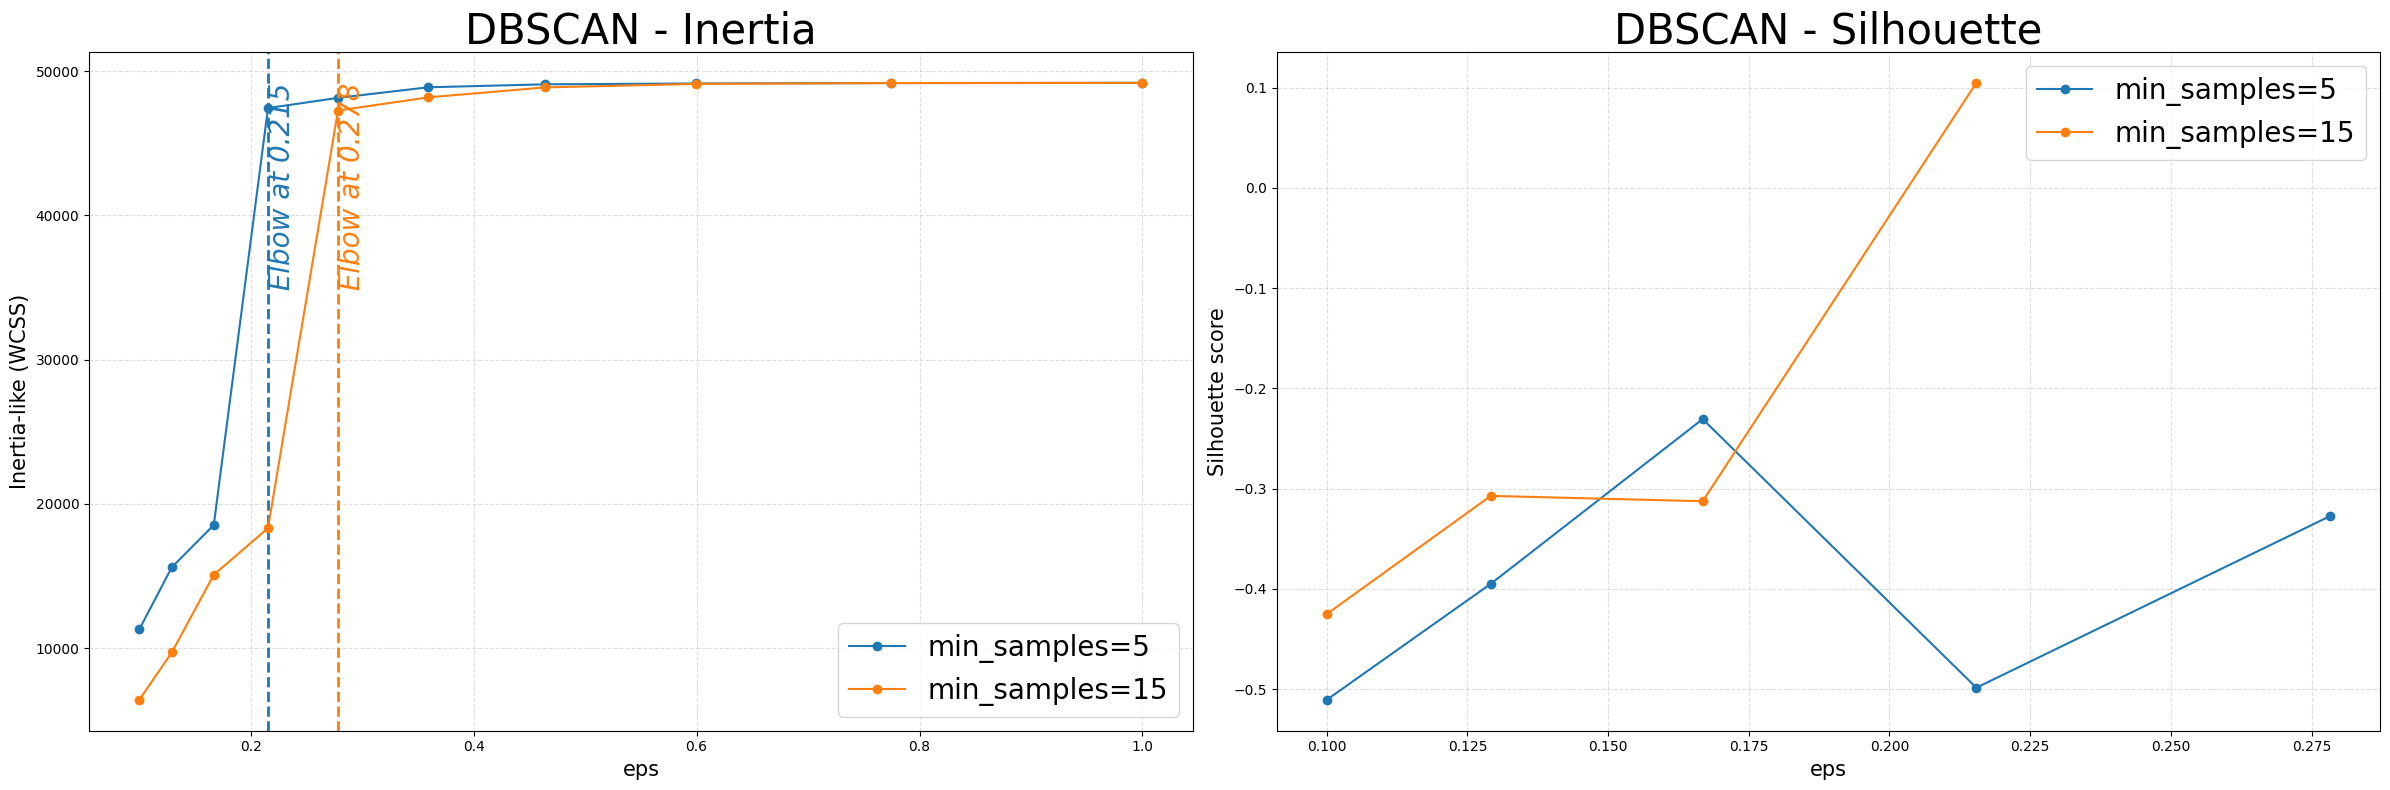

• ✅ [GRID REFINE] DBSCAN: eps refined around elbow=0.278256 → [0.166954, 0.196603, 0.231518, 0.272634, 0.278256, 0.321052, 0.378068, 0.44521]
   - ℹ️ [GRID REFINE] DBSCAN: previous eps grid → [np.float64(0.1), np.float64(1.0)]

==================== 🧭 UNSUPERVISED MODELS COMPARISON ======================



==================== CLUSTER GEOMETRICAL VISUALIZATION ====================
• ℹ️ PCA(2) applied only for cluster visualization


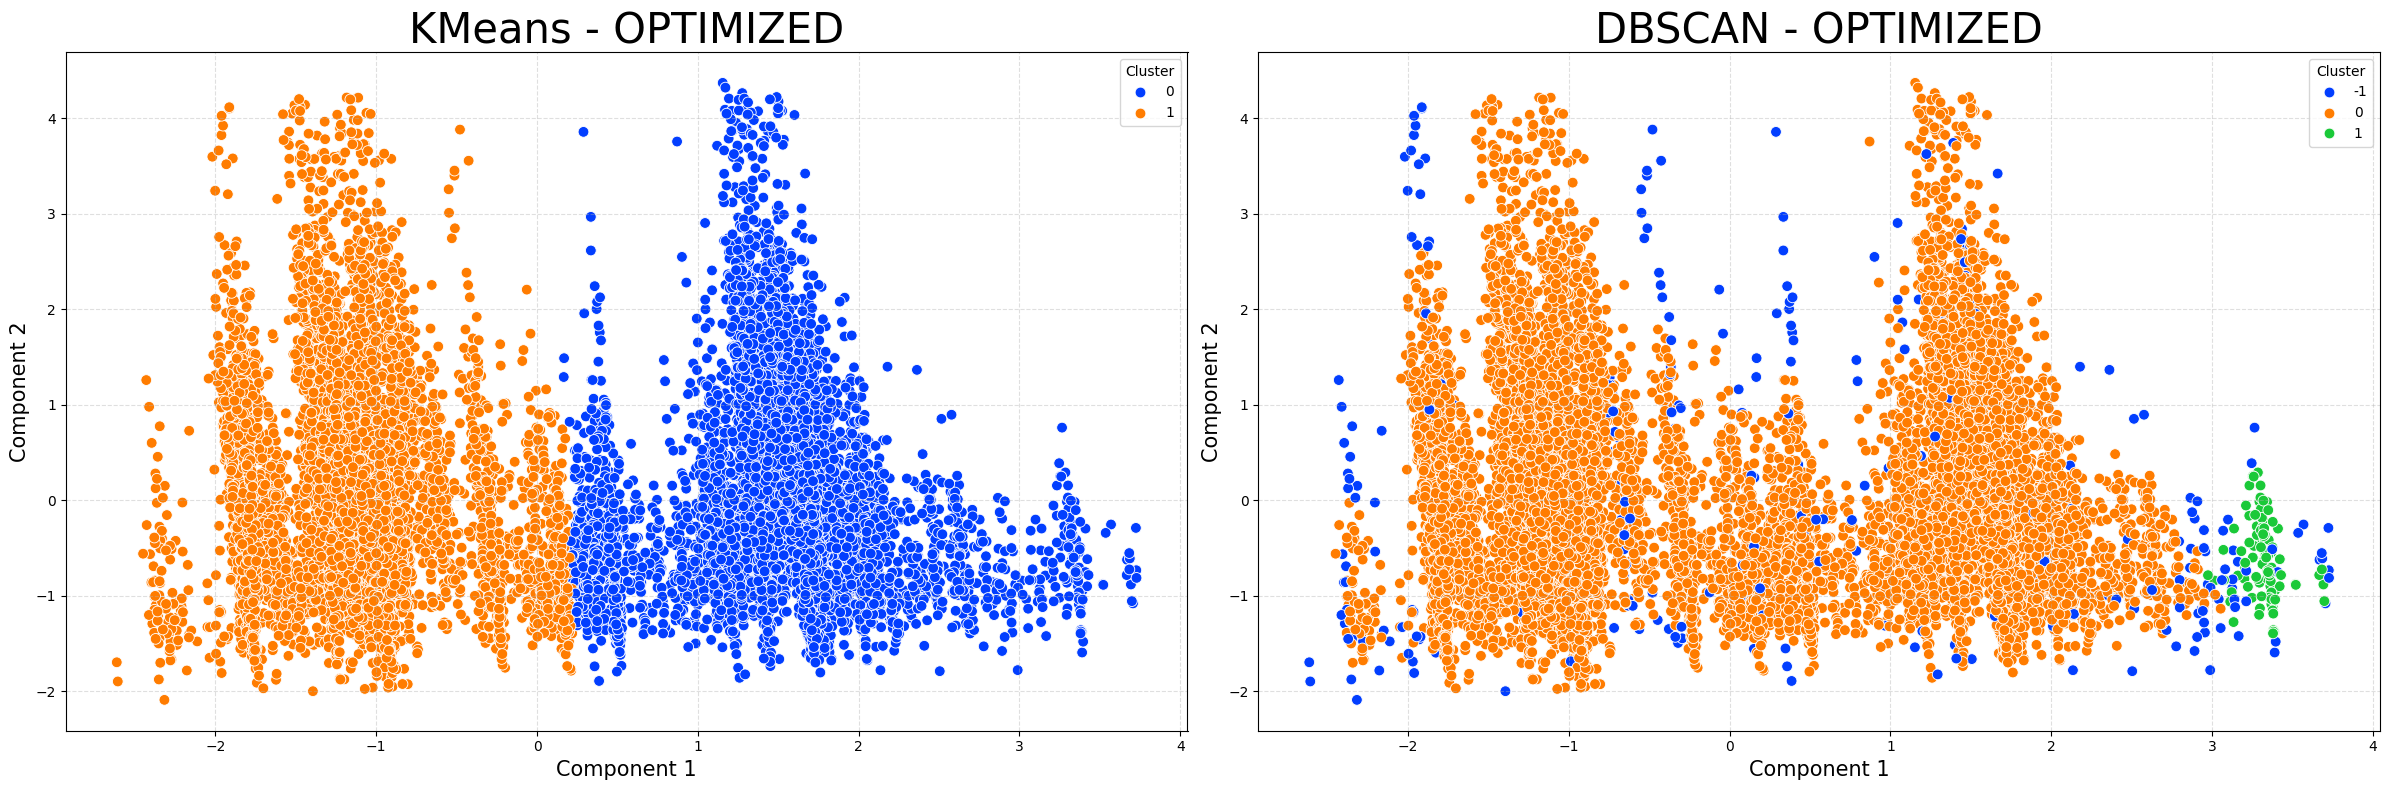


==================== 📊 CLUSTER INTERPRETATION: KMeans (OPTIMIZED ====================


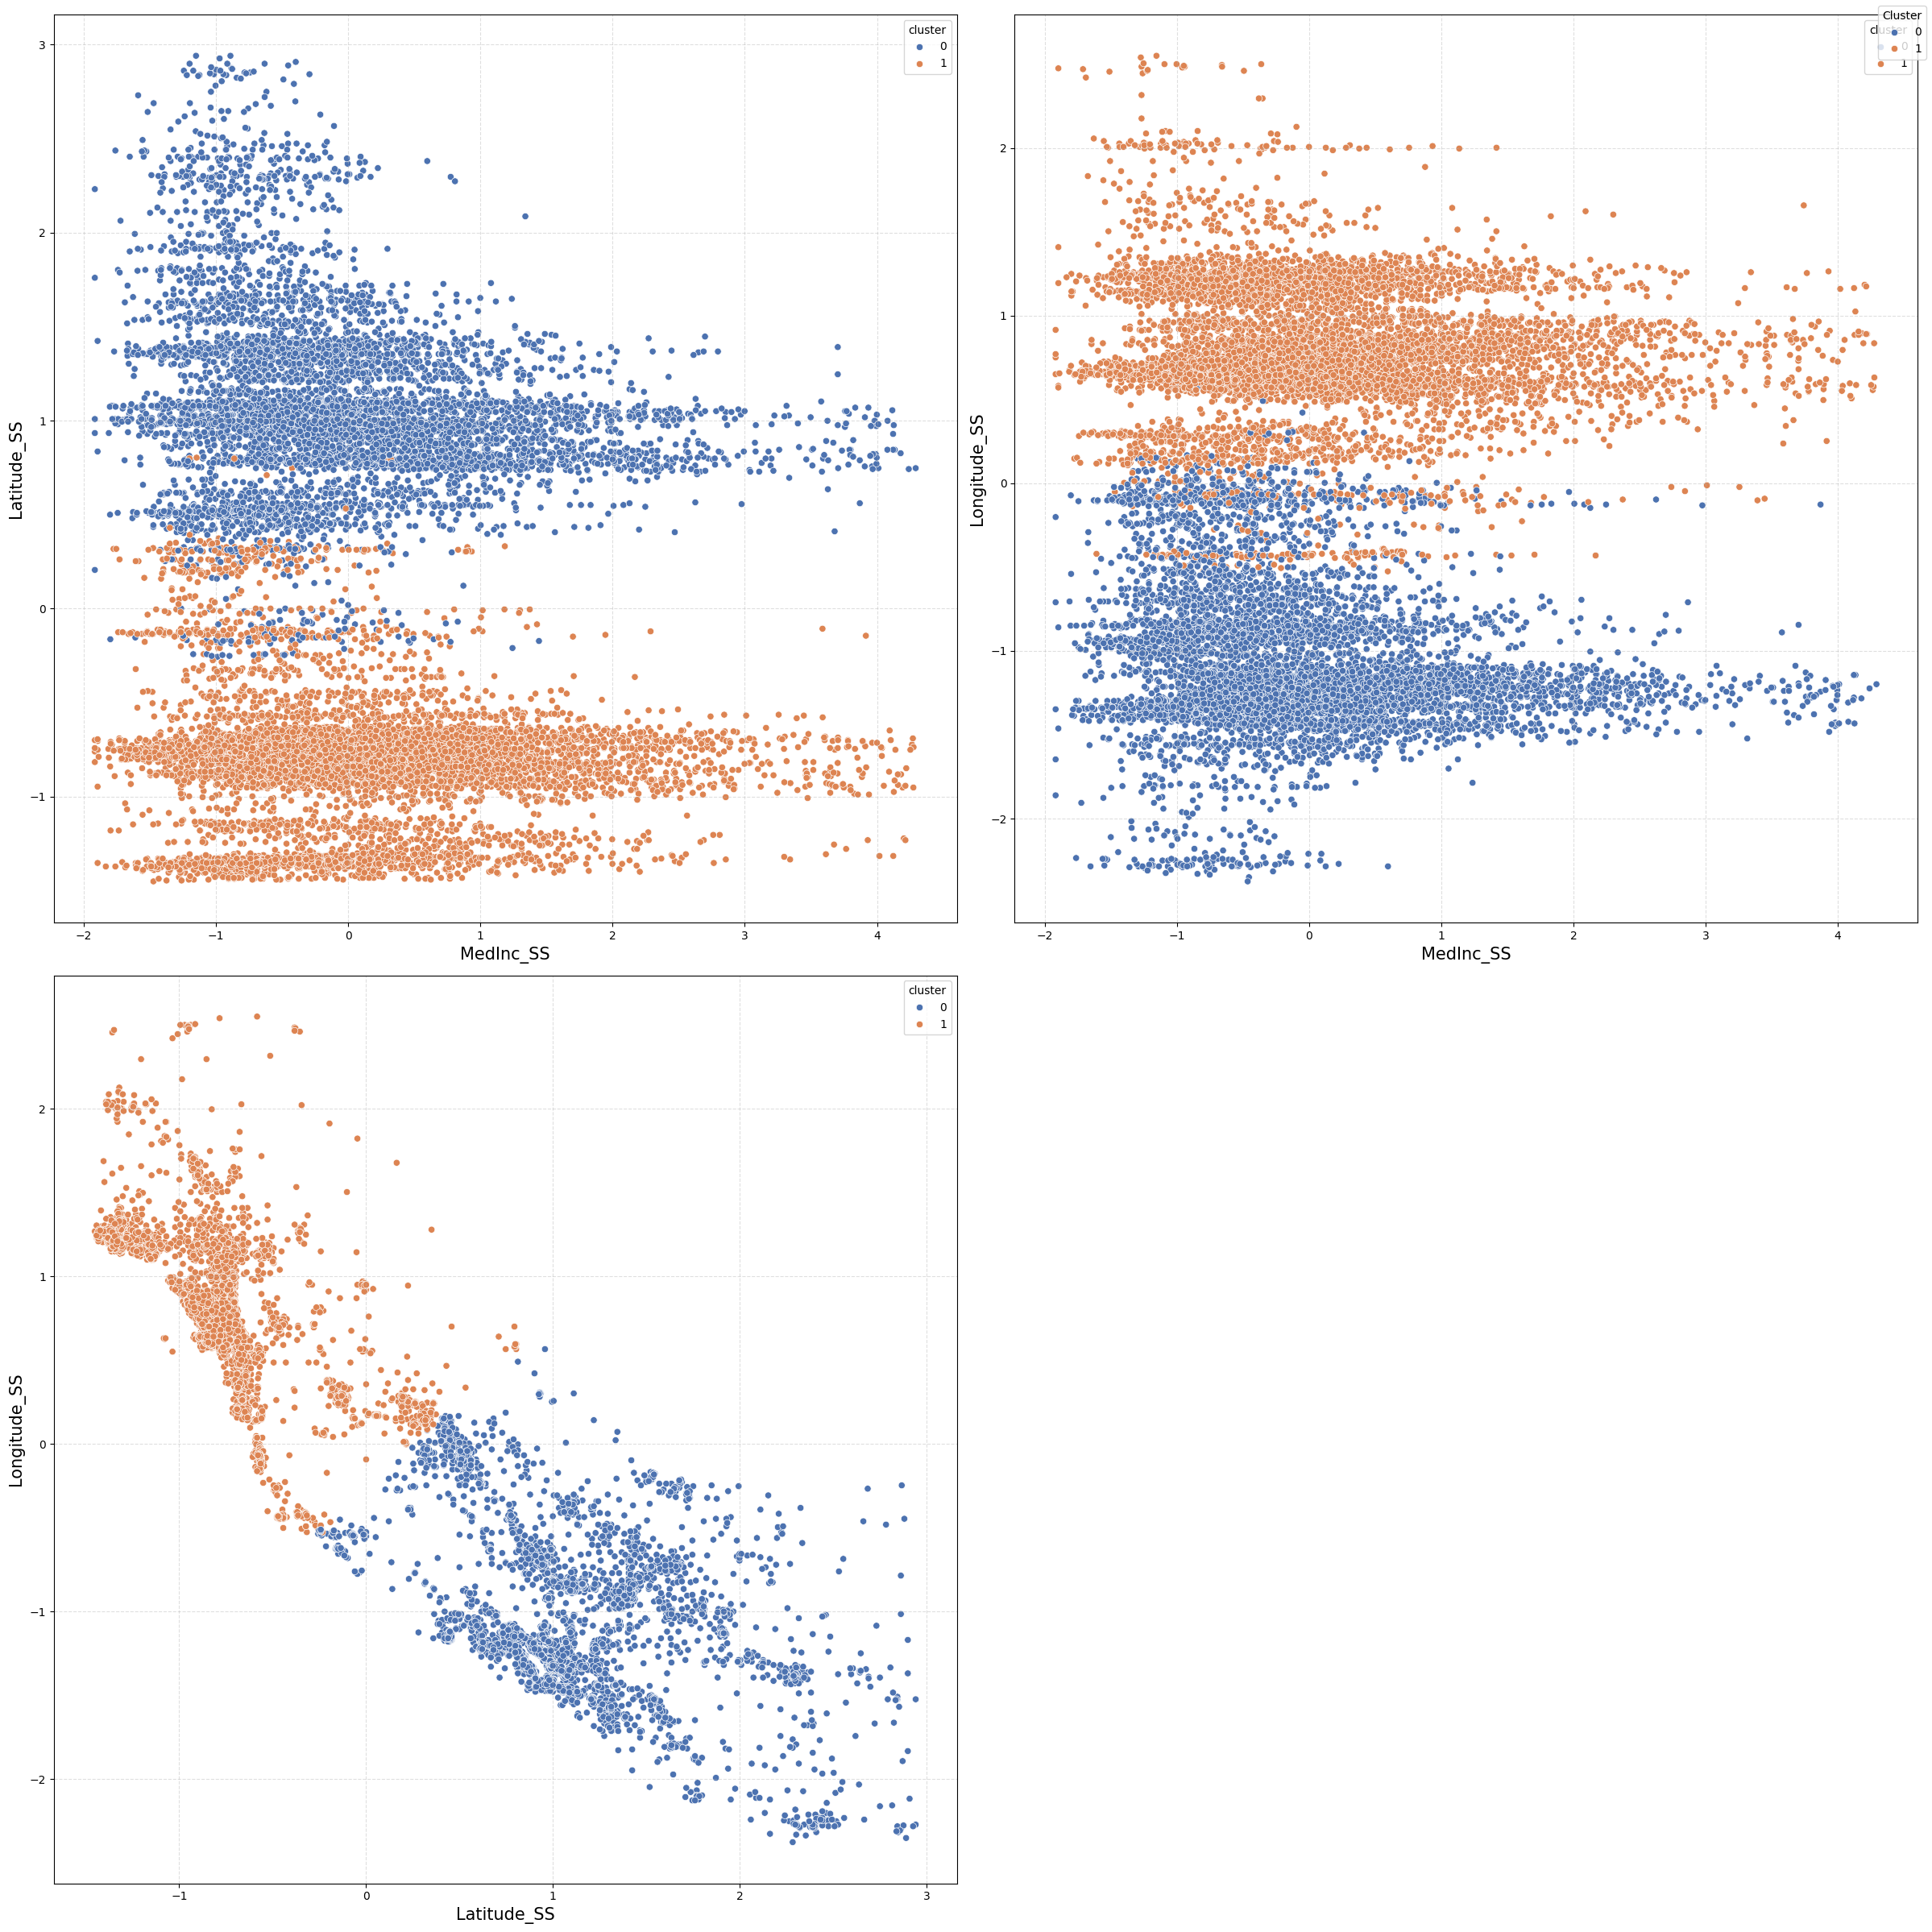


==================== 📊 CLUSTER INTERPRETATION: DBSCAN (OPTIMIZED ====================


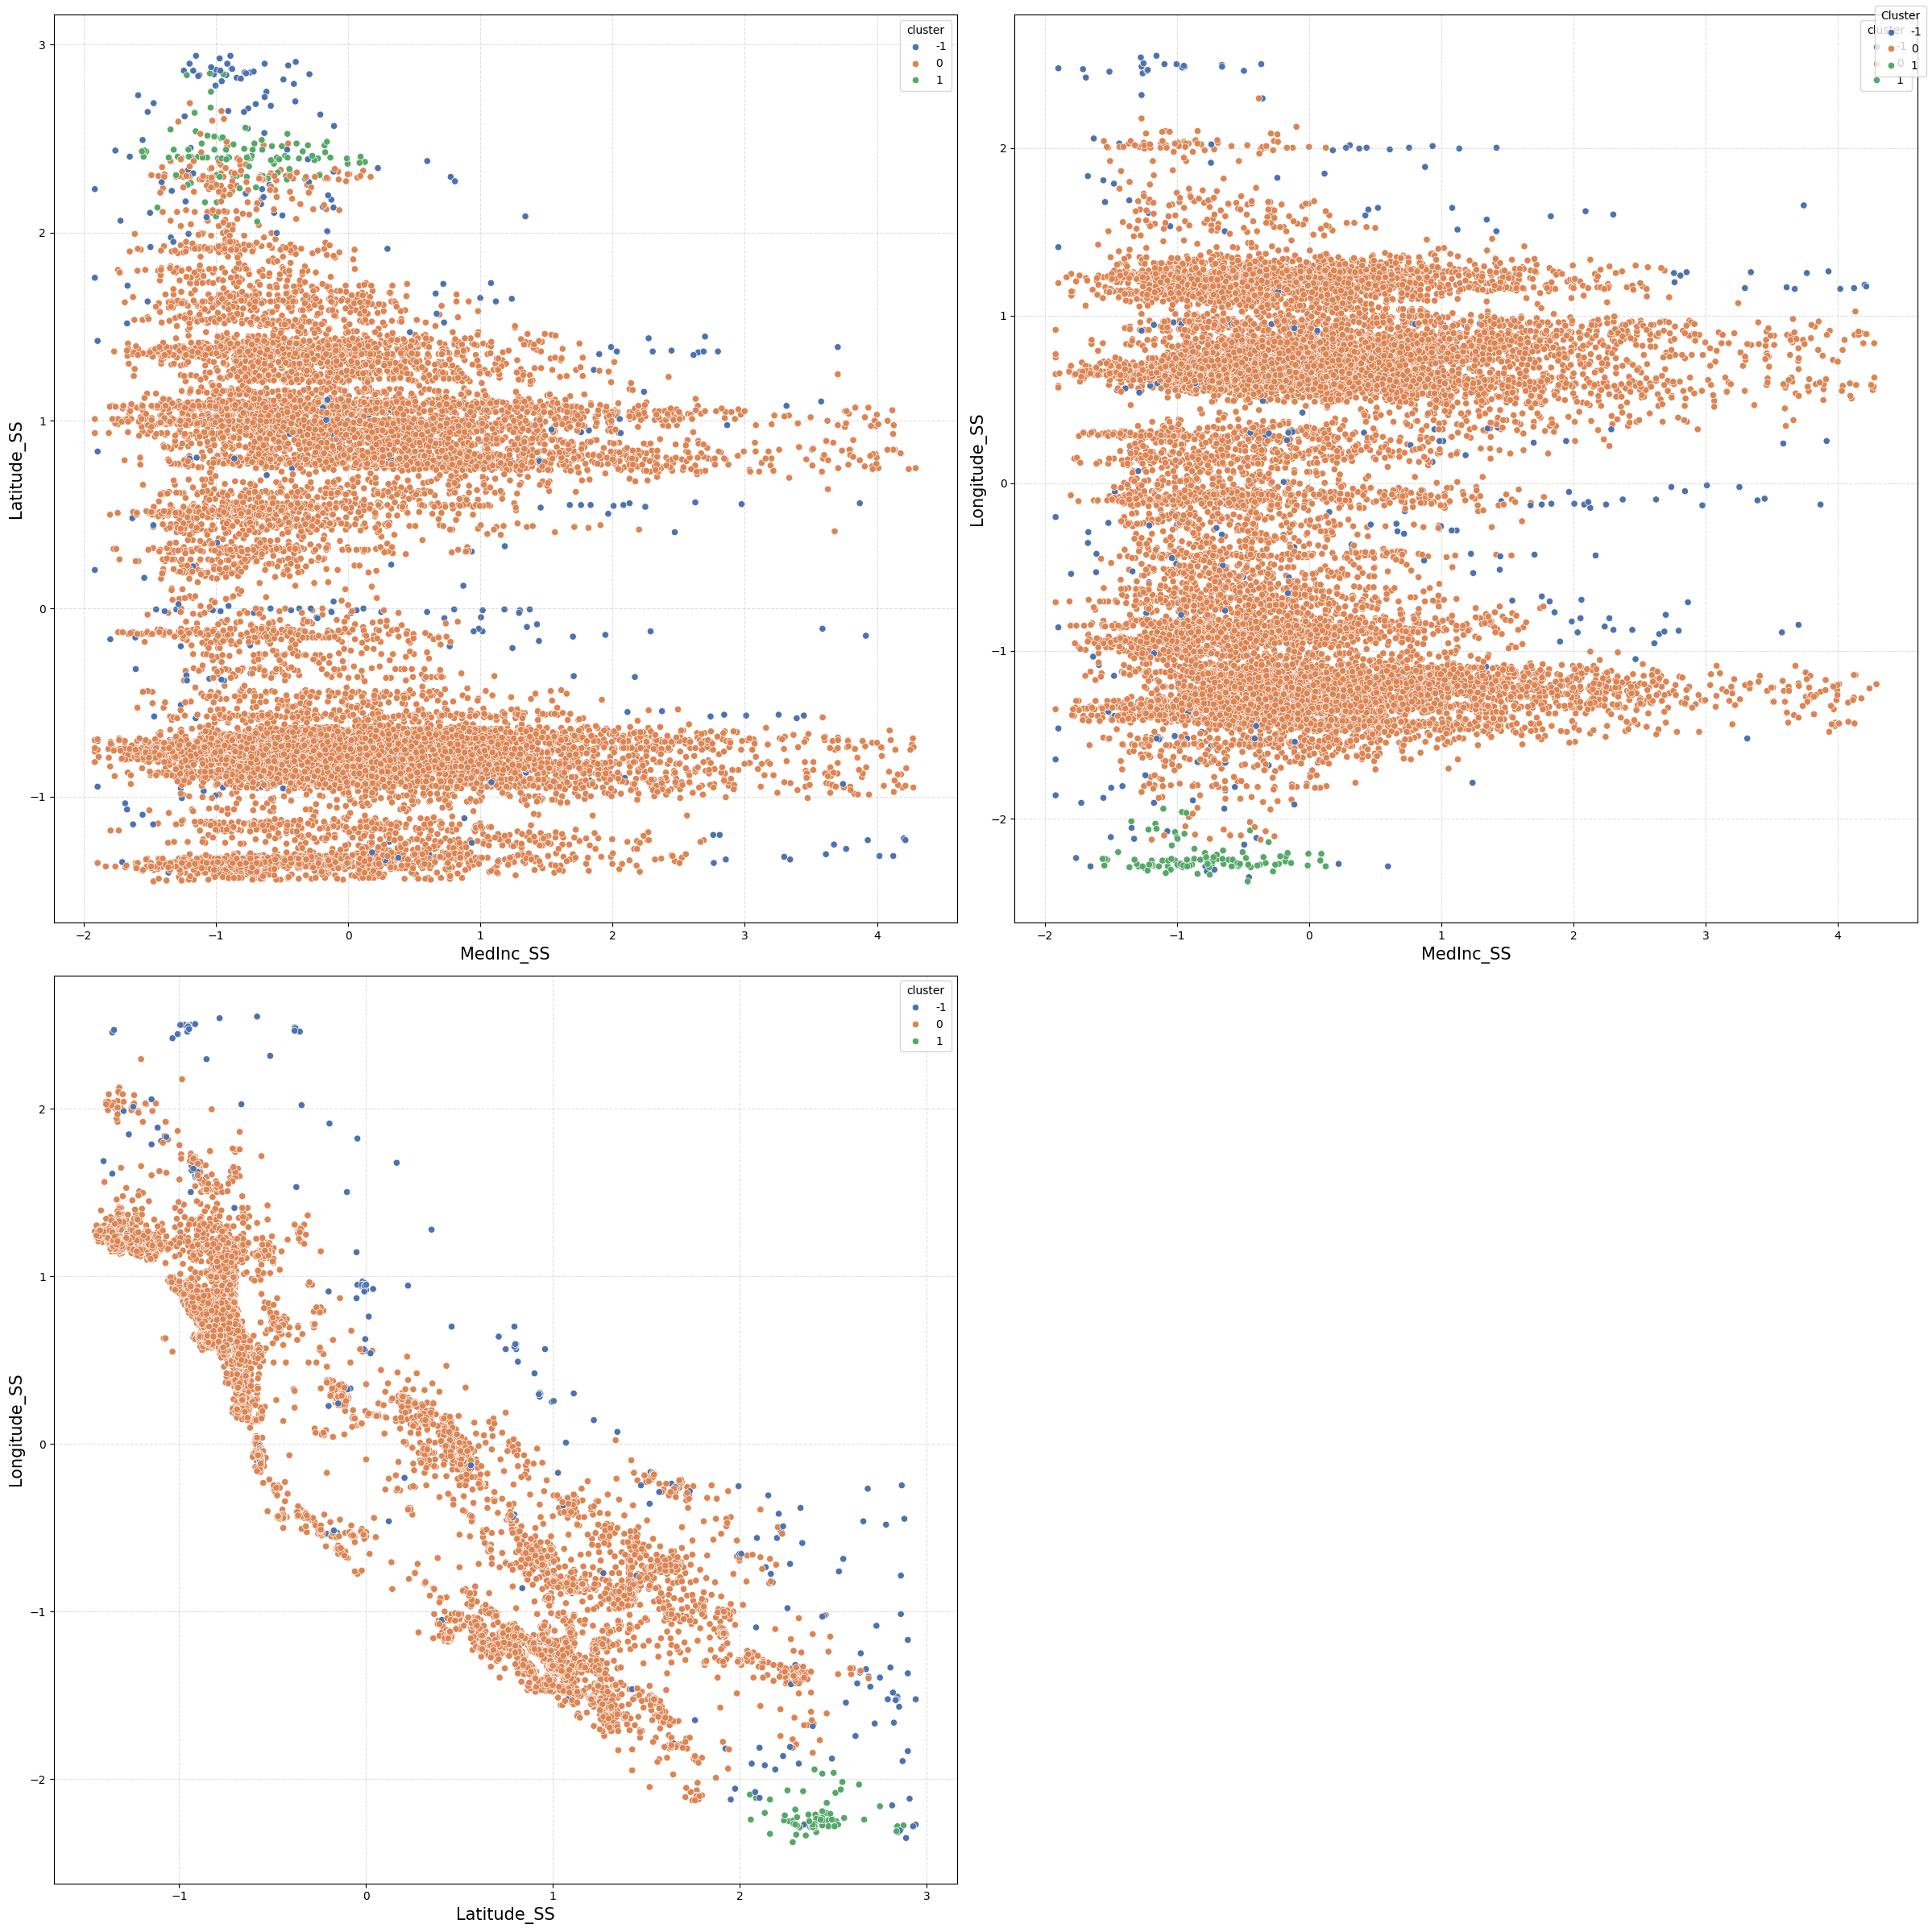

-------------------------------
STEP 17 - PART 2) SUPERVISED CLASSIFICATION
-------------------------------

• ℹ️ Pseudo-labeling with: OPTIMIZED KMeans (optimized)
• ⚠️ Dataset size: BIG -> Grid's parameters will be filled with 2 values
• ℹ️ Selected CLASSIFICATION models: ['DecisionTreeClassifier', 'RandomForestClassifier', 'KNeighborsClassifier']
• ℹ️ Number of fits required per model:
   - 🔍 DecisionTreeClassifier — total model fits required: 750
   - 🔍 RandomForestClassifier — total model fits required: 360
   - 🔍 KNeighborsClassifier — total model fits required: 40
• ℹ️ Expected Time to Complete (ETC): 3m 6s - 3m 47s


==================== ⚖️ CLASSIFICATION MODELS COMPARISON ====================



==================== 📊 MODEL PLOT: DecisionTreeClassifier ====================


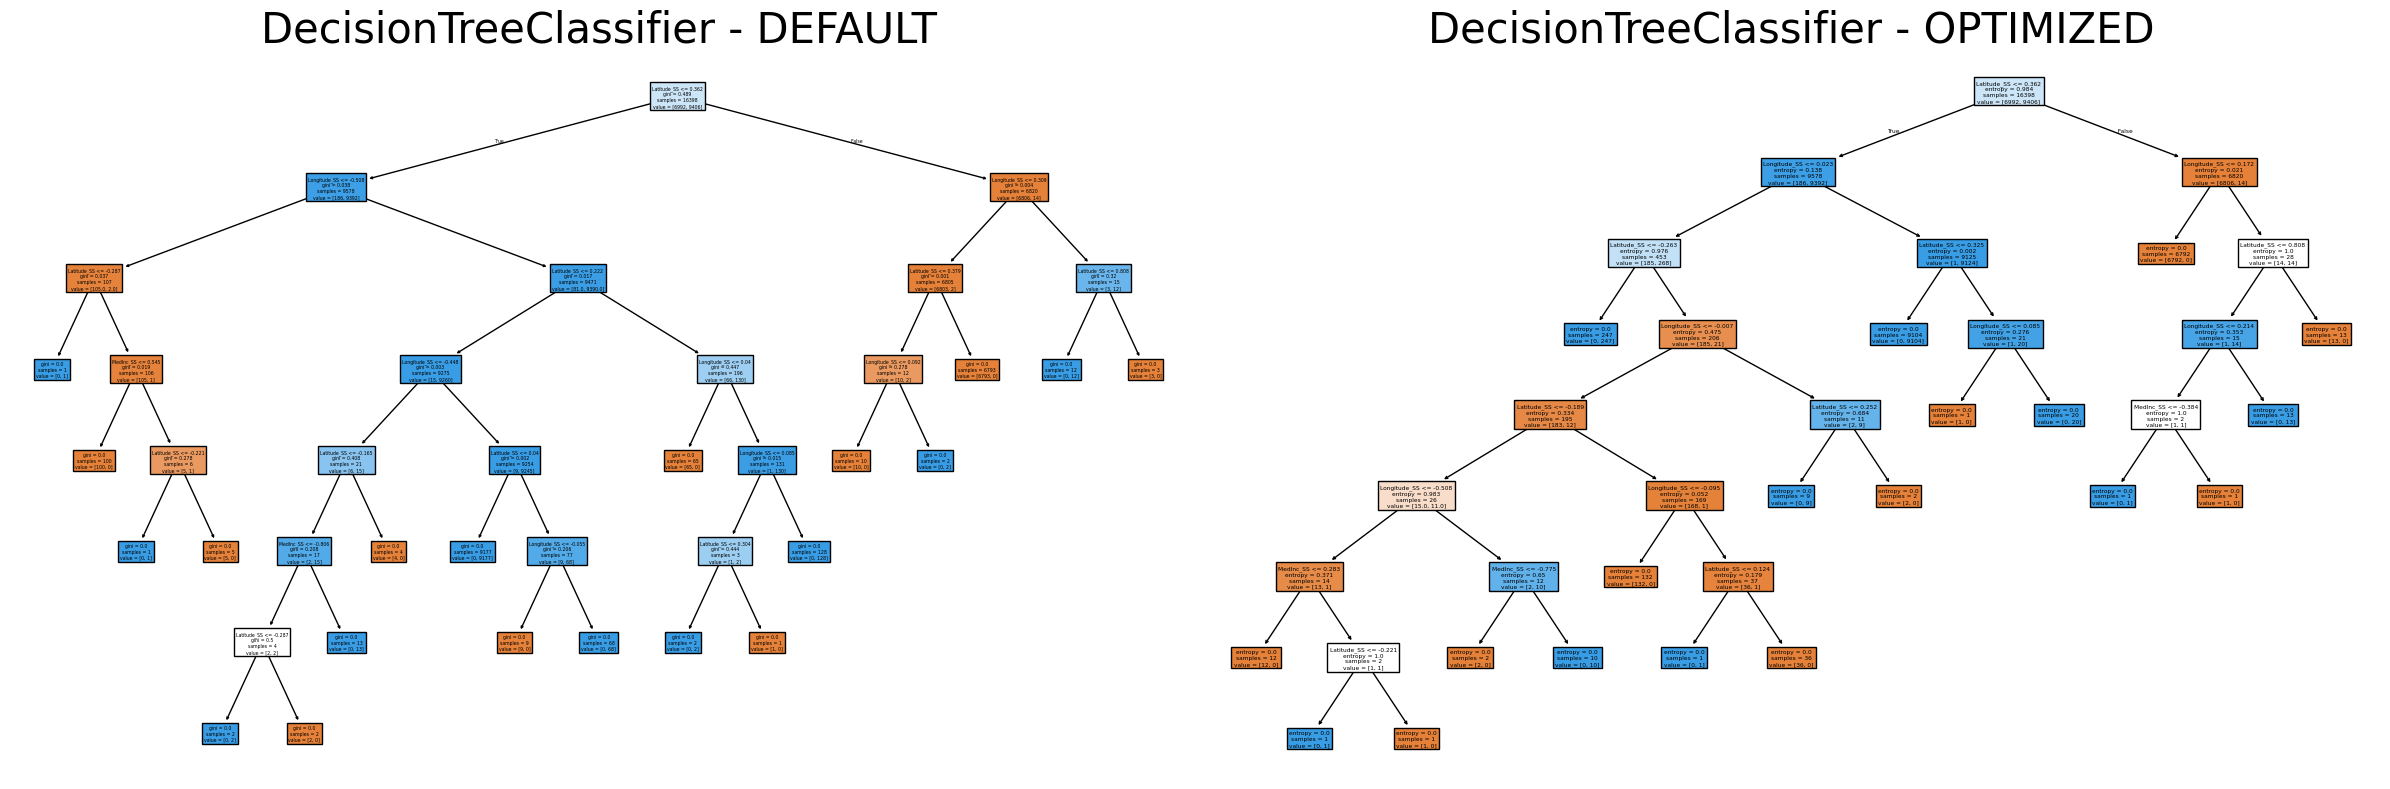


==================== 📊 MODEL PLOT: RandomForestClassifier ====================


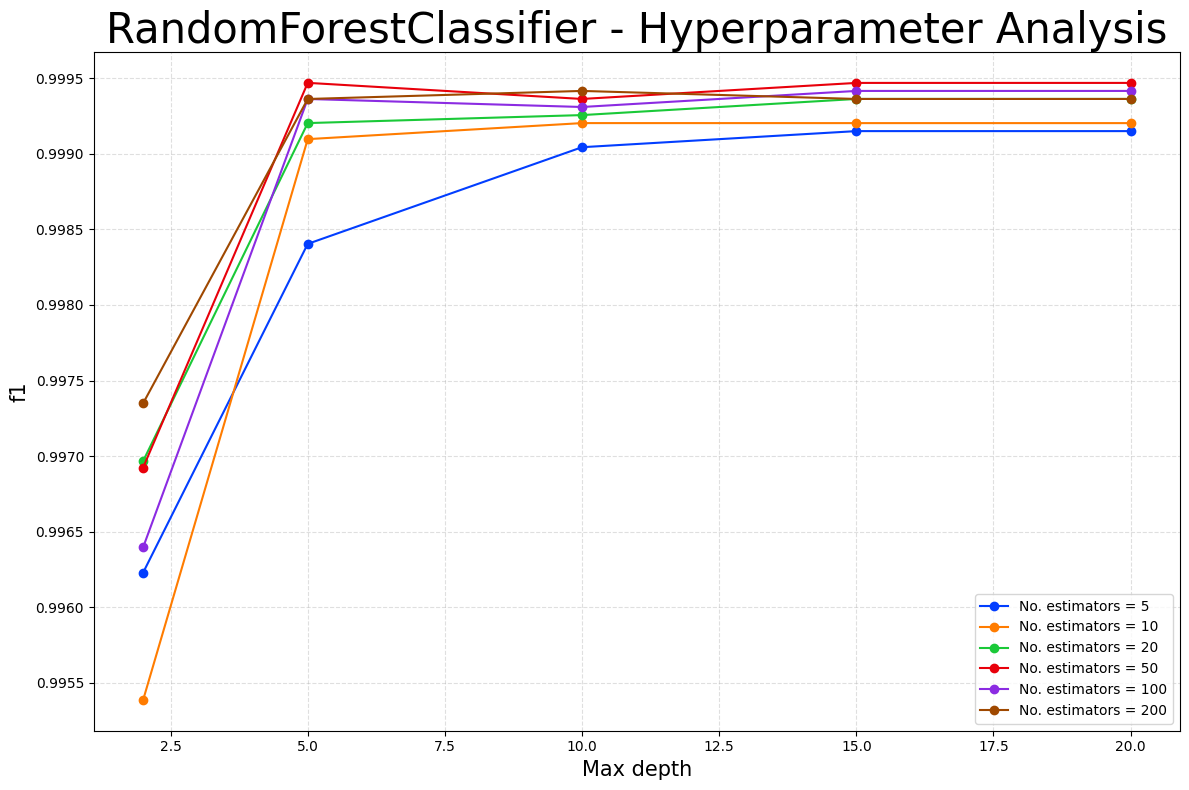


==================== 📊 MODEL PLOT: KNeighborsClassifier ====================


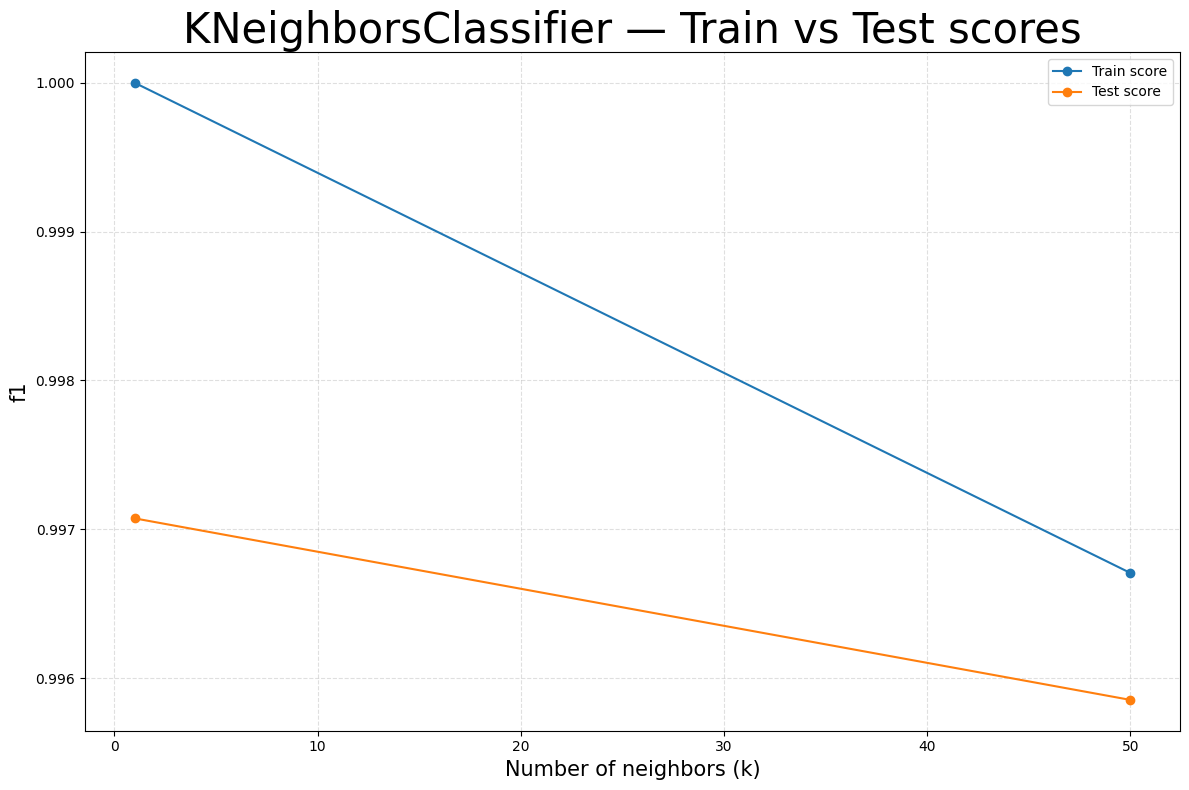

In [122]:
# ===============================
# STEP TITLE
# ===============================
print("-------------------------------")
if supervised_learning:
    print("STEP 17) PREDICTION MODELS SELECTED - ",learning_type, dataset_type)
elif not supervised_learning and not pseudo_tagging:
    print("STEP 17) PREDICTION MODELS SELECTED - ",learning_type, dataset_type)
elif not supervised_learning and pseudo_tagging:
    print("STEP 17) PREDICTION MODELS SELECTED - ",learning_type, dataset_type, "+ PSEUDO TAGGING + SUPERVISED CLASSIFICATION")
print("-------------------------------\n")

# ===============================
# TIME-SERIES DATASET
# ===============================
if dataset_type == "TIME-SERIES":
    # -------------------------------
    #  ARIMA MODEL WITH SUGGESTED VALUES
    # -------------------------------
    # Copy previous step data
    df_timeseries_S16 = df_timeseries_S6.copy()
    # Instance ARIMA model
    arima_model = ARIMA(endog = df_timeseries_S16, order = (suggested_p, suggested_d, suggested_q))
    # Train ARIMA model
    arima_result = arima_model.fit()
    # Predict with trained ARIMA model
    prediction_ARIMA = arima_result.predict(start  = len(df_timeseries_S16), end= len(df_timeseries_S16) + prediction_horizon)
    # -------------------------------
    #  AUTO ARIMA
    # -------------------------------
    # Decide seasonal behaviour for auto_arima
    auto_arima_m = get_auto_arima_m(period=period_S6,seasonal_peaks = seasonal_peaks_S6)
    if auto_arima_m > 1:
        auto_arima_seasonal = True
    else:
        auto_arima_seasonal = False
    # Instance AUTO ARIMA model
    auto_arima_model = auto_arima(y=df_timeseries_S16, seasonal = auto_arima_seasonal, trace = False, m = auto_arima_m)
    # Retrieve orders
    auto_p, auto_d, auto_q = auto_arima_model.order
    # Predict with trained AUTO ARIMA model
    prediction_AUTO_ARIMA = auto_arima_model.predict(prediction_horizon)
    # -------------------------------
    #  COMPARISON
    # -------------------------------
    log(f"ARIMA (manual): selected order (p,d,q)=({suggested_p},{suggested_d},{suggested_q})", level=1, type="INFO")
    log(f"AUTO-ARIMA: selected order (p,d,q)=({auto_p},{auto_d},{auto_q}) with seasonal={auto_arima_seasonal}, m={auto_arima_m}", level=1, type="INFO")

    if (suggested_p == auto_p) and (suggested_d == auto_d) and (suggested_q == auto_q):
        log(f"ARIMA vs AUTO-ARIMA: Orders MATCH", level=1, type="SUCCESS", bold=True)
    else:
        log(f"ARIMA vs AUTO-ARIMA: Orders DO NOT MATCH", level=1, type="WARNING", bold=True)
    # -------------------------------
    #  FORECAST PLOT — ARIMA
    # -------------------------------
    fig_arima, ax_arima = plt.subplots(nrows=1, ncols=1, figsize=(2 * figWidth_unit, 1 * figHeight_unit))
    # Plot original series
    ax_arima.plot(df_timeseries_S16, label="Original Time-series")
    # Plot ARIMA forecast
    ax_arima.plot(prediction_ARIMA, label="Forecast (ARIMA)", color="red", linewidth=5, linestyle="dashed")
    # Title, labels, ticks and legend
    ax_arima.set_title(label=f"Forecast with ARIMA(p={suggested_p}, d={suggested_d}, q={suggested_q})", fontsize=plot_title_font_size)
    ax_arima.set_xlabel(xlabel=df_timeseries_S16.index.name, fontsize=plot_label_font_size)
    ax_arima.set_ylabel(ylabel=df_timeseries_S16.name, fontsize=plot_label_font_size)
    ax_arima.tick_params(labelsize=plot_tick_font_size)
    ax_arima.legend(fontsize=plot_text_font_size)
    ax_arima.grid(True, linestyle="dotted", linewidth=0.5, color="black")
    # Show plot
    plt.tight_layout()
    plt.show()
    # -------------------------------
    #  FORECAST PLOT — AUTO ARIMA
    # -------------------------------
    fig_auto, ax_auto_arima = plt.subplots(nrows=1, ncols=1, figsize=(2 * figWidth_unit, 1 * figHeight_unit))
    # Plot original series
    ax_auto_arima.plot(df_timeseries_S16, label="Original Time-series")
    # Plot AUTO-ARIMA forecast
    ax_auto_arima.plot(prediction_AUTO_ARIMA, label="Forecast (AUTO-ARIMA)", color="green", linewidth=5, linestyle="dashed")
    # Title, labels, ticks and legend
    ax_auto_arima.set_title(label=f"Forecast with AUTO-ARIMA(p={auto_p}, d={auto_d}, q={auto_q})", fontsize=plot_title_font_size)
    ax_auto_arima.set_xlabel(xlabel=df_timeseries_S16.index.name, fontsize=plot_label_font_size)
    ax_auto_arima.set_ylabel(ylabel=df_timeseries_S16.name, fontsize=plot_label_font_size)
    ax_auto_arima.tick_params(labelsize=plot_tick_font_size)
    ax_auto_arima.legend(fontsize=plot_text_font_size)
    ax_auto_arima.grid(True, linestyle="dotted", linewidth=0.5, color="black")
    # Show plot
    plt.tight_layout()
    plt.show()

# ===============================
# NLP and TABULAR DATASET
# ===============================
elif dataset_type == "NLP" or dataset_type == "TABULAR":
    # Load processed data according to selected revision
    try:
        X_train_model = pd.read_csv(processed_data_output_path + "X_train_final" + "_" + learning_type + "_" + dataset_type + "_" + str(rev_number) + ".csv")
        X_test_model  = pd.read_csv(processed_data_output_path + "X_test_final"  + "_" + learning_type + "_" + dataset_type + "_" + str(rev_number) + ".csv")
        if supervised_learning:
            y_train_model = pd.read_csv(processed_data_output_path + "y_train_final" + "_" + learning_type + "_" + dataset_type + "_" + str(rev_number) + ".csv").squeeze()
            y_test_model  = pd.read_csv(processed_data_output_path + "y_test_final"  + "_" + learning_type + "_" + dataset_type + "_" + str(rev_number) + ".csv").squeeze()
        n_samples  = X_train_model.shape[0]
        n_features = X_train_model.shape[1]
    except FileNotFoundError as e:
        raise FileNotFoundError(
            f"❌ The selected revision rev={rev_to_use} does NOT exist.\nMissing file: {e.filename}\nPlease check available revision numbers in '../data/processed/'.")
    log(f"Loaded datasets with revision {rev_to_use}", type="INFO")
    if supervised_learning:
        # ===============================
        # ===============================
        #  SUPERVISED PIPELINE
        # ===============================
        # ===============================

        # -------------------------------
        #  GRIDS FOR OPIMIZATION
        # -------------------------------
        # Store number of parameters for the grid
        num_grid_param =  n_grid_param(
                                    n_samples=X_train_model.shape[0],
                                    n_features=X_train_model.shape[1],
                                    n_features_BIG_dataset=n_features_BIG_dataset,
                                    n_features_MEDIUM_dataset=n_features_MEDIUM_dataset,
                                    n_features_SMALL_dataset=n_features_SMALL_dataset,
                                    n_samples_BIG_dataset=n_samples_BIG_dataset,
                                    n_samples_MEDIUM_dataset=n_samples_MEDIUM_dataset,
                                    n_samples_SMALL_dataset=n_samples_SMALL_dataset,
                                    n_samples_MICRO_dataset=n_samples_MICRO_dataset)
        classification_grids = {
            "LogisticRegression": {
                "penalty": ["l1", "l2", "elasticnet", None],
                "C": [0.001, 0.01, 0.1, 1, 10, 100],
                "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
            },
            "DecisionTreeClassifier": {
                "criterion": ["gini", "entropy", "log_loss"],
                "max_depth": [None, 5, 10, 20, 30],
                "min_samples_split": [2, 5, 10, 20, 30]
            },
            "RandomForestClassifier": {
                "n_estimators": [5, 10, 20, 50, 100, 200],
                "max_depth": [None, 2, 5, 10, 15, 20]
            },
            "AdaBoostClassifier": {
                "n_estimators" : smart_logspace_choose(2, 200, "integer", num_grid_param),
                "learning_rate" : smart_logspace_choose(0.01, 1.0, "float", num_grid_param)
            },
            "GradientBoostingClassifier": {
                "n_estimators": smart_logspace_choose(2, 200, "integer",num_grid_param),
                "learning_rate": smart_logspace_choose(0.01, 1.0, "float",num_grid_param),
                "max_depth": smart_logspace_choose(5, 30, "integer", num_grid_param),
                "subsample": smart_logspace_choose(0.5, 1.0, "float", num_grid_param)
            },
            "XGBClassifier": {
                "n_estimators": smart_logspace_choose(2, 200, "integer", num_grid_param),
                "learning_rate": smart_logspace_choose(0.01, 1.0, "float", num_grid_param),
                "max_depth": smart_logspace_choose(5, 30, "integer", num_grid_param),
                "subsample": smart_logspace_choose(0.5, 1.0, "float", num_grid_param)
            },
            "LGBMClassifier": {
                "n_estimators": smart_logspace_choose(2, 200, "integer", num_grid_param),
                "learning_rate": smart_logspace_choose(0.01, 1.0, "float", num_grid_param),
                "max_depth": smart_logspace_choose(5, 30, "integer", num_grid_param),
                "subsample": smart_logspace_choose(0.5, 1.0, "float", num_grid_param)
            },
            "LinearSVC": {
                "C": smart_logspace_choose(0.1, 10, "float", num_grid_param)
            },
            "MultinomialNB": {},
            "GaussianNB": {},
            "BernoulliNB": {},
            "KNeighborsClassifier": {
                "n_neighbors": smart_logspace_choose(1, max(10, int(min(50, n_samples ** 0.5))), "integer", num_grid_param),
                "metric": [resolve_distance_metric(dataset_type)],
                "weights": ["uniform", "distance"]
            }
        }
        regression_grids = {
            "LinearRegression": {},
            "Lasso": {
                "alpha": [0.001, 0.005, 0.01, 0.1, 0.5, 1, 2, 5, 10, 20, 50],
                "max_iter": [1000, 5000, 10000]
            },
            "Ridge": {
                "alpha": [0.001, 0.005, 0.01, 0.1, 0.5, 1, 2, 5, 10, 20, 50],
                "max_iter": [1000, 5000, 10000]
            },
            "DecisionTreeRegressor": {
                "criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"],
                "max_depth": [None, 5, 10, 20, 30],
                "min_samples_split": [2, 5, 10, 20, 30]
            },
            "RandomForestRegressor": {
                "n_estimators": [5, 10, 20, 50, 100, 200],
                "max_depth": [None, 2, 5, 10, 15, 20]
            },
            "AdaBoostRegressor": {
                "n_estimators" : smart_logspace_choose(2, 200, "integer", num_grid_param),
                "learning_rate" : smart_logspace_choose(0.01, 1.0, "float", num_grid_param)
            },
            "GradientBoostingRegressor": {
                "n_estimators": smart_logspace_choose(2, 200, "integer", num_grid_param),
                "learning_rate": smart_logspace_choose(0.01, 1.0, "float", num_grid_param),
                "max_depth": smart_logspace_choose(5, 30, "integer", num_grid_param),
                "subsample": smart_logspace_choose(0.5, 1.0, "float", num_grid_param)
            },
            "XGBRegressor": {
                "n_estimators": smart_logspace_choose(2, 200, "integer", num_grid_param),
                "learning_rate": smart_logspace_choose(0.01, 1.0, "float", num_grid_param),
                "max_depth": smart_logspace_choose(5, 30, "integer", num_grid_param),
                "subsample": smart_logspace_choose(0.5, 1.0, "float", num_grid_param)
            },
            "LGBMRegressor": {
                "n_estimators": smart_logspace_choose(2, 200, "integer", num_grid_param),
                "learning_rate": smart_logspace_choose(0.01, 1.0, "float", num_grid_param),
                "max_depth": smart_logspace_choose(5, 30, "integer", num_grid_param),
                "subsample": smart_logspace_choose(0.5, 1.0, "float", num_grid_param)
            },
            "KNeighborsRegressor": {
                "n_neighbors": smart_logspace_choose(1, max(10, int(min(50, n_samples ** 0.5))), "integer", num_grid_param),
                "metric": [resolve_distance_metric(dataset_type)],
                "weights": ["uniform", "distance"]
            }
        }
        # -------------------------------
        #  DEFAULT MODELS
        # -------------------------------
        classification_available = {
            "LogisticRegression": LogisticRegression(random_state=random_seed),
            "RandomForestClassifier": RandomForestClassifier(random_state=random_seed),
            "DecisionTreeClassifier": DecisionTreeClassifier(random_state=random_seed),
            "AdaBoostClassifier": AdaBoostClassifier(random_state=random_seed),
            "GradientBoostingClassifier": GradientBoostingClassifier(random_state=random_seed),
            "XGBClassifier": XGBClassifier(random_state=random_seed, eval_metric=map_xgb_eval_metric("XGBClassifier", classification_scoring_target), use_label_encoder=False),
            "LGBMClassifier": LGBMClassifier(random_state=random_seed),
            "LinearSVC": SVC(random_state=random_seed),
            "MultinomialNB": MultinomialNB(),
            "GaussianNB": GaussianNB(),
            "BernoulliNB": BernoulliNB(),
            "KNeighborsClassifier": KNeighborsClassifier()
        }
        regression_available = {
            "LinearRegression": LinearRegression(),
            "Lasso": Lasso(random_state=random_seed),
            "Ridge": Ridge(random_state=random_seed),
            "DecisionTreeRegressor": DecisionTreeRegressor(random_state=random_seed),
            "RandomForestRegressor": RandomForestRegressor(random_state=random_seed),
            "AdaBoostRegressor": AdaBoostRegressor(random_state=random_seed),
            "GradientBoostingRegressor": GradientBoostingRegressor(random_state=random_seed),
            "XGBRegressor": XGBRegressor(random_state=random_seed, eval_metric=map_xgb_eval_metric("XGBRegressor", regression_scoring_target)),
            "LGBMRegressor": LGBMRegressor(random_state=random_seed),
            "KNeighborsRegressor": KNeighborsRegressor()
        }
        # -------------------------------
        #  SELECTED MODELS
        # -------------------------------
        classification_selected_list = []
        regression_selected_list = []
        for model_name, active in classification_models_selection.items():
            if active:
                classification_selected_list.append(model_name)
        for model_name, active in regression_models_selection.items():
            if active:
                regression_selected_list.append(model_name)
        # Auto-add Lasso/Ridge if LinearRegression is selected
        if "LinearRegression" in regression_selected_list:
            if "Lasso" not in regression_selected_list:
                regression_selected_list.append("Lasso")
            if "Ridge" not in regression_selected_list:
                regression_selected_list.append("Ridge")
        log(f"Selected CLASSIFICATION models: {classification_selected_list}", type="INFO")
        log(f"Selected REGRESSION models: {regression_selected_list}", type="INFO")
        # Parameters needed for classification metrics
        if len(classification_selected_list) > 0:
            proposed_avg, proposed_pos, proposed_score = set_average_proposal(y_train_model, classification_scoring_target)
        # -------------------------------
        #  ESTIMATED COMPUTING TIME
        # -------------------------------
        # Estimated computing time per fit in seconds
        time_per_fit_factor =  set_time_per_fit_factor(
                                n_samples=X_train_model.shape[0],
                                n_features=X_train_model.shape[1],
                                n_features_BIG_dataset=n_features_BIG_dataset,
                                n_features_MEDIUM_dataset=n_features_MEDIUM_dataset,
                                n_features_SMALL_dataset=n_features_SMALL_dataset,
                                n_samples_BIG_dataset=n_samples_BIG_dataset,
                                n_samples_MEDIUM_dataset=n_samples_MEDIUM_dataset,
                                n_samples_SMALL_dataset=n_samples_SMALL_dataset)
        computing_time_per_fit = {
            "LogisticRegression": 0.05 * time_per_fit_factor,
            "DecisionTreeClassifier": 0.05 * time_per_fit_factor,
            "RandomForestClassifier": 0.12 * time_per_fit_factor,
            "AdaBoostClassifier": 0.12 * time_per_fit_factor,
            "GradientBoostingClassifier": 0.35 * time_per_fit_factor,
            "XGBClassifier": 0.08 * time_per_fit_factor,
            "LGBMClassifier": 0.05 * time_per_fit_factor,
            "LinearSVC": 0.08 * time_per_fit_factor,
            "MultinomialNB": 0.03 * time_per_fit_factor,
            "GaussianNB": 0.03 * time_per_fit_factor,
            "BernoulliNB": 0.03 * time_per_fit_factor,
            "KNeighborsClassifier": 0.05 * time_per_fit_factor,
            "LinearRegression": 0.05 * time_per_fit_factor,
            "DecisionTreeRegressor": 0.05 * time_per_fit_factor,
            "RandomForestRegressor": 0.12 * time_per_fit_factor,
            "Lasso": 0.07 * time_per_fit_factor,
            "Ridge": 0.07 * time_per_fit_factor,
            "AdaBoostRegressor": 0.12 * time_per_fit_factor,
            "GradientBoostingRegressor": 0.35 * time_per_fit_factor,
            "XGBRegressor": 0.08 * time_per_fit_factor,
            "LGBMRegressor": 0.5 * time_per_fit_factor,
            "KNeighborsRegressor": 0.05 * time_per_fit_factor
        }
        # Prints total number of model fits
        expected_time = 0
        log("Number of fits required per model:", type="INFO")
        for model_name in classification_selected_list:
            grid_params = classification_grids[model_name]
            total_fits = count_grid_combinations(grid_params, grid_cross_validation)
            time_per_fit = computing_time_per_fit.get(model_name, 0.10)
            expected_time = expected_time + total_fits * time_per_fit
            log(f"{model_name} — total model fits required: {total_fits}", level=2, type="FOUND")
        for model_name in regression_selected_list:
            grid_params = regression_grids[model_name]
            total_fits = count_grid_combinations(grid_params, grid_cross_validation)
            time_per_fit = computing_time_per_fit.get(model_name, 0.10)
            expected_time = expected_time + total_fits * time_per_fit
            log(f"{model_name} — total model fits required: {total_fits}", level=2, type="FOUND")
        log(f"Expected Time to Complete (ETC): {math.floor(0.9*expected_time/60)}m {round(0.9*expected_time % 60)}s - {math.floor(1.1 * expected_time/60)}m {round(1.1 * expected_time % 60)}s", type="INFO", bold=True)
        print("============================================================\n")
        # ===============================
        #  CLASSIFICATION MODELS
        # ===============================
        trained_models = {} 
        default_results_class = {}
        optimized_results_class = {}
        for model_name in classification_selected_list:
            # Instance DEFAULT model
            default_model = classification_available[model_name] 
            # Train DEFAULT model
            default_model.fit(X_train_model, y_train_model)
            # Predict with trained DEFAULT model
            y_pred_train = default_model.predict(X_train_model)
            y_pred_test  = default_model.predict(X_test_model)
            # Calculate metricts for DEFAULT model
            metrics_train = compute_classification_metrics(y_train_model, y_pred_train, proposed_avg, proposed_pos)
            metrics_test  = compute_classification_metrics(y_test_model, y_pred_test, proposed_avg, proposed_pos)
            # Build final table with results for DEFAULT model
            default_results_class["DEFAULT " + model_name + " - 🏋️ TRAIN"] = metrics_train
            default_results_class["DEFAULT " + model_name + " - 🧪 TEST"]  = metrics_test
            # Store trained model
            trained_models[model_name] = {"default": default_model, "optimized": None}
            # Set GRID parameters
            grid_params = classification_grids[model_name]
            if len(grid_params) > 0:
                # Instance GRID
                grid = GridSearchCV(
                    estimator = classification_available[model_name],
                    param_grid = grid_params,
                    scoring = proposed_score,
                    cv = grid_cross_validation)
                # Train GRID
                grid.fit(X_train_model, y_train_model)
                # Get best estimator configuration (OPTIMIZED model)
                best_model = grid.best_estimator_
                # Predict with trained OPTIMIZED model
                y_train_opt = best_model.predict(X_train_model)
                y_test_opt  = best_model.predict(X_test_model)
                # Calculate metricts for OPTIMIZED model
                metrics_train_opt = compute_classification_metrics(y_train_model, y_train_opt, proposed_avg, proposed_pos)
                metrics_test_opt  = compute_classification_metrics(y_test_model,  y_test_opt,  proposed_avg, proposed_pos)
                # Build final table with results for OPTIMIZED model
                optimized_results_class["OPTIMIZED " + model_name + " - 🏋️ TRAIN"] = {**metrics_train_opt, "Best Parameters": grid.best_params_, "Scoring": classification_scoring_target}
                optimized_results_class["OPTIMIZED " + model_name + " - 🧪 TEST"]  = {**metrics_test_opt,  "Best Parameters": grid.best_params_, "Scoring": classification_scoring_target}
                # Store trained model
                trained_models[model_name]["optimized"] = best_model
                # Store hyperparameters for RandomForestClassifier
                if model_name == "RandomForestClassifier":
                    # Extract grid search raw values
                    est_values  = grid.cv_results_["param_n_estimators"].data.astype(float)
                    depth_values = grid.cv_results_["param_max_depth"].data
                    scores = grid.cv_results_["mean_test_score"]
                    # Unique n_estimators
                    est_unique = np.sort(np.unique(est_values))
                    # Clean depths (convert to Python None or int)
                    cleaned_depths = []
                    for d in depth_values:
                        if d is None:
                            cleaned_depths.append(None)
                        else:
                            cleaned_depths.append(int(d))
                    # Unique depths excluding None
                    depth_unique = []
                    for d in cleaned_depths:
                        if d is not None and d not in depth_unique:
                            depth_unique.append(d)
                    depth_unique = sorted(depth_unique)
                    # Dictionary: key = max_depth → list of mean scores over n_estimators
                    depth_score_dict = {}
                    for d in depth_unique:
                        mean_scores = []
                        for e in est_unique:
                            mask = (est_values == e) & (np.array(cleaned_depths, dtype=object) == d)
                            mean_scores.append(scores[mask].mean())
                        depth_score_dict[d] = mean_scores
                    # Store internally
                    trained_models[model_name]["est_list"]   = est_unique
                    trained_models[model_name]["depth_list"] = depth_unique
                    trained_models[model_name]["depth_score_dict"] = depth_score_dict
                # Store hyperparameters for Boosting models
                if model_name in ["GradientBoostingClassifier", "XGBClassifier", "LGBMClassifier"]:
                    # Retrieve raw values
                    est_values  = grid.cv_results_["param_n_estimators"].data.astype(float)
                    depth_values = grid.cv_results_["param_max_depth"].data
                    scores = grid.cv_results_["mean_test_score"]
                    # Unique n_estimators
                    est_unique = np.sort(np.unique(est_values))
                    # Clean depths (convert to int)
                    cleaned_depths = []
                    for d in depth_values:
                        if d is None:
                            cleaned_depths.append(None)
                        else:
                            cleaned_depths.append(int(d))
                    # Depth unique (exclude None)
                    depth_unique = []
                    for d in cleaned_depths:
                        if d is not None and d not in depth_unique:
                            depth_unique.append(d)
                    depth_unique = sorted(depth_unique)
                    # Dictionary: depth → scores list
                    depth_score_dict = {}
                    for depth in depth_unique:
                        mean_scores = []
                        for est in est_unique:
                            mask = (est_values == est) & (np.array(cleaned_depths, dtype=object) == depth)
                            mean_scores.append(scores[mask].mean())
                        depth_score_dict[depth] = mean_scores
                    # Store internally
                    trained_models[model_name]["est_list"] = est_unique
                    trained_models[model_name]["depth_list"] = depth_unique
                    trained_models[model_name]["depth_score_dict"] = depth_score_dict
                # Store hyperparameter K for KNN classifier
                if model_name == "KNeighborsClassifier":
                    # Retrieve k_list from grid OR build manually
                    if "param_n_neighbors" in grid.cv_results_:
                        k_list = np.sort(np.unique(grid.cv_results_["param_n_neighbors"].data.astype(int)))
                    else:
                        # Fallback → use same values as grid input
                        k_list = classification_grids["KNeighborsClassifier"]["n_neighbors"]
                    train_scores = []
                    test_scores  = []
                    for k in k_list:
                        tmp_model = KNeighborsClassifier(n_neighbors=int(k), metric=grid.best_params_.get("metric", "euclidean"), weights=grid.best_params_.get("weights", "uniform"))
                        tmp_model.fit(X_train_model, y_train_model)
                        # Compute train & test scores
                        train_scores.append(tmp_model.score(X_train_model, y_train_model))
                        test_scores.append(tmp_model.score(X_test_model, y_test_model))
                    # Store internally for plotting phase
                    trained_models[model_name]["k_list_train_test"] = (k_list, train_scores, test_scores)
            else:
                optimized_results_class["DEFAULT " + model_name + " - 🏋️ TRAIN"] = {**metrics_train, "Best Parameters": "N/A", "Scoring": "N/A"}
                optimized_results_class["DEFAULT " + model_name + " - 🧪 TEST"]  = {**metrics_test,  "Best Parameters": "N/A", "Scoring": "N/A"}
        # ===============================
        #  REGRESSION MODELS
        # ===============================
        default_results_reg = {}
        optimized_results_reg = {}
        for model_name in regression_selected_list:
            # Instance DEFAULT model
            default_model = regression_available[model_name]
            # Train DEFAULT model
            default_model.fit(X_train_model, y_train_model)
            # Predict with trained DEFAULT model
            y_pred_train = default_model.predict(X_train_model)
            y_pred_test  = default_model.predict(X_test_model)
            # Calculate metricts for DEFAULT model
            metrics_train = compute_regression_metrics(y_train_model, y_pred_train)
            metrics_test  = compute_regression_metrics(y_test_model, y_pred_test)
            # Build final table with results for DEFAULT model
            default_results_reg["DEFAULT " + model_name + " - 🏋️ TRAIN"] = metrics_train
            default_results_reg["DEFAULT " + model_name + " - 🧪 TEST"]  = metrics_test
            # Store trained model
            trained_models[model_name] = {"default": default_model, "optimized": None}
            # Set GRID parameters
            grid_params = regression_grids[model_name]
            if len(grid_params) > 0:
                # Instance GRID
                grid = GridSearchCV(
                    estimator = regression_available[model_name],
                    param_grid = grid_params,
                    scoring = regression_scoring_target,
                    cv = grid_cross_validation)
                # Train GRID
                grid.fit(X_train_model, y_train_model)
                # Get best estimator configuration (OPTIMIZED model)
                best_model = grid.best_estimator_
                # Predict with trained OPTIMIZED model
                y_train_opt = best_model.predict(X_train_model)
                y_test_opt  = best_model.predict(X_test_model)
                # Calculate metricts for OPTIMIZED model
                metrics_train_opt = compute_regression_metrics(y_train_model, y_train_opt)
                metrics_test_opt  = compute_regression_metrics(y_test_model,  y_test_opt)
                # Build final table with results for OPTIMIZED model
                optimized_results_reg["OPTIMIZED " + model_name + " - 🏋️ TRAIN"] = {**metrics_train_opt, "Best Parameters": grid.best_params_, "Scoring": regression_scoring_target}
                optimized_results_reg["OPTIMIZED " + model_name + " - 🧪 TEST"]  = {**metrics_test_opt,  "Best Parameters": grid.best_params_, "Scoring": regression_scoring_target}
                # Store trained model
                trained_models[model_name]["optimized"] = best_model
                # Store hyperparameters for Lasso/Ridge
                if model_name == "Lasso" or model_name == "Ridge":
                    # Extract grid search raw values
                    alpha_values = grid.cv_results_["param_alpha"].data.astype(float)
                    scores = grid.cv_results_["mean_test_score"]
                    # Compute the unique alpha values used in the grid (removing repetitions)
                    alpha_unique = np.sort(np.unique(alpha_values))
                    # Loop through each unique alpha value
                    mean_scores = []
                    for a in alpha_unique:
                        # Create a boolean mask
                        mask = (alpha_values == a)
                        # Compute the mean score for this alpha
                        mean_score = scores[mask].mean()
                        # Store the resulting mean score
                        mean_scores.append(mean_score)
                    # Store internally
                    trained_models[model_name]["alpha_list"] = alpha_unique
                    trained_models[model_name]["alpha_scores"] = mean_scores
                # Store hyperparameters for RandomForest
                if model_name == "RandomForestRegressor":
                    # Extract grid search raw values
                    est_values  = grid.cv_results_["param_n_estimators"].data.astype(float)
                    depth_values = grid.cv_results_["param_max_depth"].data
                    scores = grid.cv_results_["mean_test_score"]
                    # Unique values of n_estimators
                    est_unique = np.sort(np.unique(est_values))
                    # Clean depths (convert to Python None or int)
                    cleaned_depths = []
                    for d in depth_values:
                        if d is None:
                            cleaned_depths.append(None)
                        else:
                            cleaned_depths.append(int(d))
                    # Unique valid depths (excluding None)
                    depth_unique = []
                    for d in cleaned_depths:
                        if d is not None and d not in depth_unique:
                            depth_unique.append(d)
                    depth_unique = sorted(depth_unique)
                    # Dictionary: key=max_depth → list of mean scores over n_estimators
                    depth_score_dict = {}
                    for d in depth_unique:
                        mean_scores = []
                        for e in est_unique:
                            # Mask selecting rows matching both parameters
                            mask = (est_values == e) & (np.array(cleaned_depths, dtype=object) == d)
                            # Mean score for this (n_estimators, max_depth)
                            mean_scores.append(scores[mask].mean())
                        depth_score_dict[d] = mean_scores
                    # Store internally
                    trained_models[model_name]["est_list"]   = est_unique
                    trained_models[model_name]["depth_list"] = depth_unique
                    trained_models[model_name]["depth_score_dict"] = depth_score_dict
                # Store hyperparameters for Boosting models
                if model_name in ["GradientBoostingRegressor", "XGBRegressor", "LGBMRegressor"]:
                    # Retrieve raw values
                    est_values  = grid.cv_results_["param_n_estimators"].data.astype(float)
                    depth_values = grid.cv_results_["param_max_depth"].data
                    scores = grid.cv_results_["mean_test_score"]
                    # Unique n_estimators
                    est_unique = np.sort(np.unique(est_values))
                    # Clean depths (convert to int)
                    cleaned_depths = []
                    for d in depth_values:
                        if d is None:
                            cleaned_depths.append(None)
                        else:
                            cleaned_depths.append(int(d))
                    # Depth unique (exclude None)
                    depth_unique = []
                    for d in cleaned_depths:
                        if d is not None and d not in depth_unique:
                            depth_unique.append(d)
                    depth_unique = sorted(depth_unique)
                    # Dictionary: depth → scores list
                    depth_score_dict = {}
                    for depth in depth_unique:
                        mean_scores = []
                        for est in est_unique:
                            mask = (est_values == est) & (np.array(cleaned_depths, dtype=object) == depth)
                            mean_scores.append(scores[mask].mean())
                        depth_score_dict[depth] = mean_scores
                    # Store internally
                    trained_models[model_name]["est_list"] = est_unique
                    trained_models[model_name]["depth_list"] = depth_unique
                    trained_models[model_name]["depth_score_dict"] = depth_score_dict
                # Store hyperparameter K for KNN regressor
                if model_name == "KNeighborsRegressor":
                    # Retrieve k_list from grid OR fallback
                    if "param_n_neighbors" in grid.cv_results_:
                        k_list = np.sort(np.unique(grid.cv_results_["param_n_neighbors"].data.astype(int)))
                    else:
                        k_list = regression_grids["KNeighborsRegressor"]["n_neighbors"]
                    train_scores = []
                    test_scores  = []
                    for k in k_list:
                        tmp_model = KNeighborsRegressor(n_neighbors=int(k), metric=grid.best_params_.get("metric", "euclidean"), weights=grid.best_params_.get("weights", "uniform"))
                        tmp_model.fit(X_train_model, y_train_model)
                        # Compute train & test scores
                        train_scores.append(tmp_model.score(X_train_model, y_train_model))
                        test_scores.append(tmp_model.score(X_test_model, y_test_model))
                    # Store internally for plotting phase
                    trained_models[model_name]["k_list_train_test"] = (k_list, train_scores, test_scores)
            else:
                optimized_results_reg["DEFAULT " + model_name + " - 🏋️ TRAIN"] = {**metrics_train, "Best Parameters": "N/A", "Scoring": "N/A"}
                optimized_results_reg["DEFAULT " + model_name + " - 🧪 TEST"]  = {**metrics_test,  "Best Parameters": "N/A", "Scoring": "N/A"}
        # -------------------------------
        #  FINAL TABLES
        # -------------------------------
        if len(classification_selected_list)>0:
            print("\n==================== ⚖️ CLASSIFICATION MODELS COMPARISON ====================")
            display(pd.DataFrame(default_results_class).T.style.set_table_styles([{'selector': 'th.row_heading', 'props': [('text-align', 'left')]}]))
            display(pd.DataFrame(optimized_results_class).T.style.set_table_styles([{'selector': 'th.row_heading', 'props': [('text-align', 'left')]}]))
        if len(regression_selected_list)>0:
            print("\n==================== 📈 REGRESSION MODELS COMPARISON ========================")
            display(pd.DataFrame(default_results_reg).T.style.set_table_styles([{'selector': 'th.row_heading', 'props': [('text-align', 'left')]}]))
            display(pd.DataFrame(optimized_results_reg).T.style.set_table_styles([{'selector': 'th.row_heading', 'props': [('text-align', 'left')]}]))
        # -------------------------------
        # PLOTTING
        # -------------------------------
        for model_name, model_dict in trained_models.items():
            # LINEAR MODELS → Coefficient Plotter - Only plot for TABULAR datasets
            if model_name in ["LogisticRegression", "LinearRegression", "LinearSVC"] and dataset_type == "TABULAR":
                # Some linear models (like LinearSVC) may not have coef_ if kernel != linear
                default_model = model_dict["default"]
                if not hasattr(default_model, "coef_"):
                    continue
                print(f"\n==================== 📊 MODEL PLOT: {model_name} (Coefficients) ====================")
                # Set subplot
                num_rows = 1
                num_cols = 1
                fig, ax = plt.subplots(num_rows, num_cols, figsize=(figWidth_unit * num_cols, figHeight_unit * num_rows))
                # Plot coefficients
                plotter_linear_coefficients(model=default_model, X=X_train_model,ax=ax, model_name=model_name, label_fontsize=plot_label_font_size, title_fontsize=plot_title_font_size)
                plt.tight_layout()
                plt.show()
                continue
            print(f"\n==================== 📊 MODEL PLOT: {model_name} ====================")
            # If Lasso or Ridge → use Lasso / Ridge hyperparameter plotter
            if model_name in ["Lasso", "Ridge"]:
                # Set values 
                alphas  = model_dict.get("alpha_list", None)
                scores  = model_dict.get("alpha_scores", None)
                if alphas is not None and scores is not None:
                    # Set subplot
                    num_rows= 1
                    num_cols= 1
                    fig, ax = plt.subplots(num_rows, num_cols, figsize=(figWidth_unit * num_cols, figHeight_unit * num_rows))
                    # Plot
                    plotter_Lasso_Ridge_hparame(model_name=model_name, grid_params=alphas, grid_scores=scores, ax=ax, label_fontsize=plot_label_font_size, title_fontsize=plot_title_font_size, reg_scoring_target=regression_scoring_target)
                    plt.tight_layout()
                    plt.show()
                continue
            # If DecisionTree → use Decision Tree plotter
            if model_name in ["DecisionTreeClassifier", "DecisionTreeRegressor"]:
                # Set subplot
                num_rows= 1
                num_cols= 2
                fig, axes = plt.subplots(num_rows, num_cols, figsize=(figWidth_unit * num_cols, figHeight_unit * num_rows))
                # Plot DEFAULT
                plotter_DecisionTree_model(model=model_dict["default"], X=X_train_model, ax=axes[0])
                axes[0].set_title(f"{model_name} - DEFAULT", fontsize=plot_title_font_size)
                # Plot OPTIMIZED
                plotter_DecisionTree_model(model=model_dict["optimized"], X=X_train_model, ax=axes[1])
                axes[1].set_title(f"{model_name} - OPTIMIZED", fontsize=plot_title_font_size)
                plt.tight_layout()
                plt.show()
                continue
            if model_name in ["KNeighborsClassifier", "KNeighborsRegressor"]:
                k_tuple = model_dict.get("k_list_train_test", None)
                if k_tuple is not None:
                    k_list, train_scores, test_scores = k_tuple
                    # Set Subplot
                    num_rows = 1
                    num_cols = 1
                    fig, ax = plt.subplots(num_rows, num_cols, figsize=(figWidth_unit * num_cols, figHeight_unit * num_rows))
                    # Plot
                    plotter_KNN_hparam_k(model_name=model_name, k_list=k_list, train_scores=train_scores, test_scores=test_scores, ax=ax, label_fontsize=plot_label_font_size, title_fontsize=plot_title_font_size, reg_scoring_target=regression_scoring_target, cla_scoring_target=classification_scoring_target)
                    plt.tight_layout()
                    plt.show()
                continue
            # If RandomForest → use unified RandomForest hyperparameter plotter
            if model_name in ["RandomForestClassifier", "RandomForestRegressor"]:
                # Set values 
                est_list   = model_dict.get("est_list", None)
                depth_list = model_dict.get("depth_list", None)
                depth_score_dict = model_dict.get("depth_score_dict", None)
                if est_list is not None and depth_list is not None and depth_score_dict is not None:
                    # Set subplot
                    num_rows= 1
                    num_cols= 1
                    fig, ax = plt.subplots(num_rows, num_cols, figsize=(figWidth_unit * num_cols, figHeight_unit * num_rows))
                    # Plot
                    plotter_RandomForest_hparam(model_name=model_name, est_list=est_list, depth_list=depth_list, depth_score_dict=depth_score_dict, ax=ax, label_fontsize=plot_label_font_size, title_fontsize=plot_title_font_size, reg_scoring_target=regression_scoring_target, cla_scoring_target=classification_scoring_target)
                    plt.tight_layout()
                    plt.show()
                continue
            # If Boosting models → use unified Boosting hyperparameter plotter
            if model_name in ["GradientBoostingClassifier", "GradientBoostingRegressor", "XGBClassifier", "XGBRegressor", "LGBMClassifier", "LGBMRegressor"]:
                # Set values
                est_list   = model_dict.get("est_list", None)
                depth_list = model_dict.get("depth_list", None)
                depth_score_dict = model_dict.get("depth_score_dict", None)
                if est_list is not None and depth_list is not None and depth_score_dict is not None:
                    # Set subplot
                    num_rows= 1
                    num_cols= 1
                    fig, ax = plt.subplots(num_rows, num_cols, figsize=(figWidth_unit * num_cols, figHeight_unit * num_rows))
                    # Plot
                    plotter_Boosting_hparam(model_name=model_name, est_list=est_list, depth_list=depth_list, depth_score_dict=depth_score_dict, ax=ax, label_fontsize=plot_label_font_size, title_fontsize=plot_title_font_size, reg_scoring_target=regression_scoring_target, cla_scoring_target=classification_scoring_target)
                    plt.tight_layout()
                    plt.show()
                continue
    else:
        # ===============================
        # ===============================
        #  UNSUPERVISED PIPELINE
        # ===============================
        # ===============================

        # -------------------------------
        # INITIALIZE UNSUPERVISED WORKING DATA
        # -------------------------------
        X_train_unsup = X_train_model.copy()
        X_test_unsup  = X_test_model.copy()
        # -------------------------------
        # DIMENSIONALITY REDUCTION
        # -------------------------------
        if reduce_dimensionality:
            if (not use_PCA) and (not use_TruncatedSVD):
                log("Dimensionality reduction enabled, but no method selected (PCA / TruncatedSVD).", type="WARNING", bold=True)
                log("Proceeding WITHOUT dimensionality reduction.", level=2, type="INFO")
                reduce_dimensionality = False
            if dataset_type == "TABULAR" and not data_has_been_scaled:
                scaler = StandardScaler(with_mean=True, with_std=True)
                X_train_unsup = scaler.fit_transform(X_train_unsup)
                X_test_unsup  = scaler.transform(X_test_unsup)
                log("Data has been scaled using StandardScaler()", type="SUCCESS", bold=True)
            if reduce_dimensionality:
                n_components = min(100, max(2, int(0.25 * n_features)))
                if use_TruncatedSVD:
                    reducer = TruncatedSVD(n_components=n_components, random_state=random_seed)
                    reducer_name = "TruncatedSVD"
                else:
                    reducer = PCA(n_components=n_components, random_state=random_seed)
                    reducer_name = "PCA"
                X_train_unsup = reducer.fit_transform(X_train_unsup)
                X_test_unsup  = reducer.transform(X_test_unsup)
                log(f"Dimensionality reduction applied: {reducer_name} → from {n_features} features to {X_train_unsup.shape[1]} components", type="SUCCESS", bold=True)
        else:
            if dataset_type == "TABULAR" and not data_has_been_scaled:
                scaler = StandardScaler(with_mean=True, with_std=True)
                X_train_unsup = scaler.fit_transform(X_train_unsup)
                X_test_unsup  = scaler.transform(X_test_unsup)
                log("Data has been scaled using StandardScaler()", type="SUCCESS", bold=True)
        # -------------------------------
        #  GRIDS FOR OPIMIZATION
        # -------------------------------
        # Store number of parameters for the grid
        num_grid_param =  n_grid_param(
                                    n_samples=X_train_unsup.shape[0],
                                    n_features=X_train_unsup.shape[1],
                                    n_features_BIG_dataset=n_features_BIG_dataset,
                                    n_features_MEDIUM_dataset=n_features_MEDIUM_dataset,
                                    n_features_SMALL_dataset=n_features_SMALL_dataset,
                                    n_samples_BIG_dataset=n_samples_BIG_dataset,
                                    n_samples_MEDIUM_dataset=n_samples_MEDIUM_dataset,
                                    n_samples_SMALL_dataset=n_samples_SMALL_dataset,
                                    n_samples_MICRO_dataset=n_samples_MICRO_dataset)
        clustering_grids = {
            "KMeans": {
                "n_clusters": smart_logspace_choose(2,  min(15, max(3, int(np.sqrt(n_samples)))), "integer", num_grid_param),
                "n_init": smart_logspace_choose(5, 20, "integer", num_grid_param)
            },
            "AgglomerativeClustering": {
                "n_clusters": smart_logspace_choose(2,  min(15, max(3, int(np.sqrt(n_samples)))), "integer", num_grid_param),
                "linkage": ["ward", "complete", "average"]
            },
            "DBSCAN": {
                "eps": smart_logspace_choose(0.1, 1.0, "float", num_grid_param),
                "min_samples": smart_logspace_choose(5, 15, "integer", num_grid_param)
            }            
        }
        # -------------------------------
        #  SELECTED  MODELS
        # -------------------------------
        clustering_selected_list = []
        for model_name, active in cluster_models_selection.items():
            if active:
                clustering_selected_list.append(model_name)
        log(f"Selected CLUSTERING models: {clustering_selected_list}", type="INFO")
        # -------------------------------
        #  TRAIN UNSUPERVISED MODELS (DEFAULT + OPTIMIZED)
        # -------------------------------
        trained_unsup_models = {}
        default_results_unsup = {}
        optimized_results_unsup = {}
        # -------------------------------
        #  ELBOW ANALYSIS (multi-curve + silhouette)
        # -------------------------------
        for model_name in clustering_selected_list:
            elbow_results = compute_elbow_diagnostics_curves(model_name=model_name, X_train_unsup=X_train_unsup, clustering_grids=clustering_grids, dataset_type=dataset_type, random_seed=random_seed, n_points_elbow=10)
            # Dual subplot: inertia + silhouette
            fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(figWidth_unit * 2, figHeight_unit))
            plotter_elbow_diagnostics_dual(elbow_results=elbow_results, axes=axes, label_fontsize=plot_label_font_size, title_fontsize=plot_title_font_size, text_fontsize=plot_text_font_size, show_elbows=True)
            plt.tight_layout()
            plt.show()
            # Select DEFAULT elbow (best silhouette)
            elbow_x = select_best_elbow_by_silhouette(elbow_results)
            # -------------------------------
            # GRID REFINEMENT
            # -------------------------------
            clustering_grids, refined = refine_clustering_grid_around_elbow(model_name=model_name, clustering_grids=clustering_grids, elbow_x=elbow_x, dataset_type=dataset_type, num_grid_param=num_grid_param)
            # -------------------------------
            # DEFAULT MODEL SELECTION
            # -------------------------------
            if model_name == "KMeans":
                k_default = int(elbow_x) if elbow_x is not None else 3
                default_model = KMeans(n_clusters=k_default, n_init=5, random_state=random_seed)
                default_model.fit(X_train_unsup)
                labels_train = default_model.labels_
                labels_test  = default_model.predict(X_test_unsup)
            elif model_name == "AgglomerativeClustering":
                k_default = int(elbow_x) if elbow_x is not None else 3
                metric_to_use_agglo = resolve_distance_metric(dataset_type, model_name="AgglomerativeClustering", linkage="ward")
                default_model = AgglomerativeClustering(n_clusters=k_default, metric=metric_to_use_agglo, linkage="ward")
                labels_train = default_model.fit_predict(X_train_unsup)
                labels_test  = clustering_predict(model=default_model, X_train=X_train_unsup, X_new=X_test_unsup, dataset_type=dataset_type) # AgglomerativeClustering has no native predict → use helper
            elif model_name == "DBSCAN":
                eps_default = float(elbow_x) if elbow_x is not None else 0.1
                default_model = DBSCAN(eps=eps_default, min_samples=5, metric=resolve_distance_metric(dataset_type))
                default_model.fit(X_train_unsup)
                labels_train = default_model.labels_
                labels_test  = clustering_predict(model=default_model, X_train=X_train_unsup, X_new=X_test_unsup, dataset_type=dataset_type) # DBSCAN has no native predict → use helper
            # -------------------------------
            # DEFAULT MODEL METRICS
            # -------------------------------
            default_diag = compute_clustering_diagnostics(X=X_train_unsup, labels=labels_train)
            default_results_unsup["DEFAULT " + model_name] = {
                "n_clusters_found": default_diag["n_clusters_found"],
                "inertia_like": default_diag["inertia_like"],
                "silhouette": default_diag["silhouette"],
                "noise_ratio": default_diag["noise_ratio"]
            }
            trained_unsup_models[model_name] = {
                "default": default_model,
                "optimized": None,
                "labels_train_default": labels_train,
                "labels_test_default": labels_test
            }
            # -------------------------------
            # OPTIMIZATION (grid search style)
            # -------------------------------
            grid_params = clustering_grids[model_name]
            best_params = None
            best_score  = None
            best_model  = None
            best_labels_train = None
            best_labels_test  = None
            best_inertia = None
            best_n_clusters_found = None            
            if len(grid_params) > 0: # If empty grid, skip
                # Build explicit combinations
                param_combinations = []
                if model_name == "KMeans":
                    for k in grid_params["n_clusters"]:
                        for n_init in grid_params["n_init"]:
                            param_combinations.append({"n_clusters": k, "n_init": n_init})
                if model_name == "DBSCAN":
                    for eps in grid_params["eps"]:
                        for ms in grid_params["min_samples"]:
                            param_combinations.append({"eps": eps, "min_samples": ms, "metric": resolve_distance_metric(dataset_type=dataset_type)})
                if model_name == "AgglomerativeClustering":
                    for k in grid_params["n_clusters"]:
                        for link in grid_params["linkage"]:
                            param_combinations.append({"n_clusters": k, "metric": resolve_distance_metric(dataset_type=dataset_type, model_name="AgglomerativeClustering", linkage=link),"linkage": link})
                for params in param_combinations:
                    if model_name == "KMeans":
                        tmp_model = KMeans(n_clusters=int(params["n_clusters"]), n_init=int(params["n_init"]), random_state=random_seed)
                        tmp_model.fit(X_train_unsup)
                        tmp_labels_train = tmp_model.labels_
                        tmp_labels_test  = tmp_model.predict(X_test_unsup)
                    elif model_name == "AgglomerativeClustering":
                        tmp_model = AgglomerativeClustering(n_clusters=int(params["n_clusters"]), metric=params["metric"], linkage=params["linkage"])
                        tmp_labels_train = tmp_model.fit_predict(X_train_unsup)
                        tmp_labels_test = clustering_predict(model=tmp_model, X_train=X_train_unsup, X_new=X_test_unsup, dataset_type=dataset_type)
                    elif model_name == "DBSCAN":
                        tmp_model = DBSCAN(eps=float(params["eps"]), min_samples=int(params["min_samples"]), metric=params["metric"])
                        tmp_model.fit(X_train_unsup)
                        tmp_labels_train = tmp_model.labels_
                        tmp_labels_test = clustering_predict(model=tmp_model, X_train=X_train_unsup, X_new=X_test_unsup, dataset_type=dataset_type)
                    # -------------------------------
                    # OPTIMIZED MODEL METRICS
                    # -------------------------------
                    # Get metrics
                    tmp_diag = compute_clustering_diagnostics(X=X_train_unsup, labels=tmp_labels_train)
                    # Inertia
                    tmp_inertia = tmp_diag["inertia_like"]
                    # Number of clusters
                    tmp_clusters_found = tmp_diag["n_clusters_found"]
                    # Silhouette scoring
                    if tmp_diag["silhouette"] is None:
                        tmp_score = -999999.0
                    else:
                        tmp_score = float(tmp_diag["silhouette"])
                    # Best model selection
                    if (best_score is None) or (tmp_score > best_score):
                        best_score = tmp_score
                        best_params = params
                        best_model = tmp_model
                        best_labels_train = tmp_labels_train
                        best_labels_test = tmp_labels_test
                        best_inertia = tmp_inertia
                        best_n_clusters_found = tmp_clusters_found
                # Stored trained optimized models
                trained_unsup_models[model_name]["optimized"] = best_model
                trained_unsup_models[model_name]["labels_train_optimized"] = best_labels_train
                trained_unsup_models[model_name]["labels_test_optimized"]  = best_labels_test
                # Build final tables
                optimized_results_unsup["OPTIMIZED " + model_name] = {
                    "n_clusters_found": best_n_clusters_found,
                    "inertia_like": best_inertia,
                    "silhouette": best_score,
                    "noise_ratio": compute_clustering_diagnostics(X=X_train_unsup, labels=best_labels_train)["noise_ratio"],
                    "Best Parameters": best_params,
                    "Scoring": "silhouette"}
        # -------------------------------
        #  FINAL TABLES (UNSUPERVISED)
        # -------------------------------
        print("\n==================== 🧭 UNSUPERVISED MODELS COMPARISON ======================")
        display(pd.DataFrame(default_results_unsup).T.style.set_table_styles([{'selector': 'th.row_heading', 'props': [('text-align', 'left')]}]))
        display(pd.DataFrame(optimized_results_unsup).T.style.set_table_styles([{'selector': 'th.row_heading', 'props': [('text-align', 'left')]}]))
        # -------------------------------
        #  PLOT CLUSTERS (scatter colored by optimized clusters)
        # -------------------------------
        print("\n==================== CLUSTER GEOMETRICAL VISUALIZATION ====================")
        if X_train_unsup.shape[1] > 2: # Ensure I have a 2D embedding
            # If data was reduced before (PCA / SVD), first components are meaningful
            if reduce_dimensionality:
                X_train_2d = X_train_unsup[:, 0:2]
                log("Using first 2 components from reduced feature space for visualization", type="INFO")
            # Otherwise, build PCA(2) only for plotting
            else:
                pca_plot = PCA(n_components=2, random_state=random_seed)
                X_train_2d = pca_plot.fit_transform(X_train_unsup)
                log("PCA(2) applied only for cluster visualization", type="INFO")
        else:
            # Else: build a PCA(2) embedding ONLY for visualization purposes
            X_train_2d = X_train_unsup
        # Plot one subplot per model
        num_rows = 1
        num_cols = max(1, len(clustering_selected_list))
        fig, axes = plt.subplots(num_rows, num_cols, figsize=(figWidth_unit * num_cols, figHeight_unit * num_rows))
        if len(clustering_selected_list) == 1:
            axes = [axes]
        for i, model_name in enumerate(clustering_selected_list):
            model_dict = trained_unsup_models[model_name]
            if "labels_train_optimized" in model_dict:
                labels_to_plot = model_dict["labels_train_optimized"]
                title = model_name + " - OPTIMIZED"
            else:
                labels_to_plot = model_dict["labels_train_default"]
                title = model_name + " - DEFAULT"
            plotter_clusters_scatter(X_2d=X_train_2d, labels=labels_to_plot, ax=axes[i], title=title,label_fontsize=plot_label_font_size, title_fontsize=plot_title_font_size)
        plt.tight_layout()
        plt.show()
        # -------------------------------
        #  CLUSTER INTERPRETATION (original feature space)
        # -------------------------------
        for model_name in clustering_selected_list:
            model_dict = trained_unsup_models[model_name]
            if "labels_train_optimized" in model_dict:
                labels_to_plot = model_dict["labels_train_optimized"]
                title_suffix = "OPTIMIZED"
            else:
                labels_to_plot = model_dict["labels_train_default"]
                title_suffix = "DEFAULT"
            print(f"\n==================== 📊 CLUSTER INTERPRETATION: {model_name} ({title_suffix} ====================")
            plotter_clusters_pairwise_triangular(X_original=X_train_model, labels=labels_to_plot, figWidth_unit=figWidth_unit, figHeight_unit=figWidth_unit, label_fontsize=plot_label_font_size)

        # ===============================
        # ===============================
        #  PSEUDO-TAGGING + SUPERVISED CLASSIFIER PIPELINE
        # ===============================
        # ===============================
        if pseudo_tagging:
            print("-------------------------------")
            print("STEP 17 - PART 2) SUPERVISED CLASSIFICATION")
            print("-------------------------------\n")
            # Choose which clustering labels to use as pseudo-target
            # Here: prefer optimized KMeans if available; else first available optimized; else first default
            chosen_model_name, chosen_variant = select_best_pseudo_clustering(optimized_results=optimized_results_unsup, default_results=default_results_unsup, alpha_noise=0.5)
            if chosen_model_name is None:
                log("No valid clustering found for pseudo-labeling (silhouette invalid or degenerate clusters) -> Skipping supervised stage", type="WARNING", bold=True)
            else:
                log(f"Pseudo-labeling with: {chosen_model_name} ({chosen_variant})", type="INFO", bold=True)
                base_name = chosen_model_name.replace("OPTIMIZED ", "").replace("DEFAULT ", "")
                chosen_dict = trained_unsup_models[base_name]
                if chosen_variant == "optimized" and "labels_train_optimized" in chosen_dict:
                    y_train_model = pd.Series(chosen_dict["labels_train_optimized"])
                    y_test_model  = pd.Series(chosen_dict["labels_test_optimized"])
                else:
                    y_train_model = pd.Series(chosen_dict["labels_train_default"])
                    y_test_model  = pd.Series(chosen_dict["labels_test_default"])
                # Clean noise labels if DBSCAN used: remove -1 rows for supervised training
                if (y_train_model == -1).any():
                    mask_keep = (y_train_model != -1)
                    X_train_model = pd.DataFrame(X_train_model).loc[mask_keep].reset_index(drop=True)
                    y_train_model = y_train_model.loc[mask_keep].reset_index(drop=True)
                    log("DBSCAN noise (-1) removed from TRAIN for supervised stage", type="WARNING")
                
                # -------------------------------
                #  GRIDS FOR OPIMIZATION
                # -------------------------------
                # Store number of parameters for the grid
                num_grid_param =  n_grid_param(
                                            n_samples=X_train_model.shape[0],
                                            n_features=X_train_model.shape[1],
                                            n_features_BIG_dataset=n_features_BIG_dataset,
                                            n_features_MEDIUM_dataset=n_features_MEDIUM_dataset,
                                            n_features_SMALL_dataset=n_features_SMALL_dataset,
                                            n_samples_BIG_dataset=n_samples_BIG_dataset,
                                            n_samples_MEDIUM_dataset=n_samples_MEDIUM_dataset,
                                            n_samples_SMALL_dataset=n_samples_SMALL_dataset,
                                            n_samples_MICRO_dataset=n_samples_MICRO_dataset)
                classification_grids = {
                    "LogisticRegression": {
                        "penalty": ["l1", "l2", "elasticnet", None],
                        "C": [0.001, 0.01, 0.1, 1, 10, 100],
                        "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
                    },
                    "DecisionTreeClassifier": {
                        "criterion": ["gini", "entropy", "log_loss"],
                        "max_depth": [None, 5, 10, 20, 30],
                        "min_samples_split": [2, 5, 10, 20, 30]
                    },
                    "RandomForestClassifier": {
                        "n_estimators": [5, 10, 20, 50, 100, 200],
                        "max_depth": [None, 2, 5, 10, 15, 20]
                    },
                    "AdaBoostClassifier": {
                        "n_estimators" : smart_logspace_choose(2, 200, "integer", num_grid_param),
                        "learning_rate" : smart_logspace_choose(0.01, 1.0, "float", num_grid_param)
                    },
                    "GradientBoostingClassifier": {
                        "n_estimators": smart_logspace_choose(2, 200, "integer",num_grid_param),
                        "learning_rate": smart_logspace_choose(0.01, 1.0, "float",num_grid_param),
                        "max_depth": smart_logspace_choose(5, 30, "integer", num_grid_param),
                        "subsample": smart_logspace_choose(0.5, 1.0, "float", num_grid_param)
                    },
                    "XGBClassifier": {
                        "n_estimators": smart_logspace_choose(2, 200, "integer", num_grid_param),
                        "learning_rate": smart_logspace_choose(0.01, 1.0, "float", num_grid_param),
                        "max_depth": smart_logspace_choose(5, 30, "integer", num_grid_param),
                        "subsample": smart_logspace_choose(0.5, 1.0, "float", num_grid_param)
                    },
                    "LGBMClassifier": {
                        "n_estimators": smart_logspace_choose(2, 200, "integer", num_grid_param),
                        "learning_rate": smart_logspace_choose(0.01, 1.0, "float", num_grid_param),
                        "max_depth": smart_logspace_choose(5, 30, "integer", num_grid_param),
                        "subsample": smart_logspace_choose(0.5, 1.0, "float", num_grid_param)
                    },
                    "LinearSVC": {
                        "C": smart_logspace_choose(0.1, 10, "float", num_grid_param)
                    },
                    "MultinomialNB": {},
                    "GaussianNB": {},
                    "BernoulliNB": {},
                    "KNeighborsClassifier": {
                        "n_neighbors": smart_logspace_choose(1, max(10, int(min(50, n_samples ** 0.5))), "integer", num_grid_param),
                        "metric": [resolve_distance_metric(dataset_type)],
                        "weights": ["uniform", "distance"]
                    }
                }
                # -------------------------------
                #  DEFAULT MODELS
                # -------------------------------
                classification_available = {
                    "LogisticRegression": LogisticRegression(random_state=random_seed),
                    "RandomForestClassifier": RandomForestClassifier(random_state=random_seed),
                    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=random_seed),
                    "AdaBoostClassifier": AdaBoostClassifier(random_state=random_seed),
                    "GradientBoostingClassifier": GradientBoostingClassifier(random_state=random_seed),
                    "XGBClassifier": XGBClassifier(random_state=random_seed, eval_metric=map_xgb_eval_metric("XGBClassifier", classification_scoring_target), use_label_encoder=False),
                    "LGBMClassifier": LGBMClassifier(random_state=random_seed),
                    "LinearSVC": SVC(random_state=random_seed),
                    "MultinomialNB": MultinomialNB(),
                    "GaussianNB": GaussianNB(),
                    "BernoulliNB": BernoulliNB(),
                    "KNeighborsClassifier": KNeighborsClassifier()
                }
                # -------------------------------
                #  SELECTED MODELS
                # -------------------------------
                classification_selected_list = []
                for model_name, active in classification_models_selection.items():
                    if active:
                        classification_selected_list.append(model_name)
                log(f"Selected CLASSIFICATION models: {classification_selected_list}", type="INFO")
                # Parameters needed for classification metrics
                if len(classification_selected_list) > 0:
                    proposed_avg, proposed_pos, proposed_score = set_average_proposal(y_train_model, classification_scoring_target)
                # -------------------------------
                #  ESTIMATED COMPUTING TIME
                # -------------------------------
                # Estimated computing time per fit in seconds
                time_per_fit_factor =  set_time_per_fit_factor(
                                        n_samples=X_train_model.shape[0],
                                        n_features=X_train_model.shape[1],
                                        n_features_BIG_dataset=n_features_BIG_dataset,
                                        n_features_MEDIUM_dataset=n_features_MEDIUM_dataset,
                                        n_features_SMALL_dataset=n_features_SMALL_dataset,
                                        n_samples_BIG_dataset=n_samples_BIG_dataset,
                                        n_samples_MEDIUM_dataset=n_samples_MEDIUM_dataset,
                                        n_samples_SMALL_dataset=n_samples_SMALL_dataset)
                computing_time_per_fit = {
                    "LogisticRegression": 0.05 * time_per_fit_factor,
                    "DecisionTreeClassifier": 0.05 * time_per_fit_factor,
                    "RandomForestClassifier": 0.12 * time_per_fit_factor,
                    "AdaBoostClassifier": 0.12 * time_per_fit_factor,
                    "GradientBoostingClassifier": 0.35 * time_per_fit_factor,
                    "XGBClassifier": 0.08 * time_per_fit_factor,
                    "LGBMClassifier": 0.05 * time_per_fit_factor,
                    "LinearSVC": 0.08 * time_per_fit_factor,
                    "MultinomialNB": 0.03 * time_per_fit_factor,
                    "GaussianNB": 0.03 * time_per_fit_factor,
                    "BernoulliNB": 0.03 * time_per_fit_factor,
                    "KNeighborsClassifier": 0.05 * time_per_fit_factor
                }
                # Prints total number of model fits
                expected_time = 0
                log("Number of fits required per model:", type="INFO")
                for model_name in classification_selected_list:
                    grid_params = classification_grids[model_name]
                    total_fits = count_grid_combinations(grid_params, grid_cross_validation)
                    time_per_fit = computing_time_per_fit.get(model_name, 0.10)
                    expected_time = expected_time + total_fits * time_per_fit
                    log(f"{model_name} — total model fits required: {total_fits}", level=2, type="FOUND")
                log(f"Expected Time to Complete (ETC): {math.floor(0.9*expected_time/60)}m {round(0.9*expected_time % 60)}s - {math.floor(1.1 * expected_time/60)}m {round(1.1 * expected_time % 60)}s", type="INFO", bold=True)
                print("============================================================\n")
                # ===============================
                #  CLASSIFICATION MODELS
                # ===============================
                trained_models = {} 
                default_results_class = {}
                optimized_results_class = {}
                for model_name in classification_selected_list:
                    # Instance DEFAULT model
                    default_model = classification_available[model_name] 
                    # Train DEFAULT model
                    default_model.fit(X_train_model, y_train_model)
                    # Predict with trained DEFAULT model
                    y_pred_train = default_model.predict(X_train_model)
                    y_pred_test  = default_model.predict(X_test_model)
                    # Calculate metricts for DEFAULT model
                    metrics_train = compute_classification_metrics(y_train_model, y_pred_train, proposed_avg, proposed_pos)
                    metrics_test  = compute_classification_metrics(y_test_model, y_pred_test, proposed_avg, proposed_pos)
                    # Build final table with results for DEFAULT model
                    default_results_class["DEFAULT " + model_name + " - 🏋️ TRAIN"] = metrics_train
                    default_results_class["DEFAULT " + model_name + " - 🧪 TEST"]  = metrics_test
                    # Store trained model
                    trained_models[model_name] = {"default": default_model, "optimized": None}
                    # Set GRID parameters
                    grid_params = classification_grids[model_name]
                    if len(grid_params) > 0:
                        # Instance GRID
                        grid = GridSearchCV(
                            estimator = classification_available[model_name],
                            param_grid = grid_params,
                            scoring = proposed_score,
                            cv = grid_cross_validation)
                        # Train GRID
                        grid.fit(X_train_model, y_train_model)
                        # Get best estimator configuration (OPTIMIZED model)
                        best_model = grid.best_estimator_
                        # Predict with trained OPTIMIZED model
                        y_train_opt = best_model.predict(X_train_model)
                        y_test_opt  = best_model.predict(X_test_model)
                        # Calculate metricts for OPTIMIZED model
                        metrics_train_opt = compute_classification_metrics(y_train_model, y_train_opt, proposed_avg, proposed_pos)
                        metrics_test_opt  = compute_classification_metrics(y_test_model,  y_test_opt,  proposed_avg, proposed_pos)
                        # Build final table with results for OPTIMIZED model
                        optimized_results_class["OPTIMIZED " + model_name + " - 🏋️ TRAIN"] = {**metrics_train_opt, "Best Parameters": grid.best_params_, "Scoring": classification_scoring_target}
                        optimized_results_class["OPTIMIZED " + model_name + " - 🧪 TEST"]  = {**metrics_test_opt,  "Best Parameters": grid.best_params_, "Scoring": classification_scoring_target}
                        # Store trained model
                        trained_models[model_name]["optimized"] = best_model
                        # Store hyperparameters for RandomForestClassifier
                        if model_name == "RandomForestClassifier":
                            # Extract grid search raw values
                            est_values  = grid.cv_results_["param_n_estimators"].data.astype(float)
                            depth_values = grid.cv_results_["param_max_depth"].data
                            scores = grid.cv_results_["mean_test_score"]
                            # Unique n_estimators
                            est_unique = np.sort(np.unique(est_values))
                            # Clean depths (convert to Python None or int)
                            cleaned_depths = []
                            for d in depth_values:
                                if d is None:
                                    cleaned_depths.append(None)
                                else:
                                    cleaned_depths.append(int(d))
                            # Unique depths excluding None
                            depth_unique = []
                            for d in cleaned_depths:
                                if d is not None and d not in depth_unique:
                                    depth_unique.append(d)
                            depth_unique = sorted(depth_unique)
                            # Dictionary: key = max_depth → list of mean scores over n_estimators
                            depth_score_dict = {}
                            for d in depth_unique:
                                mean_scores = []
                                for e in est_unique:
                                    mask = (est_values == e) & (np.array(cleaned_depths, dtype=object) == d)
                                    mean_scores.append(scores[mask].mean())
                                depth_score_dict[d] = mean_scores
                            # Store internally
                            trained_models[model_name]["est_list"]   = est_unique
                            trained_models[model_name]["depth_list"] = depth_unique
                            trained_models[model_name]["depth_score_dict"] = depth_score_dict
                        # Store hyperparameters for Boosting models
                        if model_name in ["GradientBoostingClassifier", "XGBClassifier", "LGBMClassifier"]:
                            # Retrieve raw values
                            est_values  = grid.cv_results_["param_n_estimators"].data.astype(float)
                            depth_values = grid.cv_results_["param_max_depth"].data
                            scores = grid.cv_results_["mean_test_score"]
                            # Unique n_estimators
                            est_unique = np.sort(np.unique(est_values))
                            # Clean depths (convert to int)
                            cleaned_depths = []
                            for d in depth_values:
                                if d is None:
                                    cleaned_depths.append(None)
                                else:
                                    cleaned_depths.append(int(d))
                            # Depth unique (exclude None)
                            depth_unique = []
                            for d in cleaned_depths:
                                if d is not None and d not in depth_unique:
                                    depth_unique.append(d)
                            depth_unique = sorted(depth_unique)
                            # Dictionary: depth → scores list
                            depth_score_dict = {}
                            for depth in depth_unique:
                                mean_scores = []
                                for est in est_unique:
                                    mask = (est_values == est) & (np.array(cleaned_depths, dtype=object) == depth)
                                    mean_scores.append(scores[mask].mean())
                                depth_score_dict[depth] = mean_scores
                            # Store internally
                            trained_models[model_name]["est_list"] = est_unique
                            trained_models[model_name]["depth_list"] = depth_unique
                            trained_models[model_name]["depth_score_dict"] = depth_score_dict
                        # Store hyperparameter K for KNN classifier
                        if model_name == "KNeighborsClassifier":
                            # Retrieve k_list from grid OR build manually
                            if "param_n_neighbors" in grid.cv_results_:
                                k_list = np.sort(np.unique(grid.cv_results_["param_n_neighbors"].data.astype(int)))
                            else:
                                # Fallback → use same values as grid input
                                k_list = classification_grids["KNeighborsClassifier"]["n_neighbors"]
                            train_scores = []
                            test_scores  = []
                            for k in k_list:
                                tmp_model = KNeighborsClassifier(n_neighbors=int(k), metric=grid.best_params_.get("metric", "euclidean"), weights=grid.best_params_.get("weights", "uniform"))
                                tmp_model.fit(X_train_model, y_train_model)
                                # Compute train & test scores
                                train_scores.append(tmp_model.score(X_train_model, y_train_model))
                                test_scores.append(tmp_model.score(X_test_model, y_test_model))
                            # Store internally for plotting phase
                            trained_models[model_name]["k_list_train_test"] = (k_list, train_scores, test_scores)
                    else:
                        optimized_results_class["DEFAULT " + model_name + " - 🏋️ TRAIN"] = {**metrics_train, "Best Parameters": "N/A", "Scoring": "N/A"}
                        optimized_results_class["DEFAULT " + model_name + " - 🧪 TEST"]  = {**metrics_test,  "Best Parameters": "N/A", "Scoring": "N/A"}
                # -------------------------------
                #  FINAL TABLES
                # -------------------------------
                if len(classification_selected_list)>0:
                    print("\n==================== ⚖️ CLASSIFICATION MODELS COMPARISON ====================")
                    display(pd.DataFrame(default_results_class).T.style.set_table_styles([{'selector': 'th.row_heading', 'props': [('text-align', 'left')]}]))
                    display(pd.DataFrame(optimized_results_class).T.style.set_table_styles([{'selector': 'th.row_heading', 'props': [('text-align', 'left')]}]))
                # -------------------------------
                # PLOTTING
                # -------------------------------
                for model_name, model_dict in trained_models.items():
                    # LINEAR MODELS → Coefficient Plotter - Only plot for TABULAR datasets
                    if model_name in ["LogisticRegression", "LinearSVC"] and dataset_type == "TABULAR":
                        # Some linear models (like LinearSVC) may not have coef_ if kernel != linear
                        default_model = model_dict["default"]
                        if not hasattr(default_model, "coef_"):
                            continue
                        print(f"\n==================== 📊 MODEL PLOT: {model_name} (Coefficients) ====================")
                        # Set subplot
                        num_rows = 1
                        num_cols = 1
                        fig, ax = plt.subplots(num_rows, num_cols, figsize=(figWidth_unit * num_cols, figHeight_unit * num_rows))
                        # Plot coefficients
                        plotter_linear_coefficients(model=default_model, X=X_train_model,ax=ax, model_name=model_name, label_fontsize=plot_label_font_size, title_fontsize=plot_title_font_size)
                        plt.tight_layout()
                        plt.show()
                        continue
                    print(f"\n==================== 📊 MODEL PLOT: {model_name} ====================")
                    # If DecisionTree → use Decision Tree plotter
                    if model_name in ["DecisionTreeClassifier"]:
                        # Set subplot
                        num_rows= 1
                        num_cols= 2
                        fig, axes = plt.subplots(num_rows, num_cols, figsize=(figWidth_unit * num_cols, figHeight_unit * num_rows))
                        # Plot DEFAULT
                        plotter_DecisionTree_model(model=model_dict["default"], X=X_train_model, ax=axes[0])
                        axes[0].set_title(f"{model_name} - DEFAULT", fontsize=plot_title_font_size)
                        # Plot OPTIMIZED
                        plotter_DecisionTree_model(model=model_dict["optimized"], X=X_train_model, ax=axes[1])
                        axes[1].set_title(f"{model_name} - OPTIMIZED", fontsize=plot_title_font_size)
                        plt.tight_layout()
                        plt.show()
                        continue
                    if model_name in ["KNeighborsClassifier"]:
                        k_tuple = model_dict.get("k_list_train_test", None)
                        if k_tuple is not None:
                            k_list, train_scores, test_scores = k_tuple
                            # Set Subplot
                            num_rows = 1
                            num_cols = 1
                            fig, ax = plt.subplots(num_rows, num_cols, figsize=(figWidth_unit * num_cols, figHeight_unit * num_rows))
                            # Plot
                            plotter_KNN_hparam_k(model_name=model_name, k_list=k_list, train_scores=train_scores, test_scores=test_scores, ax=ax, label_fontsize=plot_label_font_size, title_fontsize=plot_title_font_size, reg_scoring_target=regression_scoring_target, cla_scoring_target=classification_scoring_target)
                            plt.tight_layout()
                            plt.show()
                        continue
                    # If RandomForest → use unified RandomForest hyperparameter plotter
                    if model_name in ["RandomForestClassifier"]:
                        # Set values 
                        est_list   = model_dict.get("est_list", None)
                        depth_list = model_dict.get("depth_list", None)
                        depth_score_dict = model_dict.get("depth_score_dict", None)
                        if est_list is not None and depth_list is not None and depth_score_dict is not None:
                            # Set subplot
                            num_rows= 1
                            num_cols= 1
                            fig, ax = plt.subplots(num_rows, num_cols, figsize=(figWidth_unit * num_cols, figHeight_unit * num_rows))
                            # Plot
                            plotter_RandomForest_hparam(model_name=model_name, est_list=est_list, depth_list=depth_list, depth_score_dict=depth_score_dict, ax=ax, label_fontsize=plot_label_font_size, title_fontsize=plot_title_font_size, reg_scoring_target=regression_scoring_target, cla_scoring_target=classification_scoring_target)
                            plt.tight_layout()
                            plt.show()
                        continue
                    # If Boosting models → use unified Boosting hyperparameter plotter
                    if model_name in ["GradientBoostingClassifier", "XGBClassifier", "LGBMClassifier"]:
                        # Set values
                        est_list   = model_dict.get("est_list", None)
                        depth_list = model_dict.get("depth_list", None)
                        depth_score_dict = model_dict.get("depth_score_dict", None)
                        if est_list is not None and depth_list is not None and depth_score_dict is not None:
                            # Set subplot
                            num_rows= 1
                            num_cols= 1
                            fig, ax = plt.subplots(num_rows, num_cols, figsize=(figWidth_unit * num_cols, figHeight_unit * num_rows))
                            # Plot
                            plotter_Boosting_hparam(model_name=model_name, est_list=est_list, depth_list=depth_list, depth_score_dict=depth_score_dict, ax=ax, label_fontsize=plot_label_font_size, title_fontsize=plot_title_font_size, reg_scoring_target=regression_scoring_target, cla_scoring_target=classification_scoring_target)
                            plt.tight_layout()
                            plt.show()
                        continue

## STEP 18 - SAVE MODELS

In [126]:
# ===============================
# STEP TITLE
# ===============================
print("-------------------------------")
print("STEP 18) SAVE MODELS - ",learning_type, dataset_type)
print("-------------------------------\n")

# ===============================
# TIME-SERIES DATASET
# ===============================
if dataset_type == "TIME-SERIES":
    arima_filename = models_output_path + f"ARIMA_rev{rev_to_use}.sav"
    dump(arima_result, open(arima_filename, "wb"))
    log(f"Model saved: {arima_filename}", type="SUCCESS")
    auto_arima_filename = models_output_path + f"AUTO_MANUAL_rev{rev_to_use}.sav"
    dump(auto_arima_model, open(auto_arima_filename, "wb"))
    log(f"Model saved: {auto_arima_filename}", type="SUCCESS")

# ===============================
# NLP & TABULAR DATASET
# ===============================
elif supervised_learning:
    for model_name, model_dict in trained_models.items():
        # DEFAULT
        if model_dict.get("default") is not None:
            fname = models_output_path + f"SUPERVISED_{model_name}_DEFAULT_rev{rev_to_use}.sav"
            dump(model_dict["default"], open(fname, "wb"))
            log(f"Model saved: {fname}", type="SUCCESS")
        # OPTIMIZED
        if model_dict.get("optimized") is not None:
            fname = models_output_path + f"SUPERVISED_{model_name}_OPTIMIZED_rev{rev_to_use}.sav"
            dump(model_dict["optimized"], open(fname, "wb"))
            log(f"Model saved: {fname}", type="SUCCESS")

elif not supervised_learning:
    for model_name, model_dict in trained_unsup_models.items():
        # DEFAULT clustering model
        if model_dict.get("default") is not None:
            fname = models_output_path + f"UNSUPERVISED_{model_name}_DEFAULT_rev{rev_to_use}.sav"
            dump(model_dict["default"], open(fname, "wb"))
            log(f"Model saved: {fname}", type="SUCCESS")
        # OPTIMIZED clustering model
        if model_dict.get("optimized") is not None:
            fname = models_output_path + f"UNSUPERVISED_{model_name}_OPTIMIZED_rev{rev_to_use}.sav"
            dump(model_dict["optimized"], open(fname, "wb"))
            log(f"Model saved: {fname}", type="SUCCESS")

if pseudo_tagging:
    for model_name, model_dict in trained_models.items():
        # DEFAULT
        if model_dict.get("default") is not None:
            fname = models_output_path + f"SUPERVISED_PSEUDO_TAGGED_{model_name}_DEFAULT_rev{rev_to_use}.sav"
            dump(model_dict["default"], open(fname, "wb"))
            log(f"Model saved: {fname}", type="SUCCESS")

        # OPTIMIZED
        if model_dict.get("optimized") is not None:
            fname = models_output_path + f"SUPERVISED_PSEUDO_TAGGED_{model_name}_OPTIMIZED_rev{rev_to_use}.sav"
            dump(model_dict["optimized"], open(fname, "wb"))
            log(f"Model saved: {fname}", type="SUCCESS")

-------------------------------
STEP 18) SAVE MODELS -  UNSUPERVISED TABULAR
-------------------------------

• ✅ Model saved: ../models/UNSUPERVISED_KMeans_DEFAULT_rev0.sav
• ✅ Model saved: ../models/UNSUPERVISED_KMeans_OPTIMIZED_rev0.sav
• ✅ Model saved: ../models/UNSUPERVISED_DBSCAN_DEFAULT_rev0.sav
• ✅ Model saved: ../models/UNSUPERVISED_DBSCAN_OPTIMIZED_rev0.sav
• ✅ Model saved: ../models/SUPERVISED_PSEUDO_TAGGED_DecisionTreeClassifier_DEFAULT_rev0.sav
• ✅ Model saved: ../models/SUPERVISED_PSEUDO_TAGGED_DecisionTreeClassifier_OPTIMIZED_rev0.sav
• ✅ Model saved: ../models/SUPERVISED_PSEUDO_TAGGED_RandomForestClassifier_DEFAULT_rev0.sav
• ✅ Model saved: ../models/SUPERVISED_PSEUDO_TAGGED_RandomForestClassifier_OPTIMIZED_rev0.sav
• ✅ Model saved: ../models/SUPERVISED_PSEUDO_TAGGED_KNeighborsClassifier_DEFAULT_rev0.sav
• ✅ Model saved: ../models/SUPERVISED_PSEUDO_TAGGED_KNeighborsClassifier_OPTIMIZED_rev0.sav
